# Setup

In [ ]:
import os
import csv
from datetime import datetime
import getpass
import pyodbc
import xlrd
import arcpy
from arcgis.gis import GIS
from arcgis.mapping import WebMap
from arcgis.features import FeatureSet, GeoAccessor, GeoSeriesAccessor, FeatureLayer, FeatureLayerCollection
import pickle
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib
# import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
#For Analysis
import plotly.graph_objs as go
from scipy.stats import linregress

py.init_notebook_mode()

template = 'plotly_white'
font     = 'Calibri'

In [ ]:
# plotly settings
init_notebook_mode(connected=False)

# pandas settings
pd.options.plotting.backend = "plotly"
# set data frame display options
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.options.display.float_format = '{:,.2f}'.format

# set overwrite to true
arcpy.env.overwriteOutput = True

# in memory output file path
wk_memory = "memory/"

# set workspace and sde connections 
scratchFolder = "C:\\GIS\\PROJECT\\ScratchPaper"

# default workspace
workspace     = ""
arcpy.env.workspace = ""

# path to database connection files
filePath = "C:\\GIS\\DB_CONNECT"
# filePath = "F:\\GIS\\GIS_DATA"

# database file path 
sdeBase = os.path.join(filePath, "Vector.sde")
sdeCollect = os.path.join(filePath, "Collection.sde")
sdeTabular = os.path.join(filePath, "Tabular.sde")

# sql database connection with pyodbc
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=sql12;DATABASE=sde_tabular;UID=sde;PWD=staff')
conn2 = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=sql12;DATABASE=sde;UID=sde;PWD=staff')

# set style variables
template = 'plotly_white'
font     = 'Calibri'

# colors for tables
headerColor = '#6680a8'
rowColor = 'white'
lastrowColor = '#eeeeee'

In [ ]:
# Set the current workspace
arcpy.env.workspace = sdeTabular
# Get and print a list of tables in the workspace
tables = arcpy.ListTables()
# sort tables
tables.sort()
# list all tables
for table in tables:
    lst = []
    lst.append(table)
    print(lst)  

### Web GIS Setup

In [ ]:

# login to AGOL
username = input("Username: ")
password = getpass.getpass("Password: ")
Portal = GIS("https://maps.trpa.org/portal", username, password)
print("Successfully logged in to {} as {}".format(Portal.properties.portalName, 
                                                  Portal.users.me.username))



In [ ]:

fs_url = 'https://maps.trpa.org/server/rest/services/Threshold_Evaluation/MapServer/0'
flayer = FeatureLayer(fs_url)
flayer

In [ ]:
fs_url = 'https://maps.trpa.org/server/rest/services/Threshold_Evaluation/MapServer/0'
flayer = FeatureLayer(fs_url)
# item = Portal.content.get("626524f6fcb144a597b8214f0c7537e4")
# flayer = item.layers[9]

# create a Spatially Enabled DataFrame object
sdf = pd.DataFrame.spatial.from_layer(flayer)
sdf.head()

## Style

### LT Info Style Guide
Last Updated May 2019
### Fonts
* Open Sans (https://fonts.google.com/specimen/Open+Sans)

#### All text, navigation and labels
* Montserrat (https://fonts.google.com/specimen/Montserrat)

#### Headers and page titles
* FF Meta Serif (https://fonts.adobe.com/fonts/ff-meta-serif)

### Base Maps
* Terrain: ESRI World Topo Map https://www.arcgis.com/home/item.html?id=30e5fe3149c34df1ba922e6f5bbf808f
* Aerial: ESRI World Imagery https://www.arcgis.com/home/item.html?id=10df2279f9684e4a9f6a7f08febac2a9
* Street: ESRI World Street Map https://www.arcgis.com/home/item.html?id=3b93337983e9436f8db950e38a8629af
#### Other Options
* https://api.mapbox.com/styles/v1/mtbindl/cjpm66f7x1kf32spdpfdyyxs3.html?fresh=true&title=view&access_token=pk.eyJ1IjoibXRiaW5kbCIsImEiOiJjanMzcXljcXEwNHJkNDlwZno3dWo5a2UxIn0.qynnCUslq3GOpWprfjfDrg
* https://api.mapbox.com/styles/v1/mtbindl/cjwrcl3jh1m6h1cp2p7o8kxu2.html?fresh=true&title=view&access_token=pk.eyJ1IjoibXRiaW5kbCIsImEiOiJjanMzcXljcXEwNHJkNDlwZno3dWo5a2UxIn0.qynnCUslq3GOpWprfjfDrg
* https://api.mapbox.com/styles/v1/mtbindl/ckawwcj4701wt1iqa2f5w0zz5.html?fresh=true&title=view&access_token=pk.eyJ1IjoibXRiaW5kbCIsImEiOiJjanMzcXljcXEwNHJkNDlwZno3dWo5a2UxIn0.qynnCUslq3GOpWprfjfDrg#9.24/39.0708/-120.1807


#### Templates configuration

    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']


## Font and template

In [ ]:
template = 'plotly_white'
font     = 'Calibri'

### Color

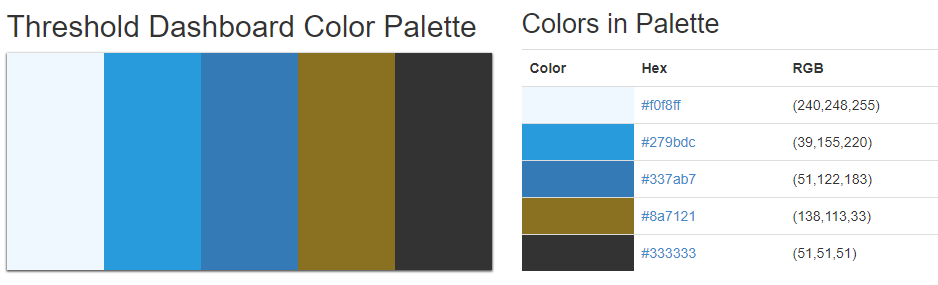

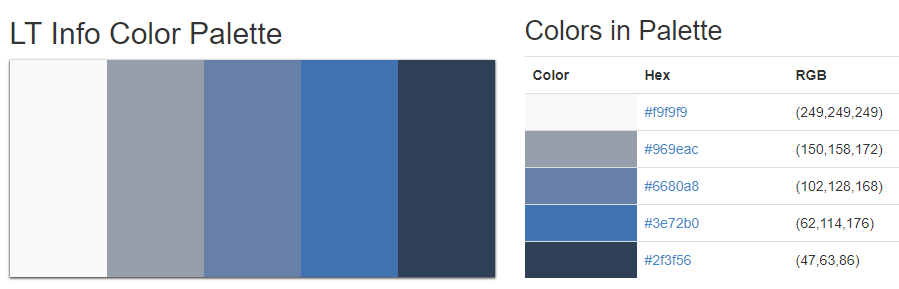

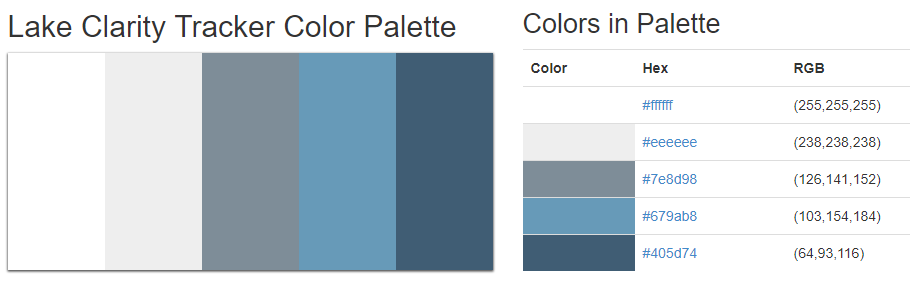

### Color Codes
#### Threshold Dashboard Color Pallette
#f0f8ff
#279bdc
#337ab7
#8a7121
#333333

#### LTInfo Color Pallette
#f9f9f9
#969eac
#6680a8
#3e72b0
#2f3f56

#### Lake Clarity Tracker Color Pallette
#ffffff
#eeeeee
#7e8d98
#679ab8
#405d74

#### Color Brewer 
###### Sequential
* https://colorbrewer2.org/#type=sequential&scheme=PuBu&n=9
* #fff7fb
* #ece7f2
* #d0d1e6
* #a6bddb
* #74a9cf
* #3690c0
* #0570b0
* #045a8d
* #023858

###### Diverging
* https://colorbrewer2.org/#type=diverging&scheme=BrBG&n=10
* #543005
* #8c510a
* #bf812d
* #dfc27d
* #f6e8c3
* #c7eae5
* #80cdc1
* #35978f
* #01665e
* #003c30

###### Qaulitative
* https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=10
* #a6cee3
* #1f78b4
* #b2df8a
* #33a02c
* #fb9a99
* #e31a1c
* #fdbf6f
* #ff7f00
* #cab2d6
* #6a3d9a

In [ ]:
color_discrete_map = {'a': '#a6cee3', 
                      'b': '#1f78b4', 
                      'c': '#b2df8a',
                      'd': '#33a02c',
                      'e': '#fb9a99',
                      'f': '#e31a1c',
                      'g': '#fdbf6f',
                      'h': '#ff7f00',
                      'i': '#cab2d6'}

# Air Quality

## Data

In [ ]:
# make sql database connection with pyodbc
#conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=sql12;DATABASE=sde_tabular;UID=sde;PWD=staff')

# create dataframe from sql query
#dfAir = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_AirQuality", conn)

# set colors
color_discrete_map = {'Cave Rock': '#33a02c',
                      'DL Bliss State Park': '#1f78b4', 
                      'Incline Village/Crystal Bay': '#fb9a99',
                      'Kings Beach': '#e31a1c',
                      'Lake Tahoe Basin': '#ff7f00',
                      'Lake Tahoe CC': '#ff7f00',
                      'LTCC': '#ff7f00',
                      'SOLA': '#a6cee3', 
                      'South Lake Tahoe Airport': '#b2df8a', 
                      'South Lake Tahoe Sandy Way': '#b2df8a',
                      'South Lake Tahoe Tahoe Blvd': '#b2df8a',
                      'Stateline Harveys':'#cab2d6',
                      'Stateline Horizon': '#cab2d6',
                      'Stateline TRPA': '#cab2d6',
                      'Tahoe City': '#fdbf6f'                    
                        }
#dfAir.set_index('OBJECTID')

In [ ]:
dfAir['Site'].unique()

In [ ]:
# Use rest service to get data for Air Quality
#Setup
import pandas as pd
import os
from arcgis.features import FeatureLayer
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def get_fs_data(fs_url):
    feature_layer = FeatureLayer(fs_url)
    query_result = feature_layer.query()
    feature_list = query_result.features
    all_data = pd.DataFrame([feature.attributes for feature in feature_list])
    return all_data



Airservice_url = "https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/46"
NOXservice_url = 'https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/72'
Wintertraffic_url= 'https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/97'
draftworkspace = r"C:\Users\snewsome\Documents\GitHub\ThresholdEvaluation\2023\AirQuality\Chart\Draft"

In [ ]:
dfAir = get_fs_data(Airservice_url)
dfNOX = get_fs_data(NOXservice_url)
dfwinter = get_fs_data(Wintertraffic_url)

## Map

In [ ]:
webmap_search = AGOL.content.search(query="Threshold Evaluation Base Map", item_type="Web Map")
webmap_search
webmap = webmap_search[0]
webmap

In [ ]:
webmap_search = AGOL.content.search(query="Threshold Evaluation Base Map", item_type="Web Map")
webmap_search
webmap = webmap_search[0]
webmap

In [ ]:
air_item = FeatureLayer("https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/16")

# display map
tvalMap = WebMap(webmap)
tvalMap.add_layer(air_item)

webmap_item_properties = {'title':'Threshold Evaluation - Air Quality',
                         'snippet':'Map created to display the locations of air quality stations in the Tahoe Basin',
                         'tags':['Air Quality', 'TRPA', 'Threshold Evaluation']}

tvalMap.save(webmap_item_properties)

for layer in tvalMap.layers:
    layer['visibility'] = True
tvalMap.update()
tvalMap

## Annual Average Pm2.5 Concentration

In [ ]:

# set indicator
indicator = 'PM2.5 - ANNUAL AVG.'
# limit rows to indicator
dfPM25 = dfAir.loc[dfAir['Indicator'] == indicator]
# correct threshold value errors
dfPM25['Threshold Value'] = 12

# setup dataframe
df = dfPM25

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', color='Site',
                 color_discrete_map = color_discrete_map)
                 #hover_data={'Year':False, # remove year from hover data
                  #           'Value':':.2f'
                             #})

fig.update_traces(hovertemplate='<br>%{y:.2f} ppm')
# Add customdata for all points
#fig.update_traces(customdata=df[['Year']], 
 #                 hovertemplate='<br>Year: %{customdata[0]}<br>Value: %{y:.2f} ppm')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} ppm<extra></extra>'
))

# Using boolean indexing with case-insensitive comparison
dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# filter trend analysis
#dfTrend = df.loc[df.Include_in_Trend_Analysis =='yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# create variable of beta
slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title="PM 2.5 - Annual Average Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 15],
                        title_text='Value (ppm)'
                    )
                  
                 )


# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_AnnualPM25.html"))

### Threshold Analysis pm2.5 annual

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

#Get records
# set indicator
indicator = 'PM2.5 - ANNUAL AVG.'
# limit rows to indicator
dfPM25 = dfAir.loc[dfAir['Indicator'] == indicator]
# correct threshold value errors
dfPM25['Threshold Value'] = 12

# setup dataframe
df = dfPM25

# filter trend analysis
#dfTrend = df.loc[df.Include_in_Trend_Analysis=='yes']
dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']



# create trendline

fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# Drop rows with NaN values
dfTrend = dfTrend.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not dfTrend['Year'].isnull().any() and not dfTrend['Value'].isnull().any():

# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(dfTrend['Year'], dfTrend['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', color='Site')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=dfTrend['Year'],
    y=slope * dfTrend['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)

fig.add_trace(trendline)

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f}<extra></extra>'
))

# set layout
fig.update_layout(title="PM 2.5 - Annual Average Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 15],
                        title_text='Value (ppm)'
                    )
                  
                 )


# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_AnnualPM25.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Annual Average PM2.5',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_AnnualPM25.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=True, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

In [ ]:

print(dfTrend['Value'])


## 24-Hour Pm2.5 Concentration

In [ ]:
# set indicator
indicator = 'PM2.5 - 3 YR AVG. 98% 24 HR'

# # set indicator
#indicator = 'PM2.5 - HIGH 24 HR'

# limit rows to indicator
df24PM25 = dfAir.loc[dfAir['Indicator'] == indicator]
# correct threshold value errors
df24PM25['Threshold Value'] = 35

df = df24PM25

#Get set up for more comprehensive hover template
#df.dropna(inplace=True)
# Replace null values in the "Value" column with "No data"
#df['Value'] = df['Value'].fillna('No data')

fig = px.scatter(df, x = 'Year', y= 'Value', color='Site', 
                 color_discrete_map = color_discrete_map)
                 #hover_data={'Year': False,
                  #           'Value':':.2f'
                   #          })


fig.update_traces(hovertemplate='<br>%{y:.2f} ppm')



# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} ppm<extra></extra>'
))


# filter trend analysis
#dfTrend = df.loc[df.Include_in_Trend_Analysis=='yes']
dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]

# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))

# add beta value from trend line to data frame
dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# create variable of beta
slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title="PM 2.5 - Highest 24 hour Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1980,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        range=[0, 80],
                        title_text='Value (ppm)'
                    )
                  
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_24hrPM25.html"))

### Threshold Analysis 24 HR PM2.5

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

#Get records
# set indicator
indicator = 'PM2.5 - 3 YR AVG. 98% 24 HR'

# # set indicator
#indicator = 'PM2.5 - HIGH 24 HR'

# limit rows to indicator
df24PM25 = dfAir.loc[dfAir['Indicator'] == indicator]
# correct threshold value errors
df24PM25['Threshold Value'] = 35

# setup dataframe
df = df24PM25

#dfTrend = df.loc[df.Include_in_Trend_Analysis=='yes']
dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# Drop rows with NaN values
dfTrend = dfTrend.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not dfTrend['Year'].isnull().any() and not dfTrend['Value'].isnull().any():
# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(dfTrend['Year'], dfTrend['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', color='Site')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
fig.update_layout(title="PM 2.5 - 24HR",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 35],
                        title_text='Value (ppm)'
                    )
                  
                 )


# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_24hrPM25.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : ' High 24hr PM2.5',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_24hrPM25.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Annual Average Pm10 Concentration

In [ ]:
# set indicator
indicator = 'PM10 - ANNUAL AVG.'

# limit rows to indicator
dfPM10 = dfAir.loc[dfAir['Indicator'] == indicator]
dfPM10['Threshold Value'] = 20
df = dfPM10


# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', color='Site',
                 color_discrete_map = color_discrete_map)
                 #hover_data={'Year':True, 
                  #           'Value':':.2f'
                   #          })

fig.update_traces(hovertemplate='<br>%{y:.2f} ppm')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} ppm<extra></extra>'
))


# filter trend analysis
#dfTrend = df.loc[df.Include_in_Trend_Analysis=='Yes']
dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# create variable of beta
slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title="PM 10 - Average Annual Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 30],
                        title_text='Value (ppm)'
                    )
                  
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_AnnualPM10.html"))

### Threshold Analysis- PM10 Annual Average

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

#Get records
# set indicator
indicator = 'PM10 - ANNUAL AVG.'

# limit rows to indicator
dfPM10 = dfAir.loc[dfAir['Indicator'] == indicator]
dfPM10['Threshold Value'] = 20
df = dfPM10

#dfTrend = df.loc[df.Include_in_Trend_Analysis=='yes']
dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
dfTrend = dfTrend.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not dfTrend['Year'].isnull().any() and not dfTrend['Value'].isnull().any():
# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(dfTrend['Year'], dfTrend['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', color='Site')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
fig.update_layout(title="PM 10 - Average Annual Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 30],
                        title_text='Value (ppm)'
                    )
                  
                 )
# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_AnnualPM10.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Annual Average PM10',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_AnnualPM10.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Highest 24-Hour Average Pm10 Concentration

In [ ]:
# set indicator
indicator = 'PM10 - HIGH 24 HR'

# limit rows to indicator
df24PM10 = dfAir.loc[dfAir['Indicator'] == indicator]
df24PM10['Threshold Value'] = 50
df = df24PM10

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', color='Site', 
                 color_discrete_map = color_discrete_map)
                 #hover_data={'Year':True,
                  #           'Value':':.2f'
                   #          })



fig.update_traces(hovertemplate='<br>%{y:.2f} ppm')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} ppm<extra></extra>'
))

#dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']
# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# create variable of beta
slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title="PM 10 - Highest 24 hour Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 25,
                        range=[0, 225],
                        title_text='Value (ppm)'
                    )
                  
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_24hrPM10.html"))

### Threshold Analysis 24 High PM10

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

#Get records
# set indicator
indicator = 'PM10 - HIGH 24 HR'

# limit rows to indicator
df24PM10 = dfAir.loc[dfAir['Indicator'] == indicator]
df24PM10['Threshold Value'] = 50
df = df24PM10

#dfTrend = df.loc[df.Include_in_Trend_Analysis=='yes']
#dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
df = df.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not df['Year'].isnull().any() and not df['Value'].isnull().any():

# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])


# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', color='Site')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
fig.update_layout(title="PM 10 - Highest 24 hour Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 25,
                        range=[0, 225],
                        title_text='Value (ppm)'
                    )
                  
                 )
# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_24hrPM10.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'PM 10 - Highest 24 hour Concentration',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_24hrPM10.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Highest 1-Hour Average Concentration Of Ozone

In [ ]:
# set indicator
indicator = 'O3 - HIGH 1 HR'

# limit rows to indicator
df1HRO3 = dfAir.loc[dfAir['Indicator'] == indicator]
df = df1HRO3
df['Threshold Value'] = .08
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', color='Site') 
                 #hover_data={'Year':False, 
                  #           'Value':':.2f'
                   #          })

fig.update_traces(hovertemplate='<br>%{y:.2f} ppm')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} ppm<extra></extra>'
))


# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# create variable of beta
slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.4f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title="Ozone - 1 hour Average Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 0.01,
                        range=[0.06, 0.11],
                        title_text='Value (ppm)'
                    )
                  
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_1hrOzone.html"))

### Threshold Analysis Ozone 1 hour average

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

#Get records
# set indicator
indicator = 'O3 - HIGH 1 HR'

# limit rows to indicator
df1HRO3 = dfAir.loc[dfAir['Indicator'] == indicator]
df = df1HRO3
df['Threshold Value'] = .08

#dfTrend = df.loc[df.Include_in_Trend_Analysis=='yes']
#dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
dfTrend = dfTrend.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not df['Year'].isnull().any() and not df['Value'].isnull().any():

# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])


# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', color='Site')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
fig.update_layout(title="Ozone - 1 hour Average Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 0.01,
                        range=[0.06, 0.11],
                        title_text='Value (ppm)'
                    )
                  
                 )

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_1hrOzone"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Ozone - 1 hour Average Concentration',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_1hrOzone'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)

# Write DataFrame to CSV file
#slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Highest 8-Hour Average Concentration Of Carbon Monoxide

In [ ]:
# set indicator
indicator = 'CO - HIGH 8 HR'

# limit rows to indicator
df8HRCO = dfAir.loc[dfAir['Indicator'] == indicator]
df = df8HRCO
df['Threshold Value'] = 6
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', color='Site') 
                 #hover_data={'Year':True,
                  #           'Value':':.2f'
                   #          })

fig.update_traces(hovertemplate='<br>%{y:.2f} ppm')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} ppm<extra></extra>'
))


# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                  color_discrete_map = color_discrete_map,
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# create variable of beta
slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title="Carbon Monoxide - 8 hour Average Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 10],
                        title_text='Value (ppm)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_8hrCO.html"))

### Threshold Analysis Carbon Monoxide 8HR

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

#Get records
# set indicator
indicator = 'CO - HIGH 8 HR'

# limit rows to indicator
df8HRCO = dfAir.loc[dfAir['Indicator'] == indicator]
df = df8HRCO
df['Threshold Value'] = 6

#dfTrend = df.loc[df.Include_in_Trend_Analysis=='yes']
#dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
df = df.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not df['Year'].isnull().any() and not df['Value'].isnull().any():


# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', color='Site')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
fig.update_layout(title="Carbon Monoxide - 8 hour Average Concentration",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 10],
                        title_text='Value (ppm)'
                    )
                 )

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_8hrCO.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Carbon Monoxide - 8 hour Average Concentration',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_8hrCO.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Regional Visibility 50th Percentile Bliss State Park

In [ ]:
# set indicator
# set indicator
indicator = '3-year mean (50th Percentile, Mm-1)'
# limit rows to indicator
dfVis50th = dfAir.loc[(dfAir['Indicator'] == ('3-year mean (50th Percentile, Mm-1)'))&
                      (dfAir['Pollutant'] == 'Regional Visibility')]
df = dfVis50th
# correct threshold value errors
df['Threshold Value'] = 25
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', 
                 color_discrete_map=color_discrete_map,
                 hover_data={'Year':False, # remove year from hover data
                             'Value':':.2f'
                             })

fig.update_traces(hovertemplate='3-year mean: <br>%{y:.2f} Mm-1')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} Mm-1<extra></extra>'
))


dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# create variable of beta
slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='Regional Visibility 50th Percentile DL Bliss State Park',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 40],
                        title_text='Light Extinction (Mm-1)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_RegVis50th_Bliss.html"))

### Threshold Analysis Regional Visibility 50th percent

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

#Get records
# set indicator
indicator = '3-year mean (50th Percentile, Mm-1)'

## limit rows to indicator
dfVis50th = dfAir.loc[(dfAir['Indicator'] == ('3-year mean (50th Percentile, Mm-1)'))&
                      (dfAir['Pollutant'] == 'Regional Visibility')]
df = dfVis50th
# correct threshold value errors
df['Threshold Value'] = 25


dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
df = df.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not df['Year'].isnull().any() and not df['Value'].isnull().any():


# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
# set layout
fig.update_layout(title='Regional Visibility 50th Percentile DL Bliss State Park',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 40],
                        title_text='Light Extinction (Mm-1)'
                    )
                 )

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_RegVis50th_Bliss.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Regional Visibility 50th Percentile DL Bliss State Park',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_RegVis50th_Bliss.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
#slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Regional Visibility 90th Percentile Bliss State Park 

In [ ]:
# set indicator
indicator = '3-year mean (90th Percentile, Mm-1)'
# limit rows to indicator
dfVis90th = dfAir.loc[(dfAir['Indicator'] == '3-year mean (90th Percentile, Mm-1)')&
                      (dfAir['Pollutant'] == 'Regional Visibility')]
df = dfVis90th
# correct threshold value errors
df['Threshold Value'] = 34
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', 
                 color_discrete_map=color_discrete_map,
                 hover_data={'Year':False, # remove year from hover data
                             'Value':':.2f'
                             })

fig.update_traces(hovertemplate='3-year mean: <br>%{y:.2f} Mm-1')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} Mm-1<extra></extra>'
))


# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# create variable of beta
slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='Regional Visibility 90th Percentile DL Bliss State Park',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 60],
                        title_text='Light Extinction (Mm-1)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_RegVis90th_Bliss.html"))

### Threshold Analysis only REgional 90th percentile

In [ ]:
#Get records
# set indicator
indicator = '3-year mean (90th Percentile, Mm-1)'
# limit rows to indicator
dfVis90th = dfAir.loc[(dfAir['Indicator'] == '3-year mean (90th Percentile, Mm-1)')&
                      (dfAir['Pollutant'] == 'Regional Visibility')]
df = dfVis90th
# correct threshold value errors
df['Threshold Value'] = 34


dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
df = df.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not df['Year'].isnull().any() and not df['Value'].isnull().any():


# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
# set layout
fig.update_layout(title='Regional Visibility 90th Percentile DL Bliss State Park',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 60],
                        title_text='Light Extinction (Mm-1)'
                    )
                 )

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_RegVis90th_Bliss.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Regional Visibility 90th Percentile DL Bliss State Park',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_RegVis90th_Bliss.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
#slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Sub-Regional Visibility 50th Percentile South Lake

In [ ]:
# set indicator
indicator = '3-year mean (50th Percentile, Mm-1)'
# limit rows to indicator
dfVisSub50th = dfAir.loc[(dfAir['Indicator'] == '3-year mean (50th Percentile, Mm-1)')&
                      (dfAir['Pollutant'] == 'Sub-Regional Visibility')]
df = dfVisSub50th

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', 
                 color_discrete_map=color_discrete_map, color='Site',
                 hover_data={'Year':True, # remove year from hover data
                             'Value':':.2f'
                             })

fig.update_traces(hovertemplate='3-year mean: <br>%{y:.2f} Mm-1')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} Mm-1<extra></extra>'
))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'Value', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# # create variable of beta
# slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Sub-Regional Visibility 50th Percentile South Lake Tahoe',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 60],
                        title_text='Light Extinction (Mm-1)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_SubRegVis50th_SouthLake.html"))

### Threshold Analysis Sub REgional Visibility 50th

In [ ]:
#Get records
# set indicator
indicator = '3-year mean (50th Percentile, Mm-1)'
# limit rows to indicator
dfVisSub50th = dfAir.loc[(dfAir['Indicator'] == '3-year mean (50th Percentile, Mm-1)')&
                      (dfAir['Pollutant'] == 'Sub-Regional Visibility')]
df = dfVisSub50th
df['Threshold Value'] = 50


dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value',
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
df = df.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not df['Year'].isnull().any() and not df['Value'].isnull().any():


# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', color='Site')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
# set layout
# set layout
fig.update_layout(title='Sub-Regional Visibility 50th Percentile South Lake Tahoe',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 60],
                        title_text='Light Extinction (Mm-1)'
                    )
                 )


# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_SubRegVis50th_SouthLake.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Sub-Regional Visibility 50th Percentile South Lake Tahoe',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_SubRegVis50th_SouthLake.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Sub-Regional Visibility 90th Percentile South Lake

In [ ]:
# set indicator
indicator = '3-year mean (90th Percentile, Mm-1)'
# limit rows to indicator
dfVisSub90th = dfAir.loc[(dfAir['Indicator'] == '3-year mean (90th Percentile, Mm-1)')&
                      (dfAir['Pollutant'] == 'Sub-Regional Visibility')]
df = dfVisSub90th

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', color='Site', 
                 color_discrete_map=color_discrete_map,
                 hover_data={'Year':True,
                             'Value':':.2f'
                             })

fig.update_traces(hovertemplate='3-year mean: <br>%{y:.2f} Mm-1')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} Mm-1<extra></extra>'
))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'Value', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# dfAir.loc[dfAir['Indicator'] == indicator, 'Beta'] = fit_results.params[1]

# # create variable of beta
# slope = dfAir.loc[dfAir['Indicator'] == indicator, 'Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Sub-Regional Visibility 90th Percentile South Lake Tahoe',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 25,
                        range=[0, 200],
                        title_text='Light Extinction (Mm-1)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_SubRegVis90th_SouthLake.html"))

### Threshold Analysis Sub Regional 90th

In [ ]:
# set indicator
indicator = '3-year mean (90th Percentile, Mm-1)'
# limit rows to indicator
dfVisSub90th = dfAir.loc[(dfAir['Indicator'] == '3-year mean (90th Percentile, Mm-1)')&
                      (dfAir['Pollutant'] == 'Sub-Regional Visibility')]
df = dfVisSub90th
df['Threshold Value'] = 125


dfTrend = df[df['Include_in_Trend_Analysis'].str.lower() == 'yes']

# create trendline
fig2 = px.scatter(dfTrend, x = 'Year', y= 'Value',
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
df = df.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not df['Year'].isnull().any() and not df['Value'].isnull().any():


# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', color='Site')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)
# set layout
# set layout
# set layout
# set layout
fig.update_layout(title='Sub-Regional Visibility 90th Percentile South Lake Tahoe',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 25,
                        range=[0, 200],
                        title_text='Light Extinction (Mm-1)'
                    )
                 )


# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_SubRegVis90th_SouthLake.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Sub-Regional Visibility 90th Percentile South Lake Tahoe',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_SubRegVis90th_SouthLake.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## NOx Emissions

In [ ]:
#DONT USE# make sql database connection with pyodbc
#conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=sql12;DATABASE=sde_tabular;UID=sde;PWD=staff')

# create dataframe from sql query
#dfNox = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_NOX_Emissions", conn)

In [ ]:
# set indicator
df = dfNox

df.Value.dropna()

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='<br>%{y:.2f}')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.2f} <extra></extra>'
))


# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
dfNox['Beta'] = fit_results.params[1]

# create variable of beta
slope = dfNox['Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='NOx Emissions',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1975,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 8],
                        title_text='Value'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_NOx_Emissions.html"))

## Threshold Analysis NOx

In [ ]:

# set indicator
df = dfNOX
df['Threshold Value'] = 5.6


# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value',
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]
# Drop rows with NaN values
df = df.dropna(subset=['Year', 'Value'])

# Perform linear regression only if there are no NaN values
if not df['Year'].isnull().any() and not df['Value'].isnull().any():


# Calculate linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value')


# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

fig.add_trace(trendline)

# set layout
fig.update_layout(title='NOx Emissions',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1975,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 8],
                        title_text='Value'
                    )
                 )


# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisAirQuality_NOx_Emissions.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Air Quality\analysis"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'NOx Emissions',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/AirQuality/Chart/Draft/AnalysisAirQuality_NOx_Emissions.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'AirQuality_Trendlines.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Winter Traffic Volumes

In [ ]:
# make sql database connection with pyodbc
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=sql12;DATABASE=sde_tabular;UID=sde;PWD=staff')

# create dataframe from sql query
dfWinterTraffic = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_WinterTrafficVolume", conn)

In [ ]:
# Inspect the first few rows of the dataframe
print(df.head())

# Ensure there are no duplicate years
print(df['Year'].value_counts())

# Drop NaN values in 'Value'
df = df.dropna(subset=['Value'])

# Sort the dataframe by 'Year'
df = df.sort_values(by='Year')



In [ ]:
# set indicator
df = dfwinter
#df['Year'] = df['Year'].astype(int)
#df.Value.dropna()
df.dropna()
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', 
                 hover_data={'Year':True, # remove year from hover data
                             'Value':':,.0f'}
                             )

fig.update_traces(hovertemplate='Traffic Count:<br>%{y:,.0f} cars')


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:,.0f} cars<extra></extra>'
))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'Value', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# dfNox['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = dfNox['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend:<br>%{customdata:,.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Winter Traffic Volume',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1980,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5000,
                        range=[0, 30000],
                        title_text='Value'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AirQuality_WinterTrafficVolume.html"))

## VMT

In [ ]:
dfVMT = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VMT", conn)
dfVMT

In [ ]:
# get data
dfVMT = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VMT", conn)

# make a copy
df=dfVMT.copy()

# set threshold value
df['Threshold_Value']= 1298987

# create figure
fig = px.line(df, x="Year", y="VMT", title='Vehichle Miles Traveled',  hover_name= "VMT")

fig.update_traces(hovertemplate='Total VMT<br><b>%{y:,.0f}</b> miles')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=2),
    mode='lines',
    hovertemplate='Threshold<br><b>%{y:,.0f}</b> miles<extra></extra>'
))



# set layout
fig.update_layout(title="Vehicle Miles Traveled",
                    font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1975,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 500000,
                        range=[0, 2000000],
                        title_text='Vehicle Miles Traveled'
                    )
                  
                 )


# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "AirQuality_VMT.html"))


## Reduce Generation and Transport of Nitrate to Achieve Water

In [ ]:
dfDisN   = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_MidLake_DissolvedNitrogen", conn)

In [ ]:
# set indicator
df = dfDisN

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='Dissolved Nitrogen<br>%{y:,.0f} g ha-1 yr-1')

# df['Threshold']=1

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'Value', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Mid Lake Dissolved Nitrogen',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1990,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 500,
                        range=[0, 4000],
                        title_text='Value'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_MidLakeDissolvedNitrogen.html"))

## Status

### Max Value for most recent year
#### http://www.trpa.org/wp-content/uploads/8_Ch2_Methodology_FINAL_9_29_2016.pdf
* if >= 125% of threshold then "considerably worse than target"
* if > 100-125% of threshold then "somewhat worse than target"
* if <= 100-125% of threshold then "somewhat better than target"
* if < 100-125% of threshold then "considerably better than target"

In [ ]:
# status dataframe
df = dfAir.groupby(['Indicator'], sort=False)['Year','Threshold Value', 'Value'].max()
df["Quarter_Value"] = df['Value']*0.25
df["Status"]=np.nan

df.loc[df['Value'] >= (df['Threshold Value']+df.Quarter_Value), 'Status'] = 'Considerably worse than target.' 
df.loc[(df['Value'] < (df['Threshold Value']+df.Quarter_Value)) & (df['Value'] >= df['Threshold Value']), 'Status'] = 'Somewhat worse than target.' 
df.loc[(df['Value'] > (df['Threshold Value']-df.Quarter_Value)) & (df['Value'] <= df['Threshold Value']), 'Status'] = 'Somewhat better than target.' 
df.loc[df['Value'] <= (df['Threshold Value']-df.Quarter_Value), 'Status'] = 'Considerably better than target.' 

df.to_csv(os.path.join(workspace, "AirQuality_Status.csv"))

## Trend

### Percent change = linear regression slope (Beta)/interim target or standard 
Percent change = linear regression slope (Beta)/interim target or standard
* Slope of the line divided by Value = % 
* value < -2.5 ~ "Rapid Improvement"
* value, -2.49,-0.5) ~ "Moderate Improvement"
* value, -0.49,0.49) ~ "Little or No Change"
* value, 0.5,2.49) ~ "Moderate Decline"
* value >2.5 ~ "Rapid Decline"


In [ ]:
# trend dataframe
df = dfAir.groupby(['Indicator'], sort=False).max().reset_index()
df["Percent_Change"] = (df['Beta']/df['Threshold Value'])*100
df["Trend"]=np.nan

df.loc[df['Percent_Change']  < -2.5, 'Trend'] = "Rapid Improvement" 
df.loc[(df['Percent_Change'] > -2.5) & (df['Percent_Change'] < -0.5), 'Trend'] = "Moderate Improvement" 
df.loc[((df['Percent_Change'] > -0.5) & (df['Percent_Change'] < 0.5)), 'Trend'] = "Little or No Change"
df.loc[((df['Percent_Change'] > 0.5) & (df['Percent_Change'] < 2.5)), 'Trend'] = "Moderate Decline"
df.loc[df['Percent_Change']  > 2.5, 'Trend'] = "Rapid Decline" 

df.to_csv(os.path.join(workspace, "AirQuality_Trend.csv"))

# Fisheries

## Data

In [ ]:

# make sql database connection with pyodbc
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=sql12;DATABASE=sde_tabular;UID=sde;PWD=staff')

# create dataframe from sql query
dfStream = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_Stream_CSCI_Index", conn)

# create dataframe from sql query
dfStreamStatus = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_Stream_Status", conn)

# Lake fish hab data
fishLakeHab = sdeBase + "\\sde.SDE.Fisheries\\sde.SDE.Fish_Habitat_2016"

# create spatial dataframe from parcel feature class
sdfLakeFishHab = pd.DataFrame.spatial.from_featureclass(fishLakeHab)


In [ ]:
sdfLakeFishHab.info()

## Acres Of "Prime" Fish Habitat

In [ ]:
# setup dataframe from feature class to make graph

# set field to string
sdfLakeFishHab = sdfLakeFishHab.astype({"Habitat2015": str})

# change domain values to text
sdfLakeFishHab.Habitat2015 = sdfLakeFishHab.Habitat2015.replace({"1": "Marginal",
                                                                 "2": "Feed-Cover",
                                                                 "3": "Spawning" })
# group by habitat values and acres
habAcres = sdfLakeFishHab['Acres'].groupby(sdfLakeFishHab['Habitat2015']) 

# get total for each hab type
marginal = sdfLakeFishHab[sdfLakeFishHab['Habitat2015']=='Marginal']['Acres'].sum()
feed = sdfLakeFishHab[sdfLakeFishHab['Habitat2015']=='Feed-Cover']['Acres'].sum()
spawn = sdfLakeFishHab[sdfLakeFishHab['Habitat2015']=='Spawning']['Acres'].sum()

# setup 
df = pd.DataFrame([marginal,feed,spawn],  columns=['Acres'])

df.loc[0,'Condition'] = 'Marginal'
df.loc[1,'Condition'] = 'Feed-Cover'
df.loc[2,'Condition'] = 'Spawning'

In [ ]:
df

In [ ]:
# set colors for bars
colors = ['#CDCD66','#00A884','#8400A8']

fig = px.bar(df,  color='Condition', color_discrete_sequence=colors)


fig.update_layout(xaxis_type='category',
                  title_text='Fish Habitat - Nearshore Lake Tahoe',
                  showlegend = False,
                  template=template
                 )

fig.update_xaxes(title= 'Habitat',tickfont=dict(family='Calibri', size=14))
fig.update_yaxes(title= 'Acres', tickfont=dict(family='Calibri', size=14))
fig.update_xaxes(
    ticktext=["Marginal", "Feed-Cover", "Spawning"],
    tickvals=["0", "1", "2", df.index.max()],
)
fig.update_traces(hovertemplate='%{x}<br>%{y:,.0f} acres<extra></extra>')
fig.show()

fig.write_html(os.path.join(workspace, "Fisheries_LakeHabitat.html"))

## Miles Of Stream Habitat In 
* Excellent Stream Condition 
* Good Condition
* Marginal Condition

In [ ]:
dfStream

In [ ]:
# match colors to map features
colors = ['#E6E600','#E69800','#38A800']

# setup bar chart
fig = px.bar(dfStream, x="Year", y="Value",
             color='Condition_Class',
             color_discrete_sequence=colors, 
             height=400,
#              hover_data={'Condition_Class':False,
#                          'Year':False,
#                          'Value':':.0%', # customize hover for column of y attribute
#                             },
            labels={"Condition_Class": "Stream Condition"}
            )
# edit text and hovertemplate
for ser in fig['data']:
    ser['customdata']=dfStream['Condition_Class']
    ser['hovertemplate']='%{y:.0%}<extra></extra>'
    
# create threshold lines
fig.add_trace(go.Scatter(
    y=dfStream['Threshold_Value'],
    x=dfStream['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=dfStream['Condition_Class'],
    hovertemplate='Threshold Value:<br>%{y:.0%} in %{customdata} Condition<extra></extra>'
))

# update layout 
fig.update_layout(font_family=font,
                    template=template,
                    showlegend=True,
                    barmode='group',
                    title='Stream Condition',
                    yaxis=dict(
                        title='Percent',
                        tickformat=',.0%',
                        range= [0,1]
                  ))


# show plot
fig.show()

# export plot to html
fig.write_html(os.path.join(workspace, "Fisheries_StreamCondition.html"))

In [ ]:
dfStreamStatus

In [ ]:
# match colors to map features
colors = ['#E6E600','#E69800','#38A800']

# setup bar chart
fig = px.bar(dfStreamStatus, x="Year", y="Value",
             height=400
            )
    
# # create threshold lines
# fig.add_trace(go.Scatter(
#     y=dfStream['Threshold_Value'],
#     x=dfStream['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='markers',
#     marker_symbol='line-ew',
#     marker_line_color="midnightblue", 
#     marker_color="lightskyblue", 
#     marker_line_width=2, 
#     marker_size = 36,
#     customdata=dfStream['Condition_Class'],
#     hovertemplate='Threshold Value:<br>%{y:.0%} in %{customdata} Condition<extra></extra>'
# ))

# update layout 
fig.update_layout(font_family=font,
                    template=template,
                    showlegend=True,
                    barmode='group',
                    title='Stream Condition',
                    yaxis=dict(
                        title='Percent',
                        tickformat=',.2f',
                        range= [0,1]
                  ))


# show plot
fig.show()

# export plot to html
fig.write_html(os.path.join(workspace, "Fisheries_StreamStatus.html"))

In [ ]:
dfStreamStatus.info()

## Average CSCI Score Per Trend Panel Chart used on the threshold page for stream miles

In [ ]:
#dfStream Tabular.sde\SDE.ThresholdEvaluation_Stream_Status is where the data comes from
#Setup
import pandas as pd
import os
from arcgis.features import FeatureLayer
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#Use this method to link to the feature service
def get_fs_data(CSCIAverages_url):
    feature_layer = FeatureLayer(CSCIAverages_url)
    query_result = feature_layer.query()
    feature_list = query_result.features
    all_data = pd.DataFrame([feature.attributes for feature in feature_list])
    return all_data

CSCIAverages_url = "https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/84"
draftworkspace = r"C:\Users\snewsome\Documents\GitHub\ThresholdEvaluation\2023\Fisheries\Chart\Draft"
file_path = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Fisheries"

In [ ]:
dfStreamStatus = get_fs_data(CSCIAverages_url)
#dfstreamStatus = pd.read_excel()
#df = pd.read_excel(file_path, "ThresholdData_StreamsTavg.xlsx")




# match colors to map features
colors = ['#E6E600','#E69800','#38A800']
# Sort DataFrame by 'Year'
dfStreamStatus = dfStreamStatus.sort_values(by='Year')
# setup plot if only using average for all trend sites
#fig = px.scatter(dfStreamStatus, x = 'Year', y= 'Value')
#Update Pop up for average of all trend sites.. not per panel
#fig.update_traces(hovertemplate='%{y:.2f} Average CSCI Score<extra></extra>')
#setup plot
fig = go.Figure()
# Filter data for Test A and Test B
df_trend_a = dfStreamStatus[dfStreamStatus['Trend_Panel'] == 'A']
df_trend_b = dfStreamStatus[dfStreamStatus['Trend_Panel'] == 'B']
# Add traces for Test A and Test B
fig.add_trace(go.Scatter(x=df_trend_a['Year'], y=df_trend_a['Value'], mode='markers',
                          marker=dict(color='blue'), name='Trend Panel A',
                         hovertemplate='%{y:.2f} Average CSCI Score for sites in Trend Panel A<extra></extra>'))
fig.add_trace(go.Scatter(x=df_trend_b['Year'], y=df_trend_b['Value'], mode='markers',
                         marker=dict(color='orange'), name='Trend Panel B',
                         hovertemplate='%{y:.2f} Average CSCI Score for sites in Trend Panel B<extra></extra>'))
# update layout
fig.update_layout(title='California Stream Condition Index Averages',
                  xaxis_title= 'Year',
                  hovermode="x unified",
                  yaxis=dict(
                      tickmode='linear',
                      tick0=0,
                      dtick=0.1,
                      range=[0.5, 1],
                      title_text='Average Score for all sites in Panel (24)'
                  ))
# show plot
fig.show()


# export plot to html
fig.write_html(os.path.join(draftworkspace, "Fisheries_StreamStatus.html"))

# Noise

## Data

In [ ]:
#Setup
import pandas as pd
import os
from arcgis.features import FeatureLayer
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def get_fs_data(planservice_url):
    feature_layer = FeatureLayer(planservice_url)
    query_result = feature_layer.query()
    feature_list = query_result.features
    all_data = pd.DataFrame([feature.attributes for feature in feature_list])
    return all_data

def get_fs_data(shoreservice_url):
    feature_layer = FeatureLayer(shoreservice_url)
    query_result = feature_layer.query()
    feature_list = query_result.features
    all_data = pd.DataFrame([feature.attributes for feature in feature_list])
    return all_data

planservice_url = "https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/74"
shoreservice_url = 'https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/78'
draftworkspace = r"C:\Users\snewsome\Documents\GitHub\ThresholdEvaluation\2023\Noise\Chart\Draft"



In [ ]:


dfShoreNoise = get_fs_data(shoreservice_url)


In [ ]:
dfPlanNoise = get_fs_data(planservice_url)
 

## Commercial Areas

In [ ]:
# get commercial area records
dfComNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Commercial Areas']
dfComNoise.astype({'Year': 'str'}).dtypes
df = dfComNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Commercial Area Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 80],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_Commercial.html"))

### For Anaylsis Use only

In [ ]:
#For Analysis only

# get commercial area records
dfComNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Commercial Areas']
dfComNoise.astype({'Year': 'str'}).dtypes
df = dfComNoise 

# Extract the end year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)

# Show plot
#fig.show()

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Commercial Area Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[50, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 



# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Commercial.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = dfPlanNoise['Category']
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

# get commercial area records
dfComNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Commercial Areas']
dfComNoise.astype({'Year': 'str'}).dtypes
df = dfComNoise 

# Extract the end year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Commercial Area Noise',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[50, 60],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Commercial.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Commercial',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_Commercial.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")


In [ ]:
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

## Critical Wildlife Habitat Areas

In [ ]:
##Outdated chart... didn't want to delete this until the other chart is approved
#dfCriticalNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Critical Wildlife Habitat']
#dfCriticalNoise.astype({'Year': 'str'}).dtypes
#df = dfCriticalNoise 

area = ['Baldwin','Blackwood','Camp Richardson','East Shore','Emerald Bay',
         'Freel Peak','Genoa Peak','Marlette Lake','Martis Peak','Truckee Marsh']

vals16to19 = [46.5, 58.6, np.nan, 56.2,49.2, 47.5, np.nan, np.nan, 45.0, 48.0]

df = {'Plan Area':area, 'CNEL':vals}

df= pd.DataFrame(d)
df['Threshold Value']=45
df['Average']=50.2

fig = px.bar(df, x='Plan Area',y='CNEL')

fig.update_traces(hovertemplate='%{y:,.1f} dB',
                     marker_color='rgb(188,202,200)', 
                     marker_line_color='rgb(88,48,10)',
                     opacity=0.6)


# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Plan Area'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.1f} dB<extra></extra>'
))

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Average'],
    x=df['Plan Area'],
    name= "Average CNEL",
    line=dict(color='#8a7121', width=3),
    mode='lines',
    hovertemplate='Average CNEL:<br>%{y:.1f} dB<extra></extra>'
))
  
# set layout
fig.update_layout(title='Average CNEL Values in Critical Wildlife Habitat Areas',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 1,
                        title_text='Plan Area'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 20,
                        range=[0, 80],
                        title_text='A-weighted decibels'
                    )
                 )

fig.show()

# THIS IS WRONG---SEE BELOW
#get critical wildlife habitat area records
dfWildNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Critical Wildlife Habitat']
dfWildNoise.astype({'Year': 'str'}).dtypes
df = dfWildNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Critical Wildlife Habitat Areas Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 80],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_Wildlife.html"))

## Critical Wildlife new chart/different from last threshold

In [ ]:
# get Critical Wildlife Habitat data area
#dfCriticalNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Critical Wildlife Habitat']
#dfCriticalNoise.astype({'Year': 'str'}).dtypes
#df = dfCriticalNoise area = ['Baldwin','Blackwood','Camp Richardson','East Shore','Emerald Bay',
         #'Freel Peak','Genoa Peak','Marlette Lake','Martis Peak','Truckee Marsh']

#Read excel file data
base_dir = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise"
file_name = "ThresholdData_PlanAreaNoise.xlsx"
file_path = os.path.join(base_dir, file_name)
dfCriticalNoise = pd.read_excel(file_path)

df = dfCriticalNoise[dfCriticalNoise['Category'] == 'Critical Wildlife Habitat']

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y= df['Threshold_Value'],
    x= df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Critical Wildlife Habitat',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 80],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Critical_Wildlife.html"))




### For Analysis Only - wildlife

In [ ]:
##For Analysis only
#For Analysis only
#Read excel file data
base_dir = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise"
file_name = "ThresholdData_PlanAreaNoise.xlsx"
file_path = os.path.join(base_dir, file_name)
dfCriticalNoise = pd.read_excel(file_path)

df = dfCriticalNoise[dfCriticalNoise['Category'] == 'Critical Wildlife Habitat']

# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]


# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)
# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y= df['Threshold_Value'],
    x= df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Critical Wildlife Habitat',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 

# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisCritical_Wildlife.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = 'Critical Wildlife Habitat'
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive

In [ ]:
#Get Wildlife Data
dfCriticalNoise = pd.read_excel(file_path)
# Data preprocessing
#Fill in Category Column
df = dfCriticalNoise[dfCriticalNoise['Category'] == 'Critical Wildlife Habitat']

# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Critical Wildlife Habitat Noise',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[40, 60],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisCritical_Wildlife.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame

slope_df = pd.DataFrame({
    'Category' : ['Critical Wildlife Habitat'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisCritical_Wildlife.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")


## High Density Residential Areas

In [ ]:
# get high density residential area records
dfHighNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'High Density Residential']
dfHighNoise.astype({'Year': 'str'}).dtypes
df = dfHighNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='High Density Residential Areas Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 80],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_High.html"))

### For Analysis Only --High Density Residential

In [ ]:
#For Analysis only

# get high density residential area records
dfHighNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'High Density Residential']
#dfHighNoise.astype({'Year': 'str'}).dtypes
df = dfHighNoise 


# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)

# Show plot
#fig.show()

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='High Density Residential Area Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 



# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_High Density.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\Threshold Evaluations\2023 Threshold evaluation\Noise\Data Trends"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = 'High Density Residential'
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'ThresholdNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive

In [ ]:
# get high density residential area records
dfHighNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'High Density Residential']

df = dfHighNoise 

# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='High Density Residential',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[40, 60],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_High Density.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"


#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame

slope_df = pd.DataFrame({
    'Category' : ['High Density Residential'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_High Density.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Hotel/Motel Areas

In [ ]:
# get critical wildlife habitat area records
dfHotelNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Hotel / Motel Areas']
dfHotelNoise.astype({'Year': 'str'}).dtypes
df = dfHotelNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Hotel/Motel Areas Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 80],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_Hotel.html"))

### For Analysis Only -Hotel Motel

In [ ]:
#For Analysis only

# get critical wildlife habitat area records
dfHotelNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Hotel / Motel Areas']
#dfHotelNoise.astype({'Year': 'str'}).dtypes
df = dfHotelNoise 


# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)

# Show plot
#fig.show()

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Hotel/Motel Area Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 



# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Hotel.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = 'Hotel/Motel'
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive--Hotel

In [ ]:


# get critical wildlife habitat area records
dfHotelNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Hotel / Motel Areas']
dfHotelNoise.astype({'Year': 'str'}).dtypes
df = dfHotelNoise 

# Extract the end year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Hotel / Motel Areas',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[40, 60],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Hotel.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"
#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : ['Hotel / Motel Areas'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_Hotel.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")


## Industrial Areas

In [ ]:
# get industrial area records
dfIndNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Industrial Areas']
dfIndNoise.astype({'Year': 'str'}).dtypes
df = dfIndNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Industrial Areas Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 80],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_Industrial.html"))

### For Analysis Only --Industrial

In [ ]:
#For Analysis only

# get industrial area records
dfIndNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Industrial Areas']
dfIndNoise.astype({'Year': 'str'}).dtypes
df = dfIndNoise 


# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)

# Show plot
#fig.show()

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Industrial Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 



# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Industrial.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = 'Industrial'
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive - industrial

In [ ]:
# get industrial area records
dfIndNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Industrial Areas']
dfIndNoise.astype({'Year': 'str'}).dtypes
df = dfIndNoise 

# Extract the end year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Industrial Areas',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[40, 80],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Industrial.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"
#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : ['Industrial Areas'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_Industrial.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Low Density Residential Areas

In [ ]:
# get critical wildlife habitat area records
dflowNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Low Density Residential']
dflowNoise.astype({'Year': 'str'}).dtypes
df = dflowNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Low Density Residential Areas Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_LowDensity.html"))

### For Analysis Only- Low Density

In [ ]:
#For Analysis only
# get critical wildlife habitat area records
dflowNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Low Density Residential']
dflowNoise.astype({'Year': 'str'}).dtypes
df = dflowNoise 

# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)

# Show plot
#fig.show()

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Low Density Residential Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 



# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Low Density.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = 'Low Density Residential'
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive

In [ ]:
# get commercial area records
dflowNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Low Density Residential']
dflowNoise.astype({'Year': 'str'}).dtypes
df = dflowNoise 

# Extract the end year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Low Density Residential',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[40, 60],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_LowDensity.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : ['Low Density Residential'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_LowDensity.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Rural Outdoor Recreation Areas


In [ ]:
# get Rural Outdoor Rec area records
dfRuralNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Rural Outdoor Recreation Areas']
dfRuralNoise.astype({'Year': 'str'}).dtypes
df = dfRuralNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Rural Outdoor Recreation Areas Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 80],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_Rural.html"))

### For Analysis Only --Rural Outdoor

In [ ]:
#For Analysis only
# get Rural Outdoor Rec area records
dfRuralNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Rural Outdoor Recreation Areas']
dfRuralNoise.astype({'Year': 'str'}).dtypes
df = dfRuralNoise 

# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)

# Show plot
#fig.show()

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Rural Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 



# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Rural.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = 'Rural'
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive

In [ ]:

# get commercial area records
dfRuralNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Rural Outdoor Recreation Areas']
dfRuralNoise.astype({'Year': 'str'}).dtypes
df = dfRuralNoise 

# Extract the end year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Rural Outdoor Recreation Areas',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[40, 60],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Rural.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : ['Rural Outdoor Recreation Areas'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_Rural.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Urban Outdoor Recreation Areas


In [ ]:
# get urban outdoor rec area records
dfUrbanNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Urban Outdoor Recreation Areas']
dfUrbanNoise.astype({'Year': 'str'}).dtypes
df = dfUrbanNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Urban Outdoor Recreation Areas Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 80],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_Urban.html"))

### For Analysis Only--Urban

In [ ]:
#For Analysis only
# get urban outdoor rec area records
dfUrbanNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Urban Outdoor Recreation Areas']
dfUrbanNoise.astype({'Year': 'str'}).dtypes
df = dfUrbanNoise 

# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)

# Show plot
#fig.show()

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Urban Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 



# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Urban.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = 'Urban'
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive- URBAN

In [ ]:
#For Analysis only
# get urban outdoor rec area records
dfUrbanNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Urban Outdoor Recreation Areas']
dfUrbanNoise.astype({'Year': 'str'}).dtypes
df = dfUrbanNoise 

# Extract the end year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Urban Outdoor Recreation Areas',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[40, 80],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Urban.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : ['Urban Outdoor Recreation Areas'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_Urban.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Wilderness And Roadless Areas

In [ ]:
# get Wilderness and Roadless area records
dfRoadlessNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Wilderness and Roadless']
dfRoadlessNoise.astype({'Year': 'str'}).dtypes
df = dfRoadlessNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Wilderness and Roadless Areas Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[30, 70],
                        title_text='Value (average decibels)'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_Roadless.html"))

### Analysis Only -- Roadless

In [ ]:
#For Analysis Only
# get Wilderness and Roadless area records
dfRoadlessNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Wilderness and Roadless']
dfRoadlessNoise.astype({'Year': 'str'}).dtypes
df = dfRoadlessNoise 

# Extract the start year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Trendline calculation (using linear regression)
coefficients = np.polyfit(df['Year'], df['Value'], 1)
slope = coefficients[0]

# Add trendline to the plot
trendline = go.Scatter(
    x=df['Year'],
    y=coefficients[0] * df['Year'] + coefficients[1],
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f})'
)
fig.add_trace(trendline)

# Show plot
#fig.show()

# update popup
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))


# update layout
fig.update_layout(title='Wilderness/Roadless Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[40, 60],
                        title_text='Value (average decibels)'
                    )  
                 )
                 



# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Roadless.html"))

#write trendline slopes to csv
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

# Create DataFrame with slope value
slope_df = pd.DataFrame({'Trendline Slope': [slope]})

#Create columns for CSV
slope_df['Category'] = 'Wilderness/Roadless'
slope_df['Year'] = '2023 Threshold Evaluation'

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')

# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline has been saved to: {csv_file_path}")

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive

In [ ]:
#For Analysis Only
# get Wilderness and Roadless area records
dfRoadlessNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Wilderness and Roadless']
dfRoadlessNoise.astype({'Year': 'str'}).dtypes
df = dfRoadlessNoise 
# Extract the end year from the range
df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} decibels<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Wilderness and Roadless',
    font_family=font,
    template=template,
    showlegend=True,
    hovermode="x unified",
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[40, 80],
        title_text='Value (average decibels)'
    )
)

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Roadless.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : ['Wilderness and Roadless'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_Roadless.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'PlanareaNoise_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Watercraft-Shoreline


In [ ]:
# get commercial area records

df = dfShoreNoise 

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

# update popup
fig.update_traces(hovertemplate='%{y:.2f} exceedances per day<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} exceedances per day<extra></extra>'
))

# update layout
fig.update_layout(title= 'Shoreline Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 0.1,
                        range=[-0.1, 1],
                        title_text='Average Exceedances per Day across all sites'
                    )  
                 )
                 


# generate figure
fig.show()
fig.write_html(os.path.join(draftworkspace, "Noise_Shoreline.html"))

### For Threshold Analysis only r2, p value, trendline, currenlty points to csv in threshold Evaluations folder on F drive

In [ ]:
# get commercial area records
#dfComNoise = dfPlanNoise.loc[dfPlanNoise['Category'] == 'Wilderness and Roadless']
#dfShoreNoise.astype({'Year': 'str'}).dtypes
df = dfShoreNoise 

# Extract the end year from the range
#df['Year'] = df['Year'].str.split('-').str[1]

# Data preprocessing
# Example: Convert 'Year' column to numeric
#df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.2f} exceedances per day<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} exceedances per day<extra></extra>'
))

# Update layout
fig.update_layout(title= 'Shoreline Noise',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 0.1,
                        range=[-0.1, 1],
                        title_text='Average Exceedances per Day across all sites'
                    )  
                 )

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisNoise_Shoreline.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final= r"F:\Research and Analysis\Threshold reporting\ThresholdData\Noise\Analysis"


#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : ['Shoreline Noise'],
    'Year': ['2023 Threshold Evaluation'],
    'R_Squared': [r_squared],
    'P_Value': [p_value],
    'Trendline Slope': [slope],
    'HTML URL': ['https://trpa-agency.github.io/ThresholdEvaluation/2023/Noise/Chart/Draft/AnalysisNoise_Shoreline.html']
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'ThresholdShorelineNoise_Trends.csv')

# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, sep=',', mode='a', header=True, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

# Scenic Resources

## Data

In [ ]:
# default workspace
dfScenic   = pd.read_sql('SELECT * FROM sde.SDE.Scenic_Corridor_Rating', conn2)
dfScenicView   = pd.read_sql('SELECT * FROM sde.SDE.Scenic_Viewpoint_Rating', conn2)
# dfScenic.to_csv(os.path.join(workspace, "Scenic_Corridor_Rating.csv"))

## Map

In [ ]:
webmap_search = AGOL.content.search(query="Threshold - Scenic", item_type="Web Map")
webmap_search
webmap = webmap_search[0]
webmap

In [ ]:
scenicMap = WebMap(webmap)
scenicMap

## Restore Roadway Units


In [ ]:
df = dfScenic.loc[(dfScenic['CATEGORY'] == 'Shoreline')]
df = df.groupby(['YEAR','STATUS']).size()

df = df.to_frame().reset_index()

df.rename(columns={0:'Count', 'STATUS':'Status', 'YEAR':'Year'}, inplace=True)

pivotScenic = pd.pivot_table(df,index=['Year'],
                              columns='Status',
                              values='Count')

flattened = pd.DataFrame(pivotScenic.to_records())
df = flattened
fig = px.bar(df, x="Year", y=["Attainment","Non-Attainment"], 
             color_discrete_sequence=['#66FF79', '#FF4A4A'])

fig.update_traces(hovertemplate='<br> %{y:.0f} units')

# set layout
fig.update_layout(title='Shorelines Units in Attainment', 
                    font_family=font,
                    template=template,
                    showlegend=True,
                    legend_title='',
                    hovermode="x unified",
                    xaxis = dict(
                        type='category',
                        tickmode = 'linear'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 35],
                        title_text='Units'
                    )
                  
                 )
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Scenic_ShorelineUnits_Attainment.html"))

In [ ]:
df = dfScenic.loc[(dfScenic['CATEGORY'] == 'Roadway')]
df = df.groupby(['YEAR','STATUS']).size()

df = df.to_frame().reset_index()

df.rename(columns={0:'Count', 'STATUS':'Status', 'YEAR':'Year'}, inplace=True)

pivotScenic = pd.pivot_table(df,index=['Year'],
                              columns='Status',
                              values='Count')

flattened = pd.DataFrame(pivotScenic.to_records())
df = flattened
fig = px.bar(df, x="Year", y=["Attainment","Non-Attainment"], 
             color_discrete_sequence=['#66FF79', '#FF4A4A'])


fig.update_traces(hovertemplate='<br> %{y:.0f} units')

# set layout
fig.update_layout(title='Roadway Units in Attainment', 
                    font_family=font,
                    template=template,
                    showlegend=True,
                    legend_title='',
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        type='category'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 60],
                        title_text='Units'
                    )
                  
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Scenic_RoadwayUnits_Attainment.html"))

In [ ]:
df = dfScenic.loc[(dfScenic['YEAR'] == 2019) & (dfScenic['CATEGORY'] == 'Roadway')]
df = df.groupby(['STATUS']).size()
df = df.to_frame().reset_index()
df.rename(columns={0:'Count', 'STATUS':'Status'}, inplace=True)

# setup figure
fig = go.Figure(go.Pie(
            name = "",
            values = df['Count'],
            labels = df['Status'],
            marker_colors=['#66FF79', '#FF4A4A']))

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict( line=dict(color='white', width=1)))

# set layout
fig.update_layout(title='Scenic Roadway Units 2019', 
                    font_family=font,
                    template=template,
                    showlegend=True,
                    legend_title='',
                    hovermode="x unified",                  
                 )
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Scenic_RoadwayUnits.html"))

## Restore Shoreline Units


In [ ]:
df = dfScenic.loc[(dfScenic['YEAR'] == 2019) & (dfScenic['CATEGORY'] == 'Shoreline')]
df = df.groupby(['STATUS']).size()
df = df.to_frame().reset_index()
df.rename(columns={0:'Count', 'STATUS':'Status'}, inplace=True)

# setup figure
fig = go.Figure(go.Pie(
            name = "",
            values = df['Count'],
            labels = df['Status'],
            marker_colors=['#66FF79', '#FF4A4A']))

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict( line=dict(color='white', width=1)))

# set layout
fig.update_layout(title='Scenic Shoreline Units 2019', 
                    font_family=font,
                    template=template,
                    showlegend=True,
                    legend_title='',
                    hovermode="x unified",                  
                 )
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Scenic_ShorelineUnits.html"))

## Roadway Travel Routes


In [ ]:
dfScenic

In [ ]:
df = dfScenic.groupby('YEAR')['THRESHOLD_RATING'].mean()
df = df.to_frame().reset_index()
df
# df.rename(columns={0:'Count', 'STATUS':'Status'}, inplace=True)

## Scenic Quality Of Other Areas (Recreation Sites And Bike Trails)


## Scenic Quality Ratings For Roadway Units 


In [ ]:
dfScenicView.info()

In [ ]:
# setup dataframe
df = dfScenicView.loc[(dfScenicView['CATEGORY'] == 'Roadway')]
df = df.groupby('YEAR')['THRESHOLD_RATING'].mean()
df = df.to_frame().reset_index()
df.rename(columns={'YEAR':'Year', 'THRESHOLD_RATING':'Value'}, inplace=True)
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

fig.update_traces(hovertemplate='Average Rating (all sites):<br> %{y:.2f}')

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold Value'],
#     x=df['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold :<br>%{y:.2f} ppm<extra></extra>'
# ))


# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
df['Beta'] = fit_results.params[1]

# create variable of beta
slope = df['Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend:<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title="Scenic Roadway Resource Ratings",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 10],
                        title_text='Average Scenic Resource Rating'
                    )
                  
                 )


# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Scenic_RoadwayUnit_Rating.html"))

## Scenic Quality Ratings For Shoreline Units (Scenic Resources)


In [ ]:
# setup dataframe
df = dfScenicView.loc[(dfScenicView['CATEGORY'] == 'Shoreline')]
df = df.groupby('YEAR')['THRESHOLD_RATING'].mean()
df = df.to_frame().reset_index()
df.rename(columns={'YEAR':'Year', 'THRESHOLD_RATING':'Value'}, inplace=True)
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value')

fig.update_traces(hovertemplate='Average Rating (all sites):<br> %{y:.2f}')

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold Value'],
#     x=df['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold :<br>%{y:.2f} ppm<extra></extra>'
# ))


# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Value', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
df['Beta'] = fit_results.params[1]

# create variable of beta
slope = df['Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend:<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title="Scenic Shoreline Resource Ratings",
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 10],
                        title_text='Average Scenic Resource Rating'
                    )
                  
                 )


# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Scenic_ShorelineUnit_Rating.html"))

## Shoreline Travel Routes


## Travel Route Ratings For Roadway Units (Scenic Resources)


## Travel Route Ratings For Shoreline Travel Units


## Status

### Max Value for most recent year
#### http://www.trpa.org/wp-content/uploads/8_Ch2_Methodology_FINAL_9_29_2016.pdf
* if >= 125% of threshold then "considerably worse than target"
* if > 100-125% of threshold then "somewhat worse than target"
* if <= 100-125% of threshold then "somewhat better than target"
* if < 100-125% of threshold then "considerably better than target"

In [ ]:
# status dataframe
df = dfScenic.groupby(['Indicator'], sort=False)['Year','Threshold Value', 'Value'].max()
df["Quarter_Value"] = df['Value']*0.25
df["Status"]=np.nan

df.loc[df['Value'] >= (df['Threshold Value']+df.Quarter_Value), 'Status'] = 'Considerably worse than target.' 
df.loc[(df['Value'] < (df['Threshold Value']+df.Quarter_Value)) & (df['Value'] >= df['Threshold Value']), 'Status'] = 'Somewhat worse than target.' 
df.loc[(df['Value'] > (df['Threshold Value']-df.Quarter_Value)) & (df['Value'] <= df['Threshold Value']), 'Status'] = 'Somewhat better than target.' 
df.loc[df['Value'] <= (df['Threshold Value']-df.Quarter_Value), 'Status'] = 'Considerably better than target.' 

df.to_csv(os.path.join(workspace, "AirQuality_Status.csv"))

## Trend

### Percent change = linear regression slope (Beta)/interim target or standard 
Percent change = linear regression slope (Beta)/interim target or standard
* Slope of the line divided by Value = % 
* value < -2.5 ~ "Rapid Improvement"
* value, -2.49,-0.5) ~ "Moderate Improvement"
* value, -0.49,0.49) ~ "Little or No Change"
* value, 0.5,2.49) ~ "Moderate Decline"
* value >2.5 ~ "Rapid Decline"


In [ ]:
# trend dataframe
df = dfScenic.groupby(['Indicator'], sort=False).max().reset_index()
df["Percent_Change"] = (df['Beta']/df['Threshold Value'])*100
df["Trend"]=np.nan

df.loc[df['Percent_Change']  < -2.5, 'Trend'] = "Rapid Improvement" 
df.loc[(df['Percent_Change'] > -2.5) & (df['Percent_Change'] < -0.5), 'Trend'] = "Moderate Improvement" 
df.loc[((df['Percent_Change'] > -0.5) & (df['Percent_Change'] < 0.5)), 'Trend'] = "Little or No Change"
df.loc[((df['Percent_Change'] > 0.5) & (df['Percent_Change'] < 2.5)), 'Trend'] = "Moderate Decline"
df.loc[df['Percent_Change']  > 2.5, 'Trend'] = "Rapid Decline" 

df.to_csv(os.path.join(workspace, "AirQuality_Trend.csv"))

# Soil Conservation

## Data

In [ ]:
dfNewImp = pd.read_csv("data\processed_data\LandCapability_Acres.csv")

In [ ]:
dfImp2010   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SoilConservation_ImperviousOverlayAnalysis_2010', conn)
dfImp2010OG = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SoilConservation_ImperviousOverlayAnalysis_2010_Original', conn)
dfImp2019   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SoilConservation_ImperviousOverlayAnalysis_2019', conn)
dfImpChg    = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SoilConservation_ImperviousOverlayAnalysis_Change', conn)
dfSEZ       = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SEZRestoration', conn)

## Land Capability 

In [ ]:
df = dfImp2010OG.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()
df = dfLCType.replace(to_replace='None', value=np.nan).dropna()
df

In [ ]:
df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()
df = dfLCType.replace(to_replace='None', value=np.nan).dropna()
df

In [ ]:
df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()
df = dfLCType
df = df.dropna()
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.replace(to_replace='None', value=np.nan).dropna()

df['Land Capability']= pd.Categorical(df['Land Capability'], ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7', ])

df.sort_values(by="Land Capability")

colors = ['#D1FF73','#FFFF00','#4CE600','#4C7300', 
          '#0084A8', '#FFD37F','#FFAA00','#CD8966', '#734C00']

fig = px.bar(df, y="Land Capability", x="Total Acres", color="Land Capability", 
             orientation="h", hover_name="Land Capability",
             color_discrete_sequence=colors ,
             title="Land Capability"
            )

fig.update_traces(hovertemplate='%{y}<br>%{x:,.0f} acres<extra></extra>')

fig.update_layout(font_family=font, template=template, showlegend=True)
fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability.html"))

## Explanatory Charting - Impervious Coverage by Land Capability Class


In [ ]:
df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()

df = dfImp2010OG.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['SType']==1)&(df['FType']==3), 'Acre'] = df.Acre * 0.5 

pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='SType',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={
                               "('Acre', 2)":'Acres of Hard Surface 2010 Original',
                               "('Acre', 1)":'Acres of Soft Surface 2010 Original',
                                "('Acre', 0)":'Acres of Undisturbed Land'
                                })
df = df.replace(r'^\s*$', np.nan, regex=True)
df["Acres of Coverage 2010 Original"]= df["Acres of Hard Surface 2010 Original"]+df["Acres of Soft Surface 2010 Original"]
df = df[df['Land Capability'].notna()]

df.set_index('Land Capability')

dfMerge = pd.merge(df, dfLCType, on='Land Capability')

df = dfMerge.rename(columns={'Acre':'Total Acres'})
df['Percent Hard 2010 Original'] = (df['Acres of Hard Surface 2010 Original']/df['Total Acres'])*100
df['Percent Soft 2010 Original'] = (df['Acres of Soft Surface 2010 Original']/df['Total Acres'])*100
df['Percent Impervious 2010 Original'] = ((df['Acres of Hard Surface 2010 Original']+df['Acres of Soft Surface 2010 Original'])/df['Total Acres'])*100

df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2010Old = df
df2010Old

In [ ]:
dfImp2010.Feature.unique()

In [ ]:
df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()

df = dfImp2010.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['Surface']=='Soft')&(df['Feature']=='Trail'), 'Acre'] = df.Acre * 0.5 

pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='Surface',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={"('Acre', 'Hard')":'Acres of Hard Surface 2010',
                               "('Acre', 'Soft')":'Acres of Soft Surface 2010'})

df = df.replace(r'^\s*$', np.nan, regex=True)

df["Acres of Coverage 2010"]= df["Acres of Hard Surface 2010"]+df["Acres of Soft Surface 2010"]
df = df[df['Land Capability'].notna()]

df.set_index('Land Capability')

dfMerge = pd.merge(df, dfLCType, on='Land Capability')

df = dfMerge.rename(columns={'Acres':'Total Acres'})
df['Percent Hard 2010'] = (df['Acres of Hard Surface 2010']/df['Total Acres'])*100
df['Percent Soft 2010'] = (df['Acres of Soft Surface 2010']/df['Total Acres'])*100
df['Percent Impervious 2010'] = ((df['Acres of Hard Surface 2010']+df['Acres of Soft Surface 2010'])/df['Total Acres'])*100

df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2010 = df
df2010

# 2019 analysis results
df = dfImp2019.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['Surface']=='Soft')&(df['Feature']=='Trail'), 'Acre'] = df.Acre * 0.5 

# pivot land capbility by acres of surface type
pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='Surface',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={"('Acre', 'Hard')":'Acres of Hard Surface 2018',
                               "('Acre', 'Soft')":'Acres of Soft Surface 2018'})

# replace all spaces ond blanks with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]

# calculate acres of coverage
df["Acres of Coverage 2018"]= df["Acres of Hard Surface 2018"]+df["Acres of Soft Surface 2018"]

# merge grouped land capability data frame with impervious pivot data frame
dfMerge = pd.merge(df, dfLCType, on='Land Capability')

# rename field
df = dfMerge.rename(columns={'Acre':'Total Acres'})

# calculate perent coverage
df['Percent Hard 2018'] = (df['Acres of Hard Surface 2018']/df['Total Acres'])*100
df['Percent Soft 2018'] = (df['Acres of Soft Surface 2018']/df['Total Acres'])*100
df['Percent Impervious 2018'] = ((df['Acres of Hard Surface 2018']+df['Acres of Soft Surface 2018'])/df['Total Acres'])*100

# record percent allowed field
df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

# determine acres of coverage allowed per land capability
df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2019 = df.drop(columns=['Threshold Acres', 'Threshold Value', 'Total Acres'])


df = pd.merge(df2019, df2010, on='Land Capability')

df['Percent Change'] = df['Percent Impervious 2018']-df['Percent Impervious 2010']

df = df[['Land Capability',
#          'Acres of Hard Surface 2010 Original',
         'Acres of Hard Surface 2010',
         'Acres of Hard Surface 2018',
#          'Acres of Soft Surface 2010 Original'
         'Acres of Soft Surface 2010',
         'Acres of Soft Surface 2018',
#          'Acres of Coverage 2010 Original'
         'Acres of Coverage 2010',
         'Acres of Coverage 2018',
#          'Percent Hard 2010 Original',
         'Percent Hard 2010',
         'Percent Hard 2018',
#          'Percent Soft 2010 Original',
         'Percent Soft 2010',
         'Percent Soft 2018',
#          'Percent Impervious 2010 Original'
         'Percent Impervious 2010',
         'Percent Impervious 2018',
         'Percent Change',
         'Total Acres',
         'Threshold Value',
         'Threshold Acres']]
df
# df.to_csv("C:\\GIS\PROJECT\\ThresholdEvaluation\\ImperviousChangebyLC_2010_2019.csv")

In [ ]:
df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()
df = dfLCType.replace(to_replace='None', value=np.nan).dropna()

df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()

df = dfImp2010.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['Surface']=='Soft')&(df['Feature']=='Trail'), 'Acre'] = df.Acre * 0.5 

pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='Surface',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={"('Acre', 'Hard')":'Acres of Hard Surface 2010',
                               "('Acre', 'Soft')":'Acres of Soft Surface 2010'})

df = df.replace(r'^\s*$', np.nan, regex=True)

df["Acres of Coverage 2010"]= df["Acres of Hard Surface 2010"]+df["Acres of Soft Surface 2010"]
df = df[df['Land Capability'].notna()]

df.set_index('Land Capability')

dfMerge = pd.merge(df, dfLCType, on='Land Capability')

df = dfMerge.rename(columns={'Acres':'Total Acres'})
df['Percent Hard 2010'] = (df['Acres of Hard Surface 2010']/df['Total Acres'])*100
df['Percent Soft 2010'] = (df['Acres of Soft Surface 2010']/df['Total Acres'])*100
df['Percent Impervious 2010'] = ((df['Acres of Hard Surface 2010']+df['Acres of Soft Surface 2010'])/df['Total Acres'])*100

df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2010 = df
df2010

# 2019 analysis results
df = dfImp2019.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['Surface']=='Soft')&(df['Feature']=='Trail'), 'Acre'] = df.Acre * 0.5 

# pivot land capbility by acres of surface type
pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='Surface',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={"('Acre', 'Hard')":'Acres of Hard Surface 2018',
                               "('Acre', 'Soft')":'Acres of Soft Surface 2018'})

# replace all spaces ond blanks with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]

# calculate acres of coverage
df["Acres of Coverage 2018"]= df["Acres of Hard Surface 2018"]+df["Acres of Soft Surface 2018"]

# merge grouped land capability data frame with impervious pivot data frame
dfMerge = pd.merge(df, dfLCType, on='Land Capability')

# rename field
df = dfMerge.rename(columns={'Acre':'Total Acres'})

# calculate perent coverage
df['Percent Hard 2018'] = (df['Acres of Hard Surface 2018']/df['Total Acres'])*100
df['Percent Soft 2018'] = (df['Acres of Soft Surface 2018']/df['Total Acres'])*100
df['Percent Impervious 2018'] = ((df['Acres of Hard Surface 2018']+df['Acres of Soft Surface 2018'])/df['Total Acres'])*100

# record percent allowed field
df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

# determine acres of coverage allowed per land capability
df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2019 = df.drop(columns=['Threshold Acres', 'Threshold Value', 'Total Acres'])


df = pd.merge(df2019, df2010, on='Land Capability')

df['Percent Change'] = df['Percent Impervious 2018']-df['Percent Impervious 2010']

df = df[['Land Capability',
#          'Acres of Hard Surface 2010 Original',
         'Acres of Hard Surface 2010',
         'Acres of Hard Surface 2018',
#          'Acres of Soft Surface 2010 Original'
         'Acres of Soft Surface 2010',
         'Acres of Soft Surface 2018',
#          'Acres of Coverage 2010 Original'
         'Acres of Coverage 2010',
         'Acres of Coverage 2018',
#          'Percent Hard 2010 Original',
         'Percent Hard 2010',
         'Percent Hard 2018',
#          'Percent Soft 2010 Original',
         'Percent Soft 2010',
         'Percent Soft 2018',
#          'Percent Impervious 2010 Original'
         'Percent Impervious 2010',
         'Percent Impervious 2018',
         'Percent Change',
         'Total Acres',
         'Threshold Value',
         'Threshold Acres']]

df.dropna(subset=['Land Capability'], inplace=True)

df['Land Capability']= pd.Categorical(df['Land Capability'], ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7'])

df.sort_values(by="Land Capability")
df.set_index('Land Capability')

colors = ['#D1FF73','#FFFF00','#4CE600','#4C7300', 
          '#0084A8', '#FFD37F','#FFAA00','#CD8966', '#734C00']

# fig = px.bar(df, x="Land Capability", y="Total Acres", color="Land Capability",  
#              hover_name="Land Capability",
#              color_discrete_sequence=colors,
#              title="Land Capability"
#             )

# fig.update_traces(hovertemplate='Land Capability %{x}<br>%{y:,.0f} acres<extra></extra>')

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))


# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2018'],
    x=df['Land Capability'],
    name= "Coverage 2018",
    marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='%{y:,.0f} total acres of coverage 2018<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2010'],
    x=df['Land Capability'],
    name= "Coverage 2010",
    marker_color='rgb(104,104,104)', 
    marker_line_color='rgb(8,48,107)',
    opacity=0.4,
    hovertemplate='%{y:,.0f} total acres of coverage 2010<extra></extra>'
))

# set layout
fig.update_layout(title='Land Capability and Impervious Coverage',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
#                         tickmode = 'linear',
#                         tick0 = 2009,
#                         dtick = 1,
                        title_text='Land Capability Class'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1000,
                        title_text='Acres'
                    )
                 )

fig.show()
# # save to HTML
# fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage.html"))

In [ ]:

df.dropna(subset=['Land Capability'], inplace=True)

df['Land Capability']= pd.Categorical(df['Land Capability'], ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7'])

df.sort_values(by="Land Capability")
df.set_index('Land Capability')

colors = ['#D1FF73','#FFFF00','#4CE600','#4C7300', 
          '#0084A8', '#FFD37F','#FFAA00','#CD8966', '#734C00']

fig = px.bar(df, x="Land Capability", y="Total Acres", color="Land Capability",  
             hover_name="Land Capability",
             color_discrete_sequence=colors,
             title="Land Capability"
            )

fig.update_traces(hovertemplate='Land Capability %{x}<br>%{y:,.0f} acres<extra></extra>')

# create threshold lines
fig.add_trace(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))


# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2018'],
    x=df['Land Capability'],
    name= "Coverage 2018",
    marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='%{y:,.0f} acres covered 2018<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2010'],
    x=df['Land Capability'],
    name= "Coverage 2010",
    marker_color='rgb(158,202,225)', 
    marker_line_color='rgb(8,48,107)',
    opacity=0.6,
    hovertemplate='%{y:,.0f} acres covered 2010<extra></extra>'
))

fig.update_layout(font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    title='Land Capability and Impervious Coverage')
fig.show()
# # save to HTML
# fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage.html"))

In [ ]:

df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()

df = dfLCType.replace(to_replace='None', value=np.nan).dropna()

# 2019 analysis results
df = dfImp2019.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['Surface']=='Soft')&(df['Feature']=='Trail'), 'Acre'] = df.Acre * 0.5 

# pivot land capbility by acres of surface type
pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='Surface',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={"('Acre', 'Hard')":'Acres of Hard Surface 2019',
                               "('Acre', 'Soft')":'Acres of Soft Surface 2019'})

# replace all spaces ond blanks with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]

# calculate acres of coverage
df["Acres of Coverage 2019"]= df["Acres of Hard Surface 2019"]+df["Acres of Soft Surface 2019"]

# merge grouped land capability data frame with impervious pivot data frame
dfMerge = pd.merge(df, dfLCType, on='Land Capability')

# rename field
df = dfMerge.rename(columns={'Acre':'Total Acres'})

# calculate perent coverage
df['Percent Hard 2019'] = (df['Acres of Hard Surface 2019']/df['Total Acres'])*100
df['Percent Soft 2019'] = (df['Acres of Soft Surface 2019']/df['Total Acres'])*100
df['Percent Impervious 2019'] = ((df['Acres of Hard Surface 2019']+df['Acres of Soft Surface 2019'])/df['Total Acres'])*100

# record percent allowed field
df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

# determine acres of coverage allowed per land capability
df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2019 = df.drop(columns=['Threshold Acres', 'Threshold Value', 'Total Acres'])


df = df[['Land Capability',
         'Acres of Hard Surface 2019',
         'Acres of Soft Surface 2019',
         'Acres of Coverage 2019',
         'Percent Hard 2019',
         'Percent Soft 2019',
         'Percent Impervious 2019',
         'Total Acres',
         'Threshold Value',
         'Threshold Acres']]

df.dropna(subset=['Land Capability'], inplace=True)

df['Land Capability']= pd.Categorical(df['Land Capability'], ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7'])

df.sort_values(by="Land Capability")
df.set_index('Land Capability')

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))


# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='%{y:,.0f} acres of coverage<extra></extra>'
))

# set layout
fig.update_layout(title='Land Capability and Impervious Coverage',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class'
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,8000],
                        tick0 = 0,
                        dtick = 2000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage.html"))

## Land Capability Total Area

In [ ]:
df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()
df = dfLCType
df = df.dropna()
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.replace(to_replace='None', value=np.nan).dropna()

df['Land Capability']= pd.Categorical(df['Land Capability'], ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7', ])

df.sort_values(by="Land Capability")

colors = ['#D1FF73','#FFFF00','#4CE600','#4C7300', 
          '#0084A8', '#FFD37F','#FFAA00','#CD8966', '#734C00']

fig = px.bar(df, y="Land Capability", x="Total Acres", color="Land Capability", 
             orientation="h", hover_name="Land Capability",
             color_discrete_sequence=colors ,
             title="Land Capability"
            )

fig.update_traces(hovertemplate='%{y}<br>%{x:,.0f} acres<extra></extra>')

fig.update_layout(font_family=font, template=template, showlegend=True)
fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability.html"))

## Data Analysis for Charts

In [ ]:

df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()

df = dfLCType.replace(to_replace='None', value=np.nan).dropna()

# 2019 analysis results
df = dfImp2019.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['Surface']=='Soft')&(df['Feature']=='Trail'), 'Acre'] = df.Acre * 0.5 

# pivot land capbility by acres of surface type
pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='Surface',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={"('Acre', 'Hard')":'Acres of Hard Surface 2019',
                               "('Acre', 'Soft')":'Acres of Soft Surface 2019'})

# replace all spaces ond blanks with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]

# calculate acres of coverage
df["Acres of Coverage 2019"]= df["Acres of Hard Surface 2019"]+df["Acres of Soft Surface 2019"]

# merge grouped land capability data frame with impervious pivot data frame
dfMerge = pd.merge(df, dfLCType, on='Land Capability')

# rename field
df = dfMerge.rename(columns={'Acre':'Total Acres'})

# calculate perent coverage
df['Percent Hard 2019'] = (df['Acres of Hard Surface 2019']/df['Total Acres'])*100
df['Percent Soft 2019'] = (df['Acres of Soft Surface 2019']/df['Total Acres'])*100
df['Percent Impervious 2019'] = ((df['Acres of Hard Surface 2019']+df['Acres of Soft Surface 2019'])/df['Total Acres'])*100

# record percent allowed field
df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

# determine acres of coverage allowed per land capability
df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2019 = df.drop(columns=['Threshold Acres', 'Threshold Value', 'Total Acres'])

df = df[['Land Capability',
         'Acres of Hard Surface 2019',
         'Acres of Soft Surface 2019',
         'Acres of Coverage 2019',
         'Percent Hard 2019',
         'Percent Soft 2019',
         'Percent Impervious 2019',
         'Total Acres',
         'Threshold Value',
         'Threshold Acres']]

df.dropna(subset=['Land Capability'], inplace=True)

df['Land Capability']= pd.Categorical(df['Land Capability'], ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7'])

df.sort_values(by="Land Capability")
df.set_index('Land Capability')

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 1A (ALLOW UP TO 1% IMPERVIOUS COVERAGE)

In [ ]:

colors = ['lightslategray',] * 9
colors[0] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage in Class 1A",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 1A',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_1A.html"))

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 1B (ALLOW UP TO 1% IMPERVIOUS COVERAGE)

In [ ]:
# set color map
colors = ['lightslategray',] * 9
colors[1] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 1B',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_1B.html"))

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 1B (ALLOW UP TO 1% IMPERVIOUS COVERAGE)

In [ ]:
# set color map
colors = ['lightslategray',] * 9
colors[2] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 1C',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_1C.html"))

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 2 (ALLOW UP TO 1% IMPERVIOUS COVERAGE)

In [ ]:
# set color map
colors = ['lightslategray',] * 9
colors[3] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 2',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_2.html"))

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 3 (ALLOW UP TO 5% IMPERVIOUS COVERAGE)

In [ ]:
# set color map
colors = ['lightslategray',] * 9
colors[4] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 3',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_3.html"))

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 4 (ALLOW UP TO 20% IMPERVIOUS COVERAGE)

In [ ]:
# set color map
colors = ['lightslategray',] * 9
colors[5] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 4',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_4.html"))

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 5 (ALLOW UP TO 25% IMPERVIOUS COVERAGE)

In [ ]:
# set color map
colors = ['lightslategray',] * 9
colors[6] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 5',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_5.html"))

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 6 (ALLOW UP TO 30% IMPERVIOUS COVERAGE)

In [ ]:
# set color map
colors = ['lightslategray',] * 9
colors[7] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 6',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_6.html"))

## PERCENT OF LAND COVERAGE WITHIN LAND CAPABILITY CLASS 7 (ALLOW UP TO 30% IMPERVIOUS COVERAGE)

In [ ]:
# set color map
colors = ['lightslategray',] * 9
colors[8] = '#279bdc'

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color=colors,
#     marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.0f} acres</b> covered<extra></extra>'
))

# set layout
fig.update_layout(title='Impervious Cover in Land Capability Class 7',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class',
#                         range=[-1,4.5]
                    ),
                    yaxis = dict(
                        title_text='Acres',
                        tickmode = 'linear',
                        rangemode="tozero",
                        range= [0,7000],
                        tick0 = 0,
                        dtick = 1000,
                        tickformat=",.0"
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_LandCapability_Coverage_7.html"))

## Other Analysis Results

In [ ]:
df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
# # dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()
# dfLCType

In [ ]:
df.loc[df['Ownership'] != 'Private', 'Ownership'] = "Public"

pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns=['Ownership','Feature_1'],
                              values=['Acres'], 
                              aggfunc=np.sum,fill_value=0)
pivotSoilImp

In [ ]:
dfChange = df['Acres of Coverage 2018'].sum() - df['Acres of Coverage 2010'].sum()
dfChange

In [ ]:
dfPercentChange = (dfChange/df['Acres of Coverage 2018'].sum())*100
dfPercentChange

## Restore 25% of SEZ

In [ ]:
dfSEZ = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SEZRestoration', conn)
dfSEZ.loc[dfSEZ.YearCompleted.isna(),"YearCompleted"]=2019
dfSEZ.sort_values('YearCompleted')
dfSEZ['Action'] = 'Restored'
dfSEZ.to_csv(os.path.join(workspace,'SEZ_Restoration.csv'))

In [ ]:
dfSEZ = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SEZRestoration', conn)
dfSEZ.loc[dfSEZ.YearCompleted.isna(),"YearCompleted"]=2019
dfSEZ.sort_values('YearCompleted')
df=dfSEZ

# fig = px.scatter(df, x="YearCompleted", y="CumulativeAcresRestored", color="ProjectName",
#                  size='AcresRestored', hover_data=['ProjectName'], custom_data=['AcresRestored'])

# fig.update_traces(hovertemplate='<br>%{customdata[0]} acres') 

df.at['105', 'YearCompleted']= 2000

df['Threshold Value'] = 1100

# create threshold line
fig=go.Figure(go.Scatter(
    y=df['Threshold Value'],
    x=df['YearCompleted'],
    name= "Threshold",
    line=dict(color='#333333', width=2),
    mode='lines',
    hovertemplate='Threshold:<br><b>%{y:,.0f}</b> total acres restored<extra></extra>'
))


# create threshold line
fig.add_trace(go.Scatter(
    y=df['CumulativeAcresRestored'],
    x=df['YearCompleted'],
    name= "Total Area Restored",
    line=dict(color='#679ab8', width=2),
    mode='lines',
    hovertemplate='Area Restored to Date: <br><b>%{y:,.0f}</b> total acres<extra></extra>'))

# set layout
fig.update_layout(title='Stream Environment Zone Restoration',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1980,
                        dtick = 5,
                        range=[1979,2020],
                        title_text= "Year Completed"
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 100,
                        tickformat= ",.0",
                        range=[0, 1200],
                        title_text='Acres Restored'
                    )
                 )

# show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_SEZRestoration.html"))

## Increase SEZ Function by 5% 

In [ ]:
dfSEZ = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SEZRestoration', conn)
dfSEZ.loc[dfSEZ.YearCompleted.isna(),"YearCompleted"]=2019
dfSEZ.sort_values('YearCompleted')
df=dfSEZ

# fig = px.scatter(df, x="YearCompleted", y="CumulativeAcresRestored", color="ProjectName",
#                  size='AcresRestored', hover_data=['ProjectName'], custom_data=['AcresRestored'])

# fig.update_traces(hovertemplate='<br>%{customdata[0]} acres') 

df.at['105', 'YearCompleted']= 2000

df['Threshold Value'] = 877

# create threshold line
fig=go.Figure(go.Scatter(
    y=df['Threshold Value'],
    x=df['YearCompleted'],
    name= "Threshold",
    line=dict(color='#333333', width=2),
    mode='lines',
    hovertemplate='Threshold:<br><b>%{y:,.0f}</b> total acres restored<extra></extra>'
))


# create threshold line
fig.add_trace(go.Scatter(
    y=df['CumulativeAcresRestored'],
    x=df['YearCompleted'],
    name= "Total Area Restored",
    line=dict(color='#679ab8', width=2),
    mode='lines',
    hovertemplate='Area Restored to Date: <br><b>%{y:,.0f}</b> total acres<extra></extra>'))

# set layout
fig.update_layout(title='Stream Environment Zone Restoration',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1980,
                        dtick = 5,
                        range=[1979,2020],
                        title_text= "Year Completed"
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 200,
                        tickformat= ",.0",
                        range=[0, 1200],
                        title_text='Acres Restored'
                    )
                 )

# show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_SEZ_IncreaseFunction.html"))

## Restore SEZ Function

In [ ]:
dfRest = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SEZEnhancedRestored', conn)

In [ ]:
pivotSEZ = pd.pivot_table(dfRest, columns='Year',
                              values=['Restored', 'Enhanced','Total'], 
                              aggfunc=np.sum,fill_value=0)
pivotSEZ

In [ ]:
df = px.data.gapminder()
df

In [ ]:
dfSEZ = pd.read_csv(os.path.join(workspace,'SEZ_Restoration.csv'))
dfSEZ.loc[dfSEZ.YearCompleted.isna(),"YearCompleted"]=2019
dfSEZ.sort_values('YearCompleted')

In [ ]:
dfSEZ = pd.read_csv(os.path.join(workspace,'SEZ_Restoration.csv'))
dfSEZ.loc[dfSEZ.YearCompleted.isna(),"YearCompleted"]=2019
df=dfSEZ
df.sort_values(['YearCompleted', 'CumulativeAcresRestored'], ascending=[True, True], inplace=True)

df.rename(columns = {'YearCompleted':'Year Completed', 'CumulativeAcresRestored':'Total Acres'}, inplace = True) 

fig = px.area(df, x='Year Completed', y="Total Acres", color="Action",color_discrete_sequence=['#7fbf7b','#af8dc3'])


# set layout
fig.update_layout(title='Stream Environment Zone Restoration and Enhancement',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1980,
                        dtick = 5,
                        range=[1979,2020],
                        title_text= "Year Completed"
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 200,
                        tickformat= ",.0",
                        range=[0, 1200],
                        title_text='Area Restored or Enhanced'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_SEZ_EnhancedRestored.html"))

In [ ]:
df

In [ ]:
# set indicator
df = dfRest
                   
fig = px.bar(df, x="Year", y=["Restored","Enhanced"], 
             title="SEZ Acres Enhanced or Restored",
            color_discrete_sequence=['#7fbf7b','#af8dc3'])

fig.update_traces(hovertemplate='<br>%{y:,.2f} acres')

# set layout
fig.update_layout(title='SEZ Enhanced or Restored',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 1,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 50,
                        range=[0, 150],
                        title_text='Acres'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "SoilConservation_SEZ_EnhancedRestored.html"))

# Recreation

In [ ]:

level = ['Extremely Enjoyable','Very Enjoyable', 'Moderately Enjoyable', 
        'Slightly Enjoyable', 'Not Enjoyable']

vals = [47.02,45.59,6.03,0.90,0.46]

d = {'Enjoyment':level, 'Percent':vals}

df= pd.DataFrame(d)

fig = px.bar(df, x='Enjoyment',y='Percent')

fig.update_traces(hovertemplate='%{y:,.2f}%')

# set layout
fig.update_layout(title='Recreation Survey Results',
                    font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 1,
                        title_text='Enjoyment'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 50,
                        range=[0, 100],
                        title_text='Percent of Respondents'
                    )
                 )

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "Recreation_Enjoyment.html"))

# Vegetation

## Data

In [ ]:
# copy parcel master to local gdb
# parcel base
ecobject = sdeBase + "\\sde.SDE.Vegetation\\sde.SDE.Vegetation_Ecobject_2010"

# create spatial dataframe from parcel feature class
sdfEcobject = pd.DataFrame.spatial.from_featureclass(ecobject)

sdfEcobject.info()

In [ ]:
# make sql database connection with pyodbc
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=sql12;DATABASE=sde_tabular;UID=sde;PWD=staff')

# create dataframe from sql query
dfTYC = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_TahoeYellowCress", conn)
dfVeg = pd.read_sql("SELECT * FROM sde_tabular.SDE.Vegetation_EcObject_2010", conn)
dfVegSum = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VegetationTypeSummary", conn)
dfVegSum

In [ ]:
dfVeg.TRPA_VegType.replace('', np.nan, inplace=True)
dfVeg.dropna(subset=['Development'], inplace=True)
dfVeg.TRPA_VegType.unique()

## Common Vegetation

### Vegetation Community Richness

In [ ]:
dfVegType = dfVeg.groupby("TRPA_VegType")["Acres"].sum().reset_index()
dfVegType.sum()

In [ ]:
colors = ['#d7d79e','#9ed7c2','#cdf57a','#b4d79e', 
          '#ff0000', '#a5f57a','#00a820','#df73ff', 
          '#3e72b0','#2f3f56', '#a8a800']

dfVeg.TRPA_VegType.replace('', np.nan, inplace=True)
dfVegType = dfVeg.groupby("TRPA_VegType")["Acres"].sum().reset_index()

df = dfVegType.rename(columns={'TRPA_VegType':'Vegetation Type'})

df['Vegetation Type'] = df['Vegetation Type'].replace(['Cushion Plant'],'Cushion Plant/Rocky Outcrop')

fig = px.bar(df, y="Vegetation Type", x="Acres", color="Vegetation Type", orientation="h", hover_name="Vegetation Type",
             color_discrete_sequence=colors ,
             title="Vegetation Abundance"
            )

fig.update_traces(hovertemplate='<b>%{x:,.0f}</b> acres<extra></extra>')


fig.update_layout(font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="y unified",
                    yaxis={'categoryorder':'total ascending'})
fig.show()
# save to HTML
# fig.write_html(os.path.join(workspace, "Vegetation_Abundance_2010.html"))

In [ ]:
# status dataframe
df = dfVeg
df= df.loc[(df['TRPA_VegType']=='Red Fir Forest')&(df['Development']=='Undeveloped')&(df['QMD']<11)]

table = pd.pivot_table(df, values=['Acres'], index=['TRPA_VegType'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened
df['TRPA_VegType'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['TRPA_VegType'])

df['TotalAcres']= 171438.19
df['VegPercent'] = (df['Acres']/df['TotalAcres'])*100

df

In [ ]:
# dfVegSum = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VegetationTypeSummary", conn)
colors = ['#9ed7c2','#cdf57a','#b4d79e', 
          '#ff0000', '#a5f57a','#00a820','#df73ff', 
          '#3e72b0','#2f3f56', '#a8a800']

df = dfVeg.copy()

# df= df.loc[(df['Development']=='Undeveloped')&(df['QMD']<11)]
df= df.loc[(df['Development']=='Undeveloped')]


table = pd.pivot_table(df, values=['Acres'], index=['TRPA_VegType'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened
df['TRPA_VegType'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['TRPA_VegType'])

df['TotalAcres']= 171438.19
df['VegPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="TRPA_VegType", y='VegPercent',  color='TRPA_VegType', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.1f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)


# set layout
fig.update_layout(title="Vegetation Type % Abundance",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    barmode = 'overlay',
                    xaxis = dict(
#                         categoryorder= 'array',
#                         categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Vegetation Type'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        ticksuffix='%',
                        range=[0, 60],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_Percent.html"))

In [ ]:
colors = ['#BEFFE8','#448970','#66CDAB']

# status dataframe
df = dfVeg
df= df.loc[(df['TRPA_VegType']=='Yellow Pine Forest')&(df['Development']=='Undeveloped')]

df['SeralClass'] = ''

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralClass'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened

df['TotalAcres']= 171438.19
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="SeralClass", y='SeralPercent',  color='SeralClass', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.2f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)
# set layout
fig.update_layout(title="Yellow Pine % abundance by Seral Stage",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 25,
                        range=[0, 50],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_YellowPine_2010.html"))

In [ ]:
import plotly.express as px
df = dfVeg.dropna(subset=['TRPA_VegType'])
df.replace('N/A', np.nan)
fig = px.sunburst(df, path=['TRPA_VegType', 'SeralStage'], values='Acres')
fig.show()

### Relative Abundance Of Red Fir Forest In Seral Stages Other Than Mature

In [ ]:
# dfVegSum = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VegetationTypeSummary", conn)
# colors = ['#9ed7c2','#cdf57a','#b4d79e', 
#           '#ff0000', '#a5f57a','#00a820','#df73ff', 
#           '#3e72b0','#2f3f56', '#a8a800']

colors = ['lightslategray',] * 10
colors[1] = '#ff0000'

df = dfVeg.copy()

# df= df.loc[(df['Development']=='Undeveloped')&(df['QMD']<11)]
df= df.loc[(df['Development']=='Undeveloped')]


table = pd.pivot_table(df, values=['Acres'], index=['TRPA_VegType'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened
df['TRPA_VegType'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['TRPA_VegType'])

df['TotalAcres']= 171438.19
df['VegPercent'] = (df['Acres']/df['TotalAcres'])*100

df = df.sort_values('Acres', ascending=False)

# setup chart
fig = px.bar(df, y="TRPA_VegType", x='VegPercent',  color='TRPA_VegType', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'], orientation='h',)

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{x:.1f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)

# create coverage bars
fig.add_trace(go.Bar(
    x=[6.23],
    y=['Red Fir Forest'],
    name= "Red Fir Forest - QMD<11",
    marker_color='#FF7F7F', 
#     marker_line_color='rgb(88,48,10)',
#     opacity=0.6,
    orientation='h',
    hovertemplate='<b>%{x:,.1f}%</b><br>or <b>10,673</b> acres<br>of immature forest<br>(QMD<11")<extra></extra>'
))

# set layout
fig.update_layout(title="Relative Abundance of Red Fir Forest In Seral Stages Other Than Mature",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="y unified",
                    barmode = 'overlay',
                    yaxis = dict(
#                         categoryorder= 'array',
#                         categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Vegetation Type'
                    ),
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        ticksuffix='%',
                        range=[0, 60],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# # save to HTML
# fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_ImmatureRedFir_Percent.html"))

In [ ]:
# dfVegSum = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VegetationTypeSummary", conn)
# colors = ['#9ed7c2','#cdf57a','#b4d79e', 
#           '#ff0000', '#a5f57a','#00a820','#df73ff', 
#           '#3e72b0','#2f3f56', '#a8a800']

colors = ['lightslategray',] * 10
colors[3] = '#ff0000'

df = dfVeg.copy()

# df= df.loc[(df['Development']=='Undeveloped')&(df['QMD']<11)]
df= df.loc[(df['Development']=='Undeveloped')]


table = pd.pivot_table(df, values=['Acres'], index=['TRPA_VegType'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened
df['TRPA_VegType'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['TRPA_VegType'])

df['TotalAcres']= 171438.19
df['VegPercent'] = (df['Acres']/df['TotalAcres'])*100


# df2 = {'TRPA_VegType': 'Yellow Pine Forest', 'Acres': 23836.14, 'VegPercent': 13.9} 
# df = df.append(df2, ignore_index = True) 

# setup chart
fig = px.bar(df, x="TRPA_VegType", y='VegPercent',  color='TRPA_VegType', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.1f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)

# create coverage bars
fig.add_trace(go.Bar(
    y=[6.23],
    x=['Red Fir Forest'],
    name= "Red Fir Forest - QMD<11",
    marker_color='#FF7F7F', 
#     marker_line_color='rgb(88,48,10)',
#     opacity=0.6,
    hovertemplate='<b>%{y:,.2f}%</b><br>or <b>10,673</b> acres<br>of immature forest<br>(QMD<11")<extra></extra>'
))

# set layout
fig.update_layout(title="Relative Abundance of Red Fir Forest In Seral Stages Other Than Mature",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    barmode = 'overlay',
                    xaxis = dict(
#                         categoryorder= 'array',
#                         categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Vegetation Type'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        ticksuffix='%',
                        range=[0, 30],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_ImmatureRedFir_Percent.html"))

In [ ]:
# status dataframe
df = dfVeg
df= df.loc[(df['TRPA_VegType']=='Red Fir Forest')&(df['Development']=='Undeveloped')]
df

In [ ]:
# status dataframe
df = dfVeg
# df= df.loc[(df['TRPA_VegType']=='Red Fir Forest')&(df['Development']=='Undeveloped')]
df.groupby(['Development'])['Acres'].agg('sum')

In [ ]:
colors = ['#d7d79e','#9ed7c2','#cdf57a','#b4d79e', 
          '#ff0000', '#a5f57a','#00a820','#df73ff', 
          '#3e72b0','#2f3f56', '#a8a800']

# status dataframe
df = dfVeg
df= df.loc[(df['TRPA_VegType']=='Red Fir Forest')&(df['Development']=='Undeveloped')]

df['SeralClass'] = ''

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralClass'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

flattened

In [ ]:
colors = ['#BEFFE8','#448970','#66CDAB']

# status dataframe
df = dfVeg
df= df.loc[(df['TRPA_VegType']=='Red Fir Forest')&(df['Development']=='Undeveloped')]

df['SeralClass'] = ''

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralClass'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened

df['TotalAcres']= 171438.19
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="SeralClass", y='SeralPercent',  color='SeralClass', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
    hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.2f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)
# set layout
fig.update_layout(title="Red Fir % abundance by Seral Stage",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 25],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_RedFir_2010.html"))

### Relative Abundance Of Yellow Pine Forest In Seral Stages Other Than Mature

In [ ]:
# dfVegSum = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VegetationTypeSummary", conn)
# colors = ['#9ed7c2','#cdf57a','#b4d79e', 
#           '#ff0000', '#a5f57a','#00a820','#df73ff', 
#           '#3e72b0','#2f3f56', '#a8a800']

colors = ['lightslategray',] * 10
colors[9] ='#a8a800'

df = dfVeg.copy()

# df= df.loc[(df['Development']=='Undeveloped')&(df['QMD']<11)]
df= df.loc[(df['Development']=='Undeveloped')]


table = pd.pivot_table(df, values=['Acres'], index=['TRPA_VegType'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened
df['TRPA_VegType'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['TRPA_VegType'])

df['TotalAcres']= 171438.19
df['VegPercent'] = (df['Acres']/df['TotalAcres'])*100


# df2 = {'TRPA_VegType': 'Yellow Pine Forest', 'Acres': 23836.14, 'VegPercent': 13.9} 
# df = df.append(df2, ignore_index = True) 

# setup chart
fig = px.bar(df, x="TRPA_VegType", y='VegPercent',  color='TRPA_VegType', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.1f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)

# create coverage bars
fig.add_trace(go.Bar(
    y=[13.9],
    x=['Yellow Pine Forest'],
    name= "Yellow Pine Forest - QMD<11",
    marker_color='#ffffbf', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='<b>%{y:,.1f}%</b><br>or <b>23,836</b> acres<br>of immature forest<br>(QMD<11")<extra></extra>'
))

# set layout
fig.update_layout(title="Relative Abundance of Yellow Pine Forest In Seral Stages Other Than Mature",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    barmode = 'overlay',
                    xaxis = dict(
#                         categoryorder= 'array',
#                         categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Vegetation Type'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        ticksuffix='%',
                        range=[0, 60],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_ImmatureYellowPine_Percent.html"))

In [ ]:
colors = ['#BEFFE8','#448970','#66CDAB']

# status dataframe
df = dfVeg
df= df.loc[(df['TRPA_VegType']=='Yellow Pine Forest')&(df['Development']=='Undeveloped')]

df['SeralClass'] = ''

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralClass'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened

df['TotalAcres']= 171438.19
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="SeralClass", y='SeralPercent',  color='SeralClass', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.2f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)
# set layout
fig.update_layout(title="Yellow Pine % abundance by Seral Stage",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 25,
                        range=[0, 50],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_YellowPine_2010.html"))

### Relative Abundance Of Meadows And Wetland Vegetation Types

In [ ]:
# dfVegSum = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VegetationTypeSummary", conn)
# colors = ['#9ed7c2','#cdf57a','#b4d79e', 
#           '#ff0000', '#a5f57a','#00a820','#df73ff', 
#           '#3e72b0','#2f3f56', '#a8a800']

colors = ['lightslategray',] * 10
colors[2] = '#b4d79e'
colors[8] ='#2f3f56'

df = dfVeg.copy()

# df= df.loc[(df['Development']=='Undeveloped')&(df['QMD']<11)]
df= df.loc[(df['Development']=='Undeveloped')]


table = pd.pivot_table(df, values=['Acres'], index=['TRPA_VegType'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened
df['TRPA_VegType'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['TRPA_VegType'])

df['TotalAcres']= 171438.19
df['VegPercent'] = (df['Acres']/df['TotalAcres'])*100


# df2 = {'TRPA_VegType': 'Yellow Pine Forest', 'Acres': 23836.14, 'VegPercent': 13.9} 
# df = df.append(df2, ignore_index = True) 

# setup chart
fig = px.bar(df, x="TRPA_VegType", y='VegPercent',  color='TRPA_VegType', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.1f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)


# set layout
fig.update_layout(title="Relative Abundance of Meadow and Wetland Vegetation Types",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    barmode = 'overlay',
                    xaxis = dict(
#                         categoryorder= 'array',
#                         categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Vegetation Type'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        ticksuffix='%',
                        range=[0, 60],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_MeadowWetland_Percent.html"))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 2.1,
    number = {"font":{"size":70},'suffix': "%<br><span style='font-size:0.4em;color:gray'>from target</span>"},
    delta  =  {'reference': 4, 
               'relative': False,
#                "font":{"size":70},
               "valueformat":"{.1f}%"},
#     title = {"text": "Relative Abundance of Meadows and Wetlands},
    domain = {'x': [0, 1], 'y': [0, 1]}))

# set layout
fig.update_layout(title="Relative Abundance of Meadow And Wetland Vegetation Types",
                    font_family=font,
                    template=template)
fig.show()
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_MeadowWetland_2010.html"))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = 2.1,
    number = {"font":{"size":150}
              ,'suffix': "%"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

# fig.update_layout(paper_bgcolor = "lightgray")
# set layout
fig.update_layout(title="Relative Abundance of Meadows And Wetland Vegetation Types",
                    font_family=font,
                    template=template)
fig.show()
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_MeadowWetland_2010.html"))

In [ ]:
dfVegType = dfVeg.groupby("TRPA_VegType")["Acres"].sum().reset_index()
df = dfVegType.rename(columns={'TRPA_VegType':'Vegetation Type'})
colors = ['#d7d79e','#9ed7c2','#cdf57a','#b4d79e', 
          '#ff0000', '#a5f57a','#00a820','#df73ff', 
          '#3e72b0','#2f3f56', '#a8a800']

fig = px.pie(df, names="Vegetation Type", values="Acres", color="Vegetation Type", 
             hover_name="Vegetation Type",
             color_discrete_sequence=colors ,
             title="Relative Abundance - Meadow/Wetland"
            )

# update figure
fig.update_traces(customdata= df['Acres'],
                               hoverinfo='percent',
                  hovertemplate='<br>%{customdata:,.0f} acres<extra></extra>',
                  textposition='inside', 
                  textinfo='percent+label', 
                  pull=[0,0,0,0.4,0,0,0,0,0,0.4,0])

fig.update_layout(font_family=font,
                    template=template,
                    showlegend=False,
                    yaxis={'categoryorder':'total ascending'})
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_MeadowWetland_2010.html"))

### Relative Abundance Of Shrub Vegetation Type

In [ ]:
# dfVegSum = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VegetationTypeSummary", conn)
# colors = ['#9ed7c2','#cdf57a','#b4d79e', 
#           '#ff0000', '#a5f57a','#00a820','#df73ff', 
#           '#3e72b0','#2f3f56', '#a8a800']

colors = ['lightslategray',] * 10
colors[5] = '#00a820'


df = dfVeg.copy()

# df= df.loc[(df['Development']=='Undeveloped')&(df['QMD']<11)]
df= df.loc[(df['Development']=='Undeveloped')]


table = pd.pivot_table(df, values=['Acres'], index=['TRPA_VegType'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened
df['TRPA_VegType'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['TRPA_VegType'])

df['TotalAcres']= 171438.19
df['VegPercent'] = (df['Acres']/df['TotalAcres'])*100


# df2 = {'TRPA_VegType': 'Yellow Pine Forest', 'Acres': 23836.14, 'VegPercent': 13.9} 
# df = df.append(df2, ignore_index = True) 

# setup chart
fig = px.bar(df, x="TRPA_VegType", y='VegPercent',  color='TRPA_VegType', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.1f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)


# set layout
fig.update_layout(title="Relative Abundance of Shrub Vegetation Types",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    barmode = 'overlay',
                    xaxis = dict(
#                         categoryorder= 'array',
#                         categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Vegetation Type'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        ticksuffix='%',
                        range=[0, 60],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_Shrub_Percent.html"))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 4.4,
    number = {"font":{"size":70},'suffix': "%<br><span style='font-size:0.4em;color:gray'>from target</span>"},
    delta  =  {'reference': 25, 
               'relative': False,
#                "font":{"size":70},
               "valueformat":"{.1f}%"},
#     title = {"text": "Relative Abundance of Meadows and Wetlands},
    domain = {'x': [0, 1], 'y': [0, 1]}))

# set layout
fig.update_layout(title="Relative Abundance of Shrub Vegetation Types",
                    font_family=font,
                    template=template)
fig.show()
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_Shrub_2010.html"))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = 4.4,
    number = {"font":{"size":150}
              ,'suffix': "%"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

# fig.update_layout(paper_bgcolor = "lightgray")
# set layout
fig.update_layout(title="Relative Abundance of Shrub Vegetation",
                    font_family=font,
                    template=template)
fig.show()
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_Shrub_2010.html"))

In [ ]:
dfVegType = dfVeg.groupby("TRPA_VegType")["Acres"].sum().reset_index()
df = dfVegType.rename(columns={'TRPA_VegType':'Vegetation Type'})
colors = ['#d7d79e','#9ed7c2','#cdf57a','#b4d79e', 
          '#ff0000', '#a5f57a','#00a820','#df73ff', 
          '#3e72b0','#2f3f56', '#a8a800']

fig = px.pie(df, names="Vegetation Type", values="Acres", color="Vegetation Type", 
             hover_name="Vegetation Type",
             color_discrete_sequence=colors ,
             title="Relative Abundance - Shrub"
            )

# update figure
fig.update_traces(customdata= df['Acres'],
                  hovertemplate='<br>%{customdata:,.0f} acres<extra></extra>',
                  textposition='inside', 
                  textinfo='percent+label', 
                  pull=[0,0,0,0,0,0,0.4,0,0,0,0])

fig.update_layout(font_family=font,
                    template=template,
                    showlegend=False,
                    yaxis={'categoryorder':'total ascending'})
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_Shrub_2010.html"))

### Relative Abundance Of Deciduous Riparian Vegetation

In [ ]:
# dfVegSum = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VegetationTypeSummary", conn)
# colors = ['#9ed7c2','#cdf57a','#b4d79e', 
#           '#ff0000', '#a5f57a','#00a820','#df73ff', 
#           '#3e72b0','#2f3f56', '#a8a800']

colors = ['lightslategray',] * 10
colors[1] = '#cdf57a'


df = dfVeg.copy()

# df= df.loc[(df['Development']=='Undeveloped')&(df['QMD']<11)]
df= df.loc[(df['Development']=='Undeveloped')]


table = pd.pivot_table(df, values=['Acres'], index=['TRPA_VegType'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened
df['TRPA_VegType'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['TRPA_VegType'])

df['TotalAcres']= 171438.19
df['VegPercent'] = (df['Acres']/df['TotalAcres'])*100


# df2 = {'TRPA_VegType': 'Yellow Pine Forest', 'Acres': 23836.14, 'VegPercent': 13.9} 
# df = df.append(df2, ignore_index = True) 

# setup chart
fig = px.bar(df, x="TRPA_VegType", y='VegPercent',  color='TRPA_VegType', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.1f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation"
    ])
)


# set layout
fig.update_layout(title="Relative Abundance of Deciduous Riparian Vegetation Types",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    barmode = 'overlay',
                    xaxis = dict(
#                         categoryorder= 'array',
#                         categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Vegetation Type'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        ticksuffix='%',
                        range=[0, 60],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_DeciduousRiparian_Percent.html"))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = 1.3,
    number = {"font":{"size":70},'suffix': "%<br><span style='font-size:0.4em;color:gray'>from target</span>"},
    delta  =  {'reference': 4, 
               'relative': False,
#                "font":{"size":70},
               "valueformat":"{.1f}%"},
#     title = {"text": "Relative Abundance of },
    domain = {'x': [0, 1], 'y': [0, 1]}))

# set layout
fig.update_layout(title="Relative Abundance of Deciduous Riparian Vegetation Types",
                    font_family=font,
                    template=template)
fig.show()
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_DeciduousRiparian_2010.html"))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = 1.3,
    number = {"font":{"size":150}
              ,'suffix': "%"},
    domain = {'x': [0, 1], 'y': [0, 1]}))

# fig.update_layout(paper_bgcolor = "lightgray")
# set layout
fig.update_layout(title="Relative Abundance of Deciduous Riparian",
                    font_family=font,
                    template=template)
fig.show()
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_DeciduousRiparian_2010.html"))

In [ ]:
df = dfVeg
df= df.loc[df['Development']=='Undeveloped']
dfVegType = df.groupby("TRPA_VegType")["Acres"].sum().reset_index()
df = dfVegType.rename(columns={'TRPA_VegType':'Vegetation Type'})
df['TotalAcres']= 171438.19
df['VegetationPercent'] = (df['Acres']/df['TotalAcres'])*100
df

In [ ]:
df['TotalAcres']= 171438.19
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

In [ ]:
dfVegType = dfVeg.groupby("TRPA_VegType")["Acres"].sum().reset_index()
df = dfVegType.rename(columns={'TRPA_VegType':'Vegetation Type'})
colors = ['#d7d79e','#9ed7c2','#cdf57a','#b4d79e', 
          '#ff0000', '#a5f57a','#00a820','#df73ff', 
          '#3e72b0','#2f3f56', '#a8a800']

fig = px.pie(df, names="Vegetation Type", values="Acres", color="Vegetation Type", 
             hover_name="Vegetation Type",
             color_discrete_sequence=colors ,
             title="Relative Abundance - Decidious Riparian"
            )

# update figure
fig.update_traces(customdata= df['Acres'],
                  hovertemplate='<br>%{customdata:,.0f} acres<extra></extra>',
                  textposition='inside', 
                  textinfo='percent+label', 
                  pull=[0,0,0.4,0,0,0,0,0,0,0,0])

fig.update_layout(font_family=font,
                    template=template,
                    showlegend=False,
                    yaxis={'categoryorder':'total ascending'})
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_RelativeAbundance_DeciduousRiparian_2010.html"))

### Pattern: Limit Size of New Forest Openings

### Pattern: Stand Composition and Age

In [ ]:
colors = ['#448970','#BEFFE8','#448970','#BEFFE8','#448970','#BEFFE8','grey']

# status dataframe
df = dfVeg
df= df.loc[df['Development']=='Undeveloped']

# df['SeralClass'] = ''

# df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
# df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
# df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
# df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralStage'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened

df['TotalAcres']= 171438.19
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="SeralStage", y='SeralPercent',  color='SeralStage', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.2f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br> of undisturbed vegetation"
    ])
)
# set layout
fig.update_layout(title="Stand Composition and Age - Seral Stage by Canopy Classification",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral Closed', 'Early Seral Open', 
                                        'Mid Seral Closed', 'Mid Seral Open','Late Seral Closed','Late Seral Open', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        range=[0, 50],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_StandCompositionAge.html"))

### Non-Degradation of Stream Environment Zones

### Consistency with Bailey Land Capability System

### Appropriate Management Practices

In [ ]:
dfTx = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_Vegetation_FuelTreatment", conn)
dfTx

In [ ]:
# set indicator
df = dfTx
df.rename(columns={"Initial": "Initial Treatment", 
                   "Maintenance": "Maintenance Treatment"}
                   , inplace=True)
# return a new dataframe by dropping a row 
# 'nan' & '2020' from dataframe 
df = df.drop(index=[14, 13]) 
                   
fig = px.bar(df, x="Year", y=["Initial Treatment", "Maintenance Treatment"], 
             title="Forest Health Treatment")

fig.update_traces(hovertemplate='<br>%{y:,.0f} acres')

# set layout
fig.update_layout(title='Forest Health Treatments',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 2009,
                        dtick = 1,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1000,
                        range=[0, 10000],
                        title_text='Acres'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_FuelsTreatment.html"))

## Late Seral/Old Growth Ecosystems

### Total Old Growth

In [ ]:
dfV = dfVeg.groupby(["SeralClass","TRPA_VegType","WHRTYPE"])["Acres"].sum().reset_index()
dfV

In [ ]:
colors = ['#BEFFE8','#448970','#66CDAB','grey']

# status dataframe
df = dfVeg
df= df.loc[df['Development']=='Undeveloped']

df['SeralClass'] = ''

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralClass'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened

df['TotalAcres']= 171438.19
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="SeralClass", y='SeralPercent',  color='SeralClass', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.2f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br> of undisturbed vegetation"
    ])
)
# set layout
fig.update_layout(title="Seral Stage",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 50,
                        range=[0, 100],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_SeralStage.html"))

In [ ]:
df = dfVeg

df["ElevationZone"]= np.nan
df['SeralClass'] = np.nan

df.loc[df['Elev_Ft']<7000, 'ElevationZone'] = '7,000ft Montane Zone' 
df.loc[(df['Elev_Ft'] < 8500)&(df['Elev_Ft']>=7000), 'ElevationZone'] = '7,001ft - 8,500ft Upper Montane' 
df.loc[df['Elev_Ft'] >= 8500, 'ElevationZone'] = '8,500ft Subalpine'

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

dfSeralType = df.groupby(["ElevationZone", "SeralClass"])["Acres"].sum().reset_index()
df = dfSeralType.rename(columns={'SeralClass':'Seral Stage', 'ElevationZone':'Elevation Zone'})


fig = px.bar(df, x="Seral Stage", y="Acres", color= 'Elevation Zone',
             barmode='stack',
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             title="Seral Stage")

fig.update_traces(hovertemplate='<br>%{y:,.0f} acres')


# set layout
fig.update_layout(title='Seral Stage Extent by Elevation Zone',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10000,
                        range=[0, 80000],
                        title_text='Acres'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_SeralStage.html"))

### Sub-Alpine Zone

In [ ]:
dfVeg.info()

In [ ]:
# status dataframe
df = dfVeg
df= df.loc[(df.Elev_Ft>8500)& (df['Development']=='Undeveloped')]
# df= df.loc[(df['TRPA_VegType']=='Red Fir Forest')&(df['Development']=='Undeveloped')]
df.groupby(['Development'])['Acres'].agg('sum')

In [ ]:
colors = ['#BEFFE8','#448970','#66CDAB','grey']

# status dataframe
df = dfVeg
df= df.loc[(df.Elev_Ft>8500)& (df['Development']=='Undeveloped')]

df['SeralClass'] = ''

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralClass'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened

df['TotalAcres']= 25619.50
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="SeralClass", y='SeralPercent',  color='SeralClass', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.2f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation<br>above 8,500ft"
    ])
)
# set layout
fig.update_layout(title="Sub-Alpine Zone Seral Stage",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 50,
                        range=[0, 100],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_SeralStage_SubalpineZone.html"))

### Upper Montane Zone

In [ ]:
# status dataframe
df = dfVeg
df= df.loc[((df.Elev_Ft>7000)&(df.Elev_Ft<=8500)) & (df['Development']=='Undeveloped')]
# df= df.loc[(df['TRPA_VegType']=='Red Fir Forest')&(df['Development']=='Undeveloped')]
df.groupby(['Development'])['Acres'].agg('sum')

In [ ]:
colors = ['#BEFFE8','#448970','#66CDAB','grey']

# status dataframe
df = dfVeg
df= df.loc[((df.Elev_Ft>7000)&(df.Elev_Ft<=8500)) & (df['Development']=='Undeveloped')]

df['SeralClass'] = ''

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralClass'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened

df['TotalAcres']= 93894.92
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="SeralClass", y='SeralPercent',  color='SeralClass', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.2f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br>of undisturbed vegetation<br>between 7,000 & 8,500ft"
    ])
)
# set layout
fig.update_layout(title="Upper Montane Zone Seral Stage",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 50,
                        range=[0, 100],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_SeralStage_UpperMontaneZone.html"))

### Montane Zone

In [ ]:
# status dataframe
df = dfVeg
df= df.loc[(df.Elev_Ft<=7000) & (df['Development']=='Undeveloped')]
# df= df.loc[(df['TRPA_VegType']=='Red Fir Forest')&(df['Development']=='Undeveloped')]
df.groupby(['Development'])['Acres'].agg('sum')

In [ ]:
colors = ['#BEFFE8','#448970','#66CDAB','grey']

# status dataframe
df = dfVeg
df= df.loc[(df.Elev_Ft<=7000) & (df['Development']=='Undeveloped')]

df['SeralClass'] = ''

df.loc[df['SeralStage'] =='N/A', 'SeralClass'] = 'N/A'
df.loc[(df['SeralStage']=='Early Seral Closed')|(df['SeralStage']=='Early Seral Open'), 'SeralClass'] = 'Early Seral' 
df.loc[(df['SeralStage']=='Mid Seral Closed')|(df['SeralStage']=='Mid Seral Open'), 'SeralClass'] = 'Mid Seral' 
df.loc[(df['SeralStage']=='Late Seral Closed')|(df['SeralStage']=='Late Seral Open'), 'SeralClass'] = 'Late Seral' 

table = pd.pivot_table(df, values=['Acres'], index=['SeralClass'],
                        aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Acres', '", '').replace("')", "") \
                     for hdr in flattened.columns]

df = flattened

df['TotalAcres']= 51923.77
df['SeralPercent'] = (df['Acres']/df['TotalAcres'])*100

# setup chart
fig = px.bar(df, x="SeralClass", y='SeralPercent',  color='SeralClass', color_discrete_sequence=colors,
            custom_data=['Acres','TotalAcres'])

fig.update_traces(
    name='',
#     hoverinfo = "y",  
    hovertemplate="<br>".join([
        "<b>%{y:.2f}%</b>",
        "or <b>%{customdata[0]:,.0f}</b> acres<br>of the %{customdata[1]:,.0f} total acres<br> of undisturbed vegetation<br>below 7,000ft"
    ])
)
# set layout
fig.update_layout(title="Montane Zone Seral Stage",
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        categoryorder= 'array',
                        categoryarray= ['Early Seral', 'Mid Seral', 'Late Seral', 'N/A'],
                        tickmode = 'linear',
                        title_text='Seral Stage'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 50,
                        range=[0, 100],
                        title_text='% of undisturbed vegetation'
                    )
                 )

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "Vegetation_SeralStage_MontaneZone.html"))

## Sensitive Plants

### Galena Creek rockcress

### Tahoe draba

### Cup Lake draba

### Long-petaled lewisia

### Tahoe Yellow Cress (Rorippa Subumbellata)

In [ ]:
import pandas as pd
import os
from arcgis.features import FeatureLayer
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#Use REST service to get data from SDE.ThresholdEvaluation_TahoeYellowCress
def get_fs_data(TYC_url):
    feature_layer = FeatureLayer(TYC_url)
    query_result = feature_layer.query()
    feature_list = query_result.features
    all_data = pd.DataFrame([feature.attributes for feature in feature_list])
    return all_data

TYC_url = "https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/86"
draftworkspace = r"C:\Users\snewsome\Documents\GitHub\ThresholdEvaluation\2023\Vegetation\Chart\Draft"
file_path = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Vegetation"

In [ ]:
#Create Yellow Cress Dataframe
dfTYC = get_fs_data(TYC_url)

dfTYC.info()

### Old Threshold Chart

In [ ]:
#dfTYC = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_TahoeYellowCress", conn)

df=dfTYC

# # format values
# df['Lake_Level']  = df['Lake_Level'].map(u"{:,.0f}ft".format)

# set threshold value
df['Threshold Value']=26

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(name="Occupied Site",x=df['Year'], y=df['Occupied_Sites']))

fig.update_traces(marker_color='#ffffbf', 
                  marker_line_color="#8a7121",
                  marker_line_width=1.5, 
                  opacity=0.6,
                  hovertemplate='<b>%{y:,.0f}</b> occupied sites<extra></extra>'
                 )
# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold :<br>%{y:.0f} occupied sites<extra></extra>'
))

# create lake level line
fig.add_trace(go.Scatter(
    y=df['Lake_Level'],
    x=df['Year'],
    name= "Lake Elevation (ft)",
    line=dict(color='#679ab8', width=2),
    mode='lines',
    hovertemplate='Lake Level <b>%{y:,.0f}ft</b><extra></extra>'),
    secondary_y=True)

# Set y-axes titles
fig.update_yaxes(secondary_y=False)
fig.update_yaxes(title_text="Lake Level (ft)", tickformat=",d",secondary_y=True)

# set layout
fig.update_layout(title='Tahoe Yellow Cress',
                    font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1978,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 50],
                        title_text='# Occupied Sites'
                    )
                 )


fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "oldVegetation_TahoeYellowCress.html"))

### New Threshold

In [ ]:
#We will use this dynamic threshold line to show the new lake level specific threshold

df=dfTYC

# Define thresholds based on lake level conditions
thresholds = {
    'low': {'condition': lambda x: x <= 6224, 'value': 32},
    'mid': {'condition': lambda x: 6224 < x < 6227, 'value': 26},
    'high': {'condition': lambda x: x >= 6227, 'value': 20}
}
# # format values
# df['Lake_Level']  = df['Lake_Level'].map(u"{:,.0f}ft".format)

# set threshold value
df['Threshold Value']=26

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(name="Occupied Site",x=df['Year'], y=df['Occupied_Sites']))

fig.update_traces(marker_color='#ffffbf', 
                  marker_line_color="#8a7121",
                  marker_line_width=1.5, 
                  opacity=0.6,
                  hovertemplate='<b>%{y:,.0f}</b> occupied sites<extra></extra>'
                 )
fig.add_trace(go.Scatter(
    x=df['Year'],
    y=threshold_values,
    mode='lines',
    name='Threshold',
    line=dict(color='#333333'),
    hovertemplate='Threshold: %{y}<extra></extra>'
))

# create lake level line
fig.add_trace(go.Scatter(
    y=df['Lake_Level'],
    x=df['Year'],
    name= "Lake Elevation (ft)",
    line=dict(dash= 'dash', color='#679ab8', width=2),
    mode='lines',
    hovertemplate='Lake Level <b>%{y:,.0f}ft</b><extra></extra>'),
    secondary_y=True)

# Set y-axes titles
fig.update_yaxes(secondary_y=False)
fig.update_yaxes(title_text="Lake Level (ft)", tickformat=",d",secondary_y=True)

# set layout
fig.update_layout(title='Tahoe Yellow Cress',
                    font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1978,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 50],
                        title_text='# Occupied Sites'
                    )
                 )


fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "Vegetation_TahoeYellowCress.html"))# Add threshold line dynamically based on the calculated thresholds


#### Static With Lake Level specific thresholds

In [ ]:
#Definintely dont use

df=dfTYC

# # format values
# df['Lake_Level']  = df['Lake_Level'].map(u"{:,.0f}ft".format)

# set threshold value
df['Threshold Value_low']= 32
df['Threshold Value_mid'] = 26
df['Threshold Value_high'] = 20
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(name="Occupied Site",x=df['Year'], y=df['Occupied_Sites']))

fig.update_traces(marker_color='#ffffbf', 
                  marker_line_color="#8a7121",
                  marker_line_width=1.5, 
                  opacity=0.6,
                  hovertemplate='<b>%{y:,.0f}</b> occupied sites<extra></extra>'
                 )
# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value_high'],
    x=df['Year'],
    name= "Threshold High Water",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold for High Lake Level :<br>%{y:.0f} occupied sites<extra></extra>'
))
# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value_mid'],
    x=df['Year'],
    name= "Threshold Mid Water",
    line=dict(color='#33a02c', width=3),
    mode='lines',
    hovertemplate='Threshold for Mid Lake Level:<br>%{y:.0f} occupied sites<extra></extra>'
))

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value_low'],
    x=df['Year'],
    name= "Threshold low Water",
    line=dict(color='#8a7121', width=3),
    mode='lines',
    hovertemplate='Threshold for Low Lake Level:<br>%{y:.0f} occupied sites<extra></extra>'
))

# create lake level line
fig.add_trace(go.Scatter(
    y=df['Lake_Level'],
    x=df['Year'],
    name= "Lake Elevation (ft)",
    line=dict(color='#679ab8', width=2),
    mode='lines',
    hovertemplate='Lake Level <b>%{y:,.0f}ft</b><extra></extra>'),
    secondary_y=True)

# Set y-axes titles
fig.update_yaxes(secondary_y=False)
fig.update_yaxes(title_text="Lake Level (ft)", tickformat=",d",secondary_y=True)

# set layout
fig.update_layout(title='Tahoe Yellow Cress',
                    font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1978,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 50],
                        title_text='# Occupied Sites'
                    )
                 )


fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "Vegetation_TahoeYellowCress.html"))

#### Dynamic for Threshold specific to Lake Level

In [ ]:
df=dfTYC
#Define thresholds based on lake level conditions
thresholds = {
    'low': {'condition': lambda x: x <= 6224, 'value': 32},
    'mid': {'condition': lambda x: 6224 < x < 6227, 'value': 26},
    'high': {'condition': lambda x: x >= 6227, 'value': 20}
}

# Create figure with bar chart for Occupied Sites
fig = go.Figure()

# Determine the appropriate threshold for each year
colors = []
for index, row in df.iterrows():
    lake_level = row['Lake_Level']
    occupied_sites = row['Occupied_Sites']
    for level, threshold in thresholds.items():
        if threshold['condition'](lake_level):
            if occupied_sites >= threshold['value']:
                colors.append('green')
            else:
                colors.append('yellow')
            break

# Add bar chart for Occupied Sites with conditional coloring
fig.add_trace(go.Bar(
    x=df['Year'],
    y=df['Occupied_Sites'],
    name='Occupied Sites',
    marker_color=colors
))

# Add line graph for Lake Level on the secondary y-axis
fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['Lake_Level'],
    mode='lines',
    name='Lake Level',
    yaxis='y2'
))

# Add threshold line dynamically based on the Lake Level
for level, threshold in thresholds.items():
    fig.add_trace(go.Scatter(
        x=df['Year'],
        y=[threshold['value']] * len(df),
        mode='lines',
        name=f'{level.capitalize()} Threshold',
        line=dict(dash='dash'),
        hovertemplate=f'{level.capitalize()} Threshold: {threshold["value"]}<extra></extra>',
        showlegend=False
    ))

# Update layout
fig.update_layout(
    title='Tahoe Yellow Cress',
    font_family='Arial',  # Example font, replace with your font variable
    template='plotly_white',  # Example template, replace with your template variable
    showlegend=True,
    hovermode="x unified",
    xaxis=dict(
        tickmode='linear',
        tick0=1978,
        dtick=5,
        title_text='Year'
    ),
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[0, 50],
        title_text='# Occupied Sites'
    ),
    yaxis2=dict(
        title='Lake Level',
        overlaying='y',
        side='right'
    )
)

# Show figure
fig.show()

In [ ]:
# I like this one

df=dfTYC
# Create figure with bar chart for Occupied Sites
fig = go.Figure()

# Determine the appropriate threshold for each year and assign colors
colors = []
for index, row in df.iterrows():
    lake_level = row['Lake_Level']
    occupied_sites = row['Occupied_Sites']
    for level, threshold in thresholds.items():
        if threshold['condition'](lake_level):
            if occupied_sites >= threshold['value']:
                colors.append('green')
            else:
                colors.append('yellow')
            break

# Add bar chart for Occupied Sites with conditional coloring
fig.add_trace(go.Bar(
    x=df['Year'],
    y=df['Occupied_Sites'],
    name='# Occupied Sites',
    marker_color=colors,
    marker_line_color="#333333",
    marker_line_width=1.5, 
    opacity=0.6,
    showlegend=False
))

# Add green and yellow dummy traces to the legend
fig.add_trace(go.Bar(
    x=[None], y=[None],
    name='Above Threshold',
    marker_color='green',
    marker_line_color="#8a7121",
    marker_line_width=1.5, 
    opacity=0.6,
    showlegend=True
))
fig.add_trace(go.Bar(
    x=[None], y=[None],
    name='Below Threshold',
    marker_color='#ffffbf', 
    marker_line_color="#8a7121",
    marker_line_width=1.5, 
    opacity=0.6,
    showlegend=True
))

# Add line graph for Lake Level on the secondary y-axis
fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['Lake_Level'],
    mode='lines',
    name='Lake Level (ft)',
    line=dict(color='blue', width=2),
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Tahoe Yellow Cress',
    font_family='Arial',  # Example font, replace with your font variable
    template='plotly_white',  # Example template, replace with your template variable
    showlegend=True,
    hovermode="x unified",
    xaxis=dict(
        tickmode='linear',
        tick0=1978,
        dtick=5,
        title_text='Year'
    ),
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[0, 50],
        title_text='# Occupied Sites'
    ),
    yaxis2=dict(
        title='Lake Level',
        overlaying='y',
        side='right'
    )
)

# Show figure
fig.show()

In [ ]:

#I like this one

df = dfTYC

# Define thresholds based on lake level conditions
thresholds = {
    'low': {'condition': lambda x: x <= 6224, 'value': 32},
    'mid': {'condition': lambda x: 6224 < x < 6227, 'value': 26},
    'high': {'condition': lambda x: x >= 6227, 'value': 20}
}

# Create figure with bar chart for Occupied Sites
fig = go.Figure()

# Determine the appropriate threshold for each year and assign colors
colors = []
threshold_values = []
for index, row in df.iterrows():
    lake_level = row['Lake_Level']
    occupied_sites = row['Occupied_Sites']
    for level, threshold in thresholds.items():
        if threshold['condition'](lake_level):
            if occupied_sites >= threshold['value']:
                colors.append('green')
            else:
                colors.append('#ffffbf')
            threshold_values.append(threshold['value'])
            break

# Add bar chart for Occupied Sites with conditional coloring
fig.add_trace(go.Bar(
    x=df['Year'],
    y=df['Occupied_Sites'],
    name='# Occupied Sites',
    marker_color=colors,
    marker_line_color="#333333",
    marker_line_width=1.5,
    opacity=0.6,
    showlegend=False
))

# Add green and yellow dummy traces to the legend
fig.add_trace(go.Bar(
    x=[None], y=[None],
    name='Above Threshold',
    marker_color='green',
    marker_line_color="#8a7121",
    marker_line_width=1.5,
    opacity=0.6,
    showlegend=True
))
fig.add_trace(go.Bar(
    x=[None], y=[None],
    name='Below Threshold',
    marker_color='#ffffbf',
    marker_line_color="#8a7121",
    marker_line_width=1.5,
    opacity=0.6,
    showlegend=True
))

# Add line graph for Lake Level on the secondary y-axis
fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['Lake_Level'],
    mode='lines',
    name='Lake Level (ft)',
    line=dict(color='blue', width=2),
    yaxis='y2'
))

# Add threshold line dynamically based on the calculated thresholds
fig.add_trace(go.Scatter(
    x=df['Year'],
    y=threshold_values,
    mode='lines',
    name='Threshold',
    line=dict(dash='dash', color='#333333'),
    hovertemplate='Threshold: %{y}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Tahoe Yellow Cress',
    font_family='Arial',  # Example font, replace with your font variable
    template='plotly_white',  # Example template, replace with your template variable
    showlegend=True,
    hovermode="x unified",
    xaxis=dict(
        tickmode='linear',
        tick0=1978,
        dtick=5,
        title_text='Year'
    ),
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[0, 50],
        title_text='# Occupied Sites'
    ),
    yaxis2=dict(
        title='Lake Level',
        overlaying='y',
        side='right'
    )
)

# Show figure
fig.show()


### For Threshold Analysis only

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import linregress
import os

# TYC data setup
df=dfTYC
df['Value']=df['Occupied_Sites']
# Data preprocessing
# Example: Convert 'Year' column to numeric
#df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline= 'ols')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Value'])

# Calculate R-squared value
r_squared = r_value ** 2

# Visualization with Plotly
#fig = px.scatter(df, x='Year', y='Value', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)

fig.add_trace(trendline)

# Update hover template
fig.update_traces(hovertemplate='%{y:.0f} decibels<extra></extra>')

# Add threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold Value'],
    x=df['Year'],
    name="Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.0f} occupied sites<extra></extra>'
))
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(name="Occupied Site",x=df['Year'], y=df['Occupied_Sites']))

fig.update_traces(marker_color='#ffffbf', 
                  marker_line_color="#8a7121",
                  marker_line_width=1.5, 
                  opacity=0.6,
                  hovertemplate='<b>%{y:,.0f}</b> occupied sites<extra></extra>'
                 )

# create lake level line
fig.add_trace(go.Scatter(
    y=df['Lake_Level'],
    x=df['Year'],
    name= "Lake Elevation (ft)",
    line=dict(color='#679ab8', width=2),
    mode='lines',
    hovertemplate='Lake Level <b>%{y:,.0f}ft</b><extra></extra>'),
    secondary_y=True)

# Set y-axes titles
fig.update_yaxes(secondary_y=False)
fig.update_yaxes(title_text="Lake Level (ft)", tickformat=",d",secondary_y=True)
# set layout
fig.update_layout(title='Tahoe Yellow Cress',
                    font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1978,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 50],
                        title_text='# Occupied Sites'
                    )
                 )

# Show and save plot
fig.show()
fig.write_html(os.path.join(draftworkspace, "AnalysisVegetation_TahoeYellowCress.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\ThresholdData\Vegetation\Analysis"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Tahoe Yellow Cress',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/Vegetation/Chart/Draft/AnalysisVegetation_TahoeYellowCress.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'TahoeYellowCress_DataTrends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=True, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Uncommon Plant Communities

### Deepwater Plants of Lake Tahoe

### Freel Peak Cushion Plant Community

# Water Quality

## Data

['sde_tabular.SDE.ThresholdEvaluation_AirQuality']
['sde_tabular.SDE.ThresholdEvaluation_LoadReduction_FineSediment']
['sde_tabular.SDE.ThresholdEvaluation_LoadReduction_Nitrogen']
['sde_tabular.SDE.ThresholdEvaluation_LoadReduction_Phosphorous']
['sde_tabular.SDE.ThresholdEvaluation_MidLake_DissolvedNitrogen']
['sde_tabular.SDE.ThresholdEvaluation_NOX_Emissions']
['sde_tabular.SDE.ThresholdEvaluation_Periphyton']
['sde_tabular.SDE.ThresholdEvaluation_PlanAreaNoise']
['sde_tabular.SDE.ThresholdEvaluation_ShoreNoise']
['sde_tabular.SDE.ThresholdEvaluation_Stream_CSCI_Index']
['sde_tabular.SDE.ThresholdEvaluation_Stream_Status']
['sde_tabular.SDE.ThresholdEvaluation_SuspendedSediment_Concentration']
['sde_tabular.SDE.ThresholdEvaluation_TahoeYellowCress']
['sde_tabular.SDE.ThresholdEvaluation_TotalNitrogen_Concentration']
['sde_tabular.SDE.ThresholdEvaluation_TotalPhosphorous_Concentration']
['sde_tabular.SDE.ThresholdEvaluation_VEC_Historical']
['sde_tabular.SDE.ThresholdEvaluation_Waterfowl']
['sde_tabular.SDE.ThresholdEvaluation_Wildlife']
['sde_tabular.SDE.ThresholdEvaluation_WinterTrafficVolume']

In [ ]:
# make sql database connection with pyodbc
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=sql12;DATABASE=sde_tabular;UID=sde;PWD=staff')

# create dataframe from sql query
dfSecchi = pd.read_sql("SELECT * FROM sde_tabular.SDE.secchi_measurements", conn)
dfVEC    = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_VEC_Historical", conn)

dfPPR    = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_PrimaryProductivity", conn)
dfPer    = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_Periphyton", conn)

dfTotalN = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_TotalNitrogen_Concentration", conn)
dfTotalP = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_TotalPhosphorous_Concentration", conn)
dfSed    = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SuspendedSediment_Concentration", conn)

dfTotalNDaily = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_TotalNitrogen_Concentration_DailyStats", conn)
dfTotalPDaily = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_TotalPhosphorous_Concentration_DailyStats", conn)
dfSedDaily    = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SuspendedSediment_Concentration_DailyStats", conn)

dfLoadSed= pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_LoadReduction_FineSediment", conn)
dfLoadN  = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_LoadReduction_Nitrogen", conn)
dfLoadP  = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_LoadReduction_Phosphorous", conn)

dfDisN   = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_MidLake_DissolvedNitrogen", conn)

dfPer    = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_Periphyton", conn)

dfCraft  = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_WatercraftInspections", conn)

dfAIS    = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_WaterQuality_AIS_Plants", conn)

## 	Deep Water (Pelagic) Lake Tahoe

In [ ]:
dfSecchi.info()

In [ ]:
# set indicator
df = dfSecchi.loc[dfSecchi['season'] =='annual']

# setup plot
fig = px.scatter(df, x = 'year_measurement', y= 'measurement_meters', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='Average Secchi Depth:<br>%{y:.2f} meters')

df['Threshold']= 29.7

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold'],
    x=df['year_measurement'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold:<br>%{y:.2f} meters<extra></extra>'
))


# create trendline
fig2 = px.scatter(df, x = 'year_measurement', y= 'measurement_meters', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
df['Beta'] = fit_results.params[1]

# create variable of beta
slope = df['Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend:<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='Average Secchi Depth',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1960,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        range=[50, 0],
                        title_text='Depth'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_DeepWater.html"))

## 	Clarity - Vertical Extinction Coefficient (VEC)

In [ ]:
dfVEC.info()

In [ ]:
# set indicator
df = dfVEC

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Annual_Average', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='VEC<br>%{y:.2f}')


# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold :<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'Value', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend :<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Vertical Extinction Coeefficient',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1960,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        range=[50, 0],
                        title_text='Value'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_VEC.html"))

## 	Phytoplankton Primary Productivity

In [ ]:
dfPPR.info()

In [ ]:
# set indicator
df = dfPPR

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Primary_Productivity', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='Primary Productivity<br>%{y:.2f} gmC/m2/yr ')

df['Threshold']=52

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold<br>%{y:.2f} gmC/m2/yr<extra></extra>'
))


# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Primary_Productivity', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
df['Beta'] = fit_results.params[1]

# create variable of beta
slope = df['Beta']

# update trendline
trendline.update(showlegend=True, name="Trend", line_width=3, 
                 customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='Primary Productivity',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1960,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 50,
                        range=[0, 300],
                        title_text='Value (gmC/m2/yr)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_PrimaryProductivity.html"))

## Periphyton

In [ ]:
# convert column type of a DataFrame
dfPer["Chla_mg_m2"] = pd.to_numeric(dfPer["Chla_mg_m2"], errors='coerce')

In [ ]:
dfPer.info()

In [ ]:
# convert column type of a DataFrame
dfPer["Chla_mg_m2"] = pd.to_numeric(dfPer["Chla_mg_m2"], errors='coerce')

# set indicator
df = dfPer.groupby('WaterYear').mean().reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# setup plot
fig.add_trace(go.Scatter(x = df['WaterYear'], 
                    y= df['Chla_mg_m2'], 
                    name= "Chlorophyll A",
                    line=dict(color='#3bcc00', width=2),
                    mode='lines',
                    hovertemplate='Chlorophyll A <br>%{y:.2f} mg/m2 <extra></extra>'),
                    secondary_y=False)

# create threshold line
fig.add_trace(go.Scatter(
    y=df['LakeSurfaceElevation_Ft'],
    x=df['WaterYear'],
    name= "Lake Elevation (ft)",
    line=dict(color='#679ab8', width=2),
    mode='lines',
    hovertemplate='Lake Level <br>%{y:.2f} ft<extra></extra>'),
    secondary_y=True)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Chlorophyll</b>", secondary_y=False)
fig.update_yaxes(title_text="Lake Level (ft)", secondary_y=True)

# set layout
fig.update_layout(title='Periphyton',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1960,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 10,
                        range=[0, 60],
                        title_text='Value (mg/m2)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_Periphyton.html"))

## 	Nitrogen Concentration (Tributaries)

In [ ]:
dfTotalN.info()

In [ ]:
# set indicator
df = dfTotalN

# setup plot
fig = px.scatter(df, x = 'Year', y= 'AverageTotalNitrogenConcentrati', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='Average Nitrogen Concentration<br>%{y:.2f} mg/L')

# df['Threshold']=1

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'AverageTotalNitrogenConcentrati', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Nitrogen Concentration',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1960,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 4],
                        title_text='Value (mg/L)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_TotalNitrogen.html"))

## 	Phosphorus Concentration (Tributaries)

In [ ]:
dfTotalP.info()

In [ ]:
# set indicator
df = dfTotalP

# setup plot
fig = px.scatter(df, x = 'Year', y= 'AverageTotalPhosphorousConcentr', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='Average Phosphorus Concentration<br>%{y:.2f} mg/L')

# df['Threshold']=1

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'AverageTotalPhosphorousConcentr', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Phosphorus Concentration',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1960,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 0.1,
                        range=[0, 0.6],
                        title_text='Value (mg/L)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_TotalPhosphorus.html"))

## 	Suspended Sediment Concentration (Tributaries)

In [ ]:
dfSed.info()

In [ ]:
# set indicator
df = dfSed

# setup plot
fig = px.scatter(df, x = 'Year', y= 'AnnualAverage', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='Average Suspended Sediment Concentration<br>%{y:.2f} mg/L')

# df['Threshold']=1

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'AnnualAverage', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Suspended Sediment Concentration',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1960,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 100,
                        range=[0, 1000],
                        title_text='Value (mg/L)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_TotalSuspendedSediment.html"))

## Load Reduction - Fine Sediment

In [ ]:
dfLoadSed

In [ ]:
dfLoadSed.info()

In [ ]:
#f0f8ff

#279bdc

#337ab7

#8a7121

#333333
'rgb(8,48,107)'

In [ ]:

# set indicator
dfLoadSed= pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_LoadReduction_FineSediment", conn)
df = dfLoadSed

# setup plot
fig = px.bar(df, x = 'Water_Year', y= 'Percentage_Load_Reduction', 

#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )
# Customize aspect
fig.update_traces(marker_color='#337ab7', 
#                   marker_line_color='#333333',
#                   marker_line_width=1.5, opacity=0.9
                 )

fig.update_traces(hovertemplate='Fine Sediment Load Reduction<br>%{y:.1f}%')

# df['Threshold']=1

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Water_Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Water_Year', y= 'Percentage_Load_Reduction_from_', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Fine Sediment Load Reduction',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 2017,
                        dtick = 1,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        ticksuffix = '%',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 25],
                        title_text='Percent Reduction'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_LoadReduction_FineSediment.html"))

## Load Reduction - Phosphorus

In [ ]:
dfLoadP

In [ ]:
dfLoadN

In [ ]:
# set indicator
df = dfLoadP

# setup plot
fig = px.bar(df, x = 'Water_Year', y= 'Percentage_Load_Reduction', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

# Customize aspect
fig.update_traces(marker_color='#337ab7', 
#                   marker_line_color='#333333',
#                   marker_line_width=1.5, opacity=0.9
                 )

fig.update_traces(hovertemplate='Phosphorus Load Reduction<br>%{y:.1f}%')

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Target_Percent'],
    x=df['Water_Year'],
    name= "Target 2019",
    marker_color='#279bdc', 
#     marker_line_color='rgb(88,48,10)',
#     opacity=0.6,
    hovertemplate='Target<br>%{y:,.1f}%<extra></extra>'
))
# df['Threshold']=1

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Water_Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Water_Year', y= 'Percentage_Load_Reduction_from_', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Phosphorus Load Reduction',
                    font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="x unified",
                    barmode = 'overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 2017,
                        dtick = 1,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        ticksuffix='%',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 25],
                        title_text='Percent Reduction'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_LoadReduction_Phosphorus.html"))

## Load Reduction - Nitrogen

add line for goal, shorten y axis

In [ ]:
dfLoadN.info()

In [ ]:
# set indicator
df = dfLoadN

# setup plot
fig = px.bar(df, x = 'Water_Year', y= 'Percentage_Load_Reduction', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

# Customize aspect
fig.update_traces(marker_color='#337ab7', 
#                   marker_line_color='#333333',
#                   marker_line_width=1.5, opacity=0.9
                 )

fig.update_traces(hovertemplate='Nitrogen Load Reduction<br>%{y:.1f}%')

# create coverage bars
fig.add_trace(go.Bar(
    y=df['Target_Percent'],
    x=df['Water_Year'],
    name= "Target 2019",
    marker_color='#279bdc', 
#     marker_line_color='rgb(88,48,10)',
#     opacity=0.6,
    hovertemplate='Target<br>%{y:,.1f}%<extra></extra>'
))

# df['Threshold']=11.7

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Water_Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Water_Year', y= 'Percentage_Load_Reduction_from_', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Nitrogen Load Reduction',
                    font_family=font,
                    template=template,
                    showlegend=False,
                    hovermode="x unified",
                    barmode ='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 2017,
                        dtick = 1,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        ticksuffix="%",
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 25],
                        title_text='Percent Reduction',

                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_LoadReduction_Nitrogen.html"))

## Mid Lake Dissolved Nitrogen

In [ ]:
dfDisN

In [ ]:
# set indicator
df = dfDisN

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Value', 
#                  hover_data={'Year':False, # remove year from hover data
#                              'Value':'y:.2f'
#                             }
                )

fig.update_traces(hovertemplate='Dissolved Nitrogen<br>%{y:,.0f} g ha-1 yr-1')

# df['Threshold']=1

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Year', y= 'Value', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Mid Lake Dissolved Nitrogen',
                    font_family=font,
                    template=template,
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 1990,
                        dtick = 5,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 500,
                        range=[0, 4000],
                        title_text='Value (g ha-1 yr-1)'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_MidLakeDissolvedNitrogen.html"))

## 	Aquatic Invasive Species Aquatic Invasive Species Prevention

In [ ]:
dfCraft.info()

In [ ]:
# set indicator
df = dfCraft
df.rename(columns={"No_Decontamination_Necessary": "No Decontamination Necessary", 
                   "Watercraft_Decontaminated": "Watercraft Decontaminated"}
                   , inplace=True)
                   
fig = px.bar(df, x="Year", y=["No Decontamination Necessary", "Watercraft Decontaminated"], 
             title="Watercraft Inspected")

fig.update_traces(hovertemplate='<br>%{y:,.0f} watercraft')

# df['Threshold']=1

# # create threshold line
# fig.add_trace(go.Scatter(
#     y=df['Threshold'],
#     x=df['Water_Year'],
#     name= "Threshold",
#     line=dict(color='#333333', width=3),
#     mode='lines',
#     hovertemplate='Threshold<br>%{y:.2f} <extra></extra>'
# ))


# # create trendline
# fig2 = px.scatter(df, x = 'Water_Year', y= 'Percentage_Load_Reduction_from_', 
#                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
# trendline = fig2.data[1]

# # get ols results
# fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
# beta = fit_results.params[1]
# print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
# df['Beta'] = fit_results.params[1]

# # create variable of beta
# slope = df['Beta']

# # update trendline
# trendline.update(showlegend=True, name="Trend", line_width=3, 
#                  customdata=slope, hovertemplate='Trend<br>%{customdata:.2f}<extra></extra>')

# # add to figure
# fig.add_trace(trendline)

# set layout
fig.update_layout(title='Watercraft Inspections',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0 = 2009,
                        dtick = 1,
                        title_text='Year'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1000,
                        range=[0, 10000],
                        title_text='Watercraft Inspected'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_WatercraftInspections.html"))

## Nearshore Turbidity (No Stream Influence), Nearshore Turbidity (Stream Influence)

## Nearshore Attached Algae, Nearshore Periphyton Biomass 

## Aquatic Invasive Species Abundance, Distribution, Ecological Impacts, Economic Impacts, Public Health Impacts, Social  Impacts

In [ ]:
dfAIS

In [ ]:
dfAIS.info()

In [ ]:
# set indicator
df = dfAIS
df.rename(columns={"Eurasian_Watermilfoil": "Eurasian Watermilfoil", 
                   "Curlyleaf_Pondweed": "Curlyleaf Pondweed"}
                   , inplace=True)
                   
fig = px.bar(df, x="Location", y=["Eurasian Watermilfoil", "Curlyleaf Pondweed"], 
             title="Total Acres")

fig.update_traces(hovertemplate='<br>%{y:,.2f} acres')

# set layout
fig.update_layout(title='Aquatic Invasive Plants',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 1,
                        title_text='Site'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 20],
                        title_text='Acres Infested'
                    )
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "WaterQuality_AIS_Abundance_Distribution.html"))

# Wildlife

In [ ]:
# create dataframe from sql query
#dfWildlife = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_Wildlife", conn)
#dfWaterfowl = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_Waterfowl", conn)

In [ ]:
#Get Data from Rest Service. make sure you have updated Sde.Tabular table first

#REST Service that refers to ['sde_tabular.SDE.ThresholdEvaluation_Waterfowl']
def get_fs_data(waterfowl_url):
    feature_layer = FeatureLayer(waterfowl_url)
    query_result = feature_layer.query()
    feature_list = query_result.features
    all_data = pd.DataFrame([feature.attributes for feature in feature_list])
    return all_data
#['sde_tabular.SDE.ThresholdEvaluation_Wildlife']
def get_fs_data(wildlife_url):
    feature_layer = FeatureLayer(wildlife_url)
    query_result = feature_layer.query()
    feature_list = query_result.features
    all_data = pd.DataFrame([feature.attributes for feature in feature_list])
    return all_data

waterfowl_url = "https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/94"
wildlife_url = "https://maps.trpa.org/server/rest/services/LTInfo_Monitoring/MapServer/96"
draftworkspace = r"C:\Users\snewsome\Documents\GitHub\ThresholdEvaluation\2023\Wildlife\Chart\Draft"

In [ ]:
dfWildlife = get_fs_data(wildlife_url)
dfWaterfowl = get_fs_data(waterfowl_url)

##  Northern Goshawk Population Sites

In [ ]:
dfGoshawk = dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Northern Goshawk']

df=dfGoshawk
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', color='Wildlife_Species')

# update popup
fig.update_traces(customdata=df['Wildlife_Species'],
                  hovertemplate='%{y:.0f} Active %{customdata} Nesting Territories<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

# set layout
fig.update_layout(
    title='Northern Goshawk Nesting',
    font_family=font,
    template=template,
    hovermode="x unified",
    showlegend=True,
    legend=dict(
        title=""  # Set legend title to an empty string
    ),
    xaxis=dict(
        tickmode='linear',
        dtick=5
    ),
    yaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=5,
        range=[0, 20],
        title_text='Active Nesting Territories'
    )
)

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "Wildlife_Goshawk_NestSites.html"))

### For Analysis Goshawk

In [ ]:
dfGoshawk = dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Northern Goshawk']

df=dfGoshawk

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Total'])
# Calculate R-squared value
r_squared = r_value ** 2

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', trendline='ols')



# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)


# set layout
fig.update_layout(title='Northern Goshawk Nesting',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 20],
                        title_text='Number of Active Nesting Territories'
                    )       
                 )

# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AnalysisWildlife_Goshawk_NestSites.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\Threshold Evaluations\2023 Threshold evaluation\Wildlife\Data Trends"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Goshawk Nest Sites',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/Wildlife/Chart/Draft/AnalysisWildlife_Goshawk_NestSites.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'Wildlife_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=True, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

##  Osprey Population Sites

In [ ]:
# setup dataframe
df = dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Osprey']

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', color='Wildlife_Species')

# update popup
fig.update_traces(customdata=df['Wildlife_Species'],
                  hovertemplate='%{y:.0f} Active %{customdata} Nests<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Total', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
#add beta value from trend line to data frame
df['Beta'] = fit_results.params[1]

# create variable of beta
slope = df['Beta']

# update trendline legend and popup
trendline.update(showlegend=True, name="Trend", line_width=3,
                  customdata=slope, 
                  hovertemplate='Trend: %{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='Osprey Nesting',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    legend=dict(
                    title=""
                    ),
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 40],
                        title_text='Number of Active Nests'
                    )       
                 )

# show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(draftworkspace, "Wildlife_Osprey_NestSites.html"))

### Analysis Osprey

In [ ]:
# setup dataframe
df = dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Osprey']

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Total'])
# Calculate R-squared value
r_squared = r_value ** 2

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', trendline='ols')



# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)


# set layout
fig.update_layout(title='Osprey Nesting',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 40],
                        title_text='Number of Active Nests'
                    )       
                 )

# show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(draftworkspace, "AnalysisWildlife_Osprey_NestSites.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\Threshold Evaluations\2023 Threshold evaluation\Wildlife\Data Trends"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Osprey Nest Sites',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/Wildlife/Chart/Draft/AnalysisWildlife_Osprey_NestSites.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'Wildlife_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Wintering Bald Eagle Population Sites

In [ ]:
# setup dataframe
df = dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Bald Eagle - winter']
df['Threshold Value'] = 2
# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', color='Wildlife_Species')

# update popup
fig.update_traces(customdata=df['Wildlife_Species'],
                  hovertemplate='%{y:.0f} Bald Eagles Observed<extra></extra>')

# # create threshold line
fig.add_trace(go.Scatter(
     y=df['Threshold Value'],
     x=df['Year'],
     name= "Threshold",
     line=dict(color='#333333', width=3),
     mode='lines',
     hovertemplate='Threshold: %{y:.0f}<extra></extra>'
 ))

# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Total', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
df['Beta'] = fit_results.params[1]

# create variable of beta
slope = df['Beta']

# update trendline legend and popup
trendline.update(showlegend=True, name="Trend", line_width=3,
                  customdata=slope, 
                  hovertemplate='Trend: %{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='Wintering Bald Eagle',
                    legend_title_text='',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 45],
                        title_text='Number of Eagles'
                    )       
                 )

# show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(draftworkspace, "Wildlife_BaldEagle_Winter_NestSites.html"))

### Analysis Winter Eagles

In [ ]:
# setup dataframe
df = dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Bald Eagle - winter']

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Total'])
# Calculate R-squared value
r_squared = r_value ** 2

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', trendline='ols')

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)
fig.add_trace(trendline)


# set layout
fig.update_layout(title='Wintering Bald Eagle',
                    legend_title_text='',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 5,
                        range=[0, 40],
                        title_text='Number of Eagles'
                    )       
                 )

# show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(draftworkspace, "AnalysisWildlife_BaldEagle_Winter_NestSites.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\Threshold Evaluations\2023 Threshold evaluation\Wildlife\Data Trends"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Wintering Bald Eagle',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/Wildlife/Chart/Draft/AnalysisWildlife_BaldEagle_Winter_NestSites.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'Wildlife_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

In [ ]:
df['Threshold Value'].unique()

##  Nesting Bald Eagle Population Sites

In [ ]:
# setup dataframe
df= dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Bald Eagle - nesting']

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', color='Wildlife_Species')

# update popup
fig.update_traces(customdata=df['Wildlife_Species'],
                  hovertemplate='%{y:.0f} Active Bald Eagle Nests<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

# # create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Total', 
                  trendline='ols', trendline_color_override='#8a7121')

# # set up trendline trace
trendline = fig2.data[1]

# # get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# # get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# # add beta value from trend line to data frame
df['Beta'] = fit_results.params[1]

# # create variable of beta
slope = df['Beta']

# # update trendline legend and popup
trendline.update(showlegend=True, name="Trend", line_width=3,
                   customdata=slope, 
                   hovertemplate='Trend: %{customdata:.2f}<extra></extra>')

# # add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='Bald Eagle Nesting Pairs',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    legend=dict(
                    title=""),
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 5],
                        title_text='Number of Active Nests'
                    )       
                 )
# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "Wildlife_BaldEagle_NestSites.html"))

### Analysis Eagle Nest

In [ ]:
# setup dataframe
df= dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Bald Eagle - nesting']

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', color='Wildlife_Species')

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Total'])
# Calculate R-squared value
r_squared = r_value ** 2

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)

# # add to figure
fig.add_trace(trendline)

# set layout
fig.update_layout(title='Bald Eagle Nesting Pairs',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    xaxis = dict(
                        tickmode = 'linear',
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 5],
                        title_text='Number of Active Nests'
                    )       
                 )
# show figure
fig.show()
# save to HTML
fig.write_html(os.path.join(draftworkspace, "AnalysisWildlife_BaldEagle_NestSites.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\Threshold Evaluations\2023 Threshold evaluation\Wildlife\Data Trends"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Bald Eagle Nests',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/Wildlife/Chart/Draft/AnalysisWildlife_BaldEagle_NestSites.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'Wildlife_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

##  Peregrine Falcon Population Sites

In [ ]:
# setup dataframe
df = dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Peregrine Falcon']

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', color='Wildlife_Species')

# update popup
fig.update_traces(customdata=df['Wildlife_Species'],
                  hovertemplate='%{y:.0f} Active %{customdata} Nest Sites<extra></extra>')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

# create trendline
fig2 = px.scatter(df, x = 'Year', y= 'Total', 
                 trendline='ols', trendline_color_override='#8a7121')

# set up trendline trace
trendline = fig2.data[1]

# get ols results
fit_results = px.get_trendline_results(fig2).px_fit_results.iloc[0]
# get beta value
beta = fit_results.params[1]
print("Beta = " + str(fit_results.params[1]))
# add beta value from trend line to data frame
df['Beta'] = fit_results.params[1]

# create variable of beta
slope = df['Beta']

# update trendline legend and popup
trendline.update(showlegend=True, name="Trend", line_width=3,
                  customdata=slope, 
                  hovertemplate='Trend: %{customdata:.2f}<extra></extra>')

# add to figure
fig.add_trace(trendline)
# set layout
fig.update_layout(title=' Peregrine Falcon Nesting',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    legend=dict(
                    title=""),
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0=2008,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 6],
                        title_text='Number of Active Nests'
                    )       
                 )

# show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(draftworkspace, "Wildlife_PeregrineFalcon_NestSites.html"))

### Analysis Falcons

In [ ]:
# setup dataframe
df = dfWildlife.loc[dfWildlife['Wildlife_Species'] == 'Peregrine Falcon']

# Calculate linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Total'])
# Calculate R-squared value
r_squared = r_value ** 2

# setup plot
fig = px.scatter(df, x = 'Year', y= 'Total', trendline= 'ols')

# create threshold line
fig.add_trace(go.Scatter(
    y=df['Threshold_Value'],
    x=df['Year'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='lines',
    hovertemplate='Threshold: %{y:.0f}<extra></extra>'
))

# Add trendline to the plot with p-value and R-squared value in the legend
trendline = go.Scatter(
    x=df['Year'],
    y=slope * df['Year'] + intercept,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)

# add to figure
fig.add_trace(trendline)
# set layout
fig.update_layout(title=' Peregrine Falcon Nesting',
                    font_family=font,
                    template=template,
                    hovermode="x unified",
                    showlegend=True,
                    xaxis = dict(
                        tickmode = 'linear',
                        tick0=1985,
                        dtick = 5
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        tick0 = 0,
                        dtick = 1,
                        range=[0, 6],
                        title_text='Number of Active Nests'
                    )       
                 )

# show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(draftworkspace, "AnalysisWildlife_PeregrineFalcon_NestSites.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\Threshold Evaluations\2023 Threshold evaluation\Wildlife\Data Trends"


# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Peregrine Falcon',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/Wildlife/Chart/Draft/AnalysisWildlife_PeregrineFalcon_NestSites.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'Wildlife_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")

## Waterfowl

In [ ]:
dfWaterfowl

In [ ]:
# drop by Name
df = dfWaterfowl.drop(['OBJECTID', 'ID', 'Comments'], axis=1)

In [ ]:
df = df.melt(id_vars= 'Name')
df['variable'] = df['variable'].map(lambda x: x.lstrip('F'))
df

In [ ]:
dfCount = df.groupby('variable') \
       .agg({'Name':'size', 'value':'mean'}) \
       .rename(columns={'Name':'count','value':'mean_sent'}) \
       .reset_index()
dfCount

#### Plot

In [ ]:

dfCount.rename(columns={'variable': 'Year', 
                   'mean_sent': 'Human Activity Rating'},
          inplace=True)

# Set up plot
fig = px.line(dfCount, x='Year', y='Human Activity Rating', title="Waterfowl Population Sites - Human Activity Rating")
       
# Update traces to show legend
fig.update_traces(showlegend=True, name="Average Rating for All Sites", line_width=2,
                  hovertemplate='Average Rating: %{y:.2f}<extra></extra>')

#Set the range of the x-axis
fig.update_layout(yaxis=dict(range=[0, 4.5]))
fig.show()
fig.write_html(os.path.join(draftworkspace, "Wildlife_Waterfowl.html"))




### Analysis Waterfowl

In [ ]:
dfCount.dtypes


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from scipy.stats import linregress

# Assuming dfCount is your DataFrame
dfCount['Year'] = dfCount['Year'].astype(int)
dfCount['Human Activity Rating'] = dfCount['Human Activity Rating'].astype(float)  # Ensure float type for decimals

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(dfCount['Year'], dfCount['Human Activity Rating'])
# Calculate R-squared value
r_squared = r_value ** 2

# Calculate trendline values
trendline_y = slope * dfCount['Year'] + intercept

# Create trendline trace
trendline = go.Scatter(
    x=dfCount['Year'],
    y=trendline_y,
    mode='lines',
    name=f'Trendline (Slope: {slope:.2f}, p-value: {p_value:.4f}, R-squared: {r_squared:.4f})'
)

# Set up plot
fig = go.Figure()

# Add actual data trace
fig.add_trace(go.Scatter(x=dfCount['Year'], y=dfCount['Human Activity Rating'], mode='markers', name='Data',
                         hovertemplate='<b>Year:</b> %{x}<br><b>Human Activity Rating:</b> %{y:.2f}<extra></extra>'))

# Add trendline trace
fig.add_trace(trendline)

# Update layout
fig.update_layout(
    title="Waterfowl Population Sites - Human Activity Rating",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Human Activity Rating"),
)

# Show figure
fig.show()

# save to HTML
fig.write_html(os.path.join(draftworkspace, "AnalysisWildlife_Waterfowl.html"))

# Write trendline slopes, p-values, and R-squared values to CSV
analysis_final = r"F:\Research and Analysis\Threshold reporting\Threshold Evaluations\2023 Threshold evaluation\Wildlife\Data Trends"

#Define Category name
#category_name = dfPlanNoise['Category']
# Creating DataFrame
slope_df = pd.DataFrame({
    'Category' : 'Waterfowl and Humans',
    'Year': '2023 Threshold Evaluation',
    'R_Squared': r_squared,
    'P_Value': p_value,
    'Trendline Slope': slope,
    'HTML URL': 'https://trpa-agency.github.io/ThresholdEvaluation/2023/Wildlife/Chart/Draft/AnalysisWildlife_Waterfowl.html'
}, index=[0])

# Define the path to save the CSV file
csv_file_path = os.path.join(analysis_final, 'Wildlife_Trends.csv')
# Write DataFrame to CSV file
print("DataFrame to be written to CSV:")
print(slope_df)
# Write DataFrame to CSV file
slope_df.to_csv(csv_file_path, mode='a', header=False, index=False)

# Print confirmation message
print(f"Slope of the trendline, its p-value, and R-squared value have been saved to: {csv_file_path}")


# Cumulative Accounting

## Data

In [ ]:
# copy parcel master to local gdb
# parcel base
parcels = sdeBase + "\\sde.SDE.Parcels\\sde.SDE.Parcel_Master"

# create spatial dataframe from parcel feature class
sdfParcels = pd.DataFrame.spatial.from_featureclass(parcels)


In [ ]:
dfImp2010   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SoilConservation_ImperviousOverlayAnalysis_2010', conn)
dfImp2010OG = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SoilConservation_ImperviousOverlayAnalysis_2010_Original', conn)
dfImp2019   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SoilConservation_ImperviousOverlayAnalysis_2019', conn)
dfImpChg    = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SoilConservation_ImperviousOverlayAnalysis_Change', conn)
dfSEZ       = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_SEZRestoration', conn)

In [ ]:

dfApp    = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_Applications', conn)
dfAll    = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_Allocations', conn)
dfBank   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_BankedDevelopment', conn)
dfCode   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CodeCompliance', conn)
dfPAOT   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_PAOTAllocations', conn)
dfUnit   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_UnitSummary', conn)
dfCFAacc = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CFA_Accounting', conn)
dfCFAall = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CFA_Allocations', conn)
dfCFAarea= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CFA_By_Area', conn)
dfCFAyear= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CFA_By_Year', conn)
dfCap    = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CapitalExpenditures', conn)
dfProj   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_ProjectMitigation', conn)
dfRecPAOT= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_Recreation_PAOT', conn)
dfRentCar= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_RentalCarMitigationFee', conn)
dfResUnit= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_ResidentialUnitSummary', conn)
dfSewer  = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_SewerCapacity', conn)
dfTAUarea= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_TAU_By_Area', conn)
dfTAUtot = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_TAU', conn)
dfTrips  = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_Trips', conn)
dfNewCov = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_NewCoverageByEvaluationPeriod', conn)
dfDev    = pd.read_sql('SELECT * FROM sde_tabular.SDE.ExistingDevelopmentRights', conn)
dfDevLC  = pd.read_sql("SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_ExistingDevelopmentRights_By_LandCapability", conn)

## Tables

### Project Applications by Calendar Year 2011 to 2019

In [ ]:
df.Type.unique()

In [ ]:
text_color = []
n = len(df)
for col in cols_to_show:
    if col!='output':
        text_color.append(["black"] * n)
    else:
        text_color.append(df["color"].to_list())

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
table = pd.pivot_table(dfApp, values=['Value'], index=['Type'],
                    columns=['Year'], aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.columns = [hdr.replace("('Value', ", '').replace(")", "") \
                     for hdr in flattened.columns]

df = flattened

# add total row
df.loc["9"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['9','Type'] = 'Total'

# Format labels for types
labels = ['Commercial Projects',
       'Environmental Improvement Construction Projects',
       'Grading Projects', 'Other', 'Recreation/Public Service Projects',
       'Residential Projects', 'Shorezone/Lakezone Projects',
       'Transfers of Development', 'Verifications and Banking', '<b>Total</b>']

# format table column names
headers = ['<b>Type</b>','<b>2011</b>', '<b>2012</b>', '<b>2013</b>',
           '<b>2014</b>','<b>2015</b>','<b>2016</b>','<b>2017</b>','<b>2018</b>','<b>2019</b>']

headerColor = '#6680a8'
rowColor = 'white'
lastrowColor = '#eeeeee'

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8,9,10],
    columnwidth = [80,20,20,20,20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                height=20),
    cells=dict(values=[labels, df['2011'], df['2012'], df['2013'],
                            df['2014'], df['2015'], df['2016'], df['2017'], df['2018'], df['2019']],
#                format=[',.0f'],
               line_color='darkslategray',
               fill_color = [[rowColor]*9+[lastrowColor]],
               font=dict(size=12),
               align=['left','center'],
               height=20))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_Applications.html"))

### Code Compliance Activities by Calendar Year 2013-2019

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
table = pd.pivot_table(dfCode, values=['Value'], index=['Type'],
                    columns=['Year'], aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.columns = [hdr.replace("('Value', ", '').replace(")", "") \
                     for hdr in flattened.columns]

df = flattened

# add total row
df.loc["9"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['9','Type'] = 'Total'

# format values
df['2013'] = df['2013'].map(u"{:,.0f}".format)
df['2014'] = df['2014'].map(u"{:,.0f}".format)
df['2015'] = df['2015'].map(u"{:,.0f}".format)
df['2016'] = df['2016'].map(u"{:,.0f}".format)
df['2017'] = df['2017'].map(u"{:,.0f}".format)
df['2018'] = df['2018'].map(u"{:,.0f}".format)
df['2019'] = df['2019'].map(u"{:,.0f}".format)

# Set labels
labels = ['Cases Resolved/Referred ', 'Code Enforcement Cases ',
       'GB Settlements ', 'MOU Project Audits ', 'Permit Inspections ',
       'Security Return Inspection Audits ', 'Staff-Level Penalties ',
       'Winterization Inspection Audits ', '<b>Total</b>']

headerColor = '#6680a8'
rowColor = 'white'
lastrowColor = '#eeeeee'

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8],
    columnwidth = [60,20,20,20,20],
    header=dict(values=['<b>Type</b>',  '<b>2013</b>',
                       '<b>2014</b>','<b>2015</b>','<b>2016</b>','<b>2017</b>','<b>2018</b>','<b>2019</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                height=20),
    cells=dict(values=[labels, df['2013'],
                            df['2014'], df['2015'], df['2016'], df['2017'], df['2018'], df['2019']],
                               line_color='darkslategray',
                               fill_color = [[rowColor]*8+[lastrowColor]],
                               font=dict(size=12),
                               align=['left','center'],
                               height=20))
                ])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)
[]
fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CodeCompliance.html"))

### Summary of development rights conversions 2013-2019

In [ ]:

cols = ['NetChange','Commercial Floor Area (sq. ft.)', 'Tourist Accommodation Units', 'Residential Units']
vals = ["Net Change From Conversions","-15,153", "-29", "+62"]
df= pd.DataFrame(columns= cols)

df_length = len(df)
df.loc[df_length] = vals

# format table column names
headers = ['', '<b>Commercial Floor Area (sq. ft.)</b>','<b>Tourist Accommodation Units</b>', '<b>Residential Units</b>']

label =['<b>Net Change from Conversions</b>']
# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4],
    columnwidth = [40,40,40,40],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[label,df['Commercial Floor Area (sq. ft.)'], df['Tourist Accommodation Units'], df['Residential Units']], 
               fill_color=lastrowColor,
               line_color='darkslategray',
               font=dict(size=14),
               align=['center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_DevelopmentRightConversion.html"))

### Summary of units of use, bonus units, and commercial floor area inventory

In [ ]:
dfUnit   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_UnitSummary', conn)

dfUnit.drop(['OBJECTID'], inplace=True, axis=1)
df = dfUnit


# # drop fields to add up row totals
# df.drop(columns=['OBJECTID'], inplace=True)
column_list = list(df)
column_list.remove("Type")

df["Total"] = df[column_list].sum(axis=1)

# add total row
df.loc["4"] = df.sum()

# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['4','Type'] = 'Total'

# format values
df['Existing']  = df['Existing'].map(u"{:,.0f}".format)
df['Remaining'] = df['Remaining'].map(u"{:,.0f}".format)
df['Banked']    = df['Banked'].map(u"{:,.0f}".format)
df['Total']     = df['Total'].map(u"{:,.0f}".format)
# format table column names
headers = ['<b>Type</b>','<b>Existing Development</b>', '<b>Banked Development</b>', 
           '<b>Remaining Allocations & Bonus Units</b>',
           '<b>Total Existing & Potential Development</b>']

# Set labels
labels = ['Residential Unit of Use', 'Commercial Floor Area', 'Tourist Accommodation Unit', 
          '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5],
    columnwidth = [34,20,20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['Existing'], df['Banked'], df['Remaining'], df['Total']],
                               line_color='darkslategray',
                               fill_color = [[rowColor]*3+[lastrowColor]],
                               font=dict(size=14),
                               align=['left','center'],
                               height=30))
                ])

fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_UnitsOfUse.html"))

### Banked development rights by location as of December 31, 2019		

In [ ]:
dfBank   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_BankedDevelopment', conn)

df = dfBank

# # add total row
# df.loc["6"] = df.sum()

# # df.append(df.sum(numeric_only=True), ignore_index=True)
# df.at['6','Development_Right'] = 'Total'

# format values
df['Total_Banked']  = df['Total_Banked'].map(u"{:,.0f}".format)
df['Stream_Environment_Zones'] = df['Stream_Environment_Zones'].map(u"{:,.0f}".format)
df['Remote_Areas']    = df['Remote_Areas'].map(u"{:,.0f}".format)

# format table column names
headers = ['<b>Development Right</b>','<b>Total Banked</b>', '<b>Stream Environment Zone</b>', 
           '<b>Remote Area</b>']

# Set labels
labels = ['Commercial Floor Area', 'Tourist Accommodation Units', 
          'Single-Family Residential Unit of Use','Potential Residential Unit of Use', 
          'Coverage']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4],
    columnwidth = [40,30,30,30],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['Total_Banked'], df['Stream_Environment_Zones'],
                       df['Remote_Areas']],
               line_color='darkslategray',
               fill_color = [[rowColor]*5+[lastrowColor]],
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_BankedDevelopment.html"))

###  Residential units accounting as of December 31, 2019

In [ ]:
dfResUnit= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_ResidentialUnitSummary', conn)

df = dfResUnit

# add total row
df.loc["7"] = df.sum()

# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['7','Jurisdiction'] = 'Total'

# format values
df['EstimatedExisting']                  = df['EstimatedExisting'].map(u"{:,.0f}".format)
df['RemainingAllocations_ReleasedLo']    = df['RemainingAllocations_ReleasedLo'].map(u"{:,.0f}".format)
df['RemainingAllocations_Unreleased']    = df['RemainingAllocations_Unreleased'].map(u"{:,.0f}".format)
df['ResidentialBonusUnits']              = df['ResidentialBonusUnits'].map(u"{:,.0f}".format)
df['TotalDevelopmentPotential']          = df['TotalDevelopmentPotential'].map(u"{:,.0f}".format)

# format table column names
headers = ['<b>Jurisdiction</b>','<b>Estimated Existing</b>', '<b>Banked Existing</b>', 
           '<b>Released Allocations</b>', '<b>Remaining Allocations</b>', 
           '<b>Residential Bonus Units</b>', '<b>Total Development Potential</b>']

# Set labels
labels = ['City of S. Lake Tahoe', 'Douglas County', 'El Dorado County',
       'Placer County', 'Washoe County', 'Carson County',
       'TRPA Incentive Pool', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7],
    columnwidth = [30,20,20,20.20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['EstimatedExisting'], df['BankedExisting'],
                       df['RemainingAllocations_ReleasedLo'], df['RemainingAllocations_Unreleased'],
                       df['ResidentialBonusUnits'], df['TotalDevelopmentPotential']],
               line_color='darkslategray',
               fill_color = [[rowColor]*7+[lastrowColor]],
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_ResidentialUnitSummary.html"))

### Residential Allocations Provided to Jurisdictions, 2009 through 2019

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

table = pd.pivot_table(dfAll, values=['Value'], index=['Jurisdiction'],
                    columns=['Year'], aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Value', ", '').replace(")", "") \
                     for hdr in flattened.columns]

df = flattened

# create custom sort list
df['Jurisdiction'] = pd.Categorical(df['Jurisdiction'], ["City of South Lake Tahoe", "Douglas County", "El Dorado County",
                                                         "Placer County", "Washoe County", "TRPA Incentive Pool"
                                                        ])
# sort values by custom list
df = df.sort_values('Jurisdiction')

# add total row
df.loc["6"] = df.sum()

# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['6','Jurisdiction'] = 'Total'

# Set labels
labels = ['City of S. Lake Tahoe', 'Douglas County', 'El Dorado County', 'Placer County', 'Washoe County', 
          'TRPA Incentive Pool', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8,9,10,11,12],
    columnwidth = [60,20,20,20,20,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>2009</b>','<b>2010</b>','<b>2011</b>', '<b>2012</b>', '<b>2013</b>',
                       '<b>2014</b>','<b>2015</b>','<b>2016</b>','<b>2017</b>','<b>2018</b>','<b>2019</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['2009'], df['2010'], df['2011'], df['2012'], df['2013'],
                            df['2014'], df['2015'], df['2016'], df['2017'], df['2018'], df['2019']],
               fill_color = [[rowColor]*6+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_Allocations.html"))

### Residential Allocations Used by Jurisdiction, 2009 through 2019

### Commercial floor area accounting as of December 31, 2019

In [ ]:
dfCFAall = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CFA_Allocations', conn)
dfCFAyear= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CFA_By_Year', conn)


In [ ]:
# get data
dfCFAacc = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CFA_Accounting', conn)
df = dfCFAacc

# drop fields to add up row totals
df.drop(columns=['OBJECTID'], inplace=True)
column_list = list(df)
column_list.remove("Jurisdiction")

# create column of row totals
df["Total"] = df[column_list].sum(axis=1)

# add for of column totals
df.loc["7"] = df.sum()
df.at['7','Jurisdiction'] = 'Total'

# format values
df['Existing_CFA']   = df['Existing_CFA'].map(u"{:,.0f}".format)
df['Banked_CFAB']    = df['Banked_CFAB'].map(u"{:,.0f}".format)
df['Remaining_1987_2012_Allocation']    = df['Remaining_1987_2012_Allocation'].map(u"{:,.0f}".format)
df['Total']          = df['Total'].map(u"{:,.0f}".format)

# format table column names
headers = ['<b>Jurisdiction</b>','<b>Estimated Existing</b>', '<b>Banked Existing</b>', 
           '<b>Remaining Allocations</b>', '<b>Total Development Potential</b>']

# Set labels
labels = ['City of S. Lake Tahoe', 'Douglas County', 'El Dorado County',
       'Placer County', 'Washoe County',
       'TRPA Incentive Pool', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7],
    columnwidth = [20,20,20,20.20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['Existing_CFA'] , df['Banked_CFAB'],
                       df['Remaining_1987_2012_Allocation'], df['Total']],
               fill_color = [[rowColor]*6+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

# update style and margins
fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CFAUnitSummary.html"))

### CFA By Area

In [ ]:
# get data
dfCFAarea= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CFA_By_Area', conn)
df = dfCFAarea

# drop fields to add up row totals
df.drop(columns=['OBJECTID'], inplace=True)

# add for of column totals
df.loc["7"] = df.sum()
df.at['7','Jurisdiction'] = 'Total'

# format values
df['Total_Existing_CFA1']   = df['Total_Existing_CFA1'].map(u"{:,.0f}".format)
df['TownCenter']    = df['TownCenter'].map(u"{:,.0f}".format)
df['Within_QuarterMile_TownCenter']    = df['Within_QuarterMile_TownCenter'].map(u"{:,.0f}".format)
df['RemoteArea']    = df['RemoteArea'].map(u"{:,.0f}".format)

# format table column names
headers = ['<b>Jurisdiction</b>','<b>Existing CFA</b>', '<b>Town Center</b>', 
           '<b>Quarter Mile of Town Center</b>', '<b>Remote Area</b>']

# Set labels
labels = ['City of S. Lake Tahoe', 'Douglas County', 'El Dorado County',
       'Placer County', 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7],
    columnwidth = [20,20,20,20.20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['Total_Existing_CFA1'] , df['TownCenter'],
                       df['Within_QuarterMile_TownCenter'], df['RemoteArea']],
               fill_color = [[rowColor]*5+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

# update style and margins
fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CFA_Area.html"))

### Existing commercial floor area by land capability and land use district as of December 31, 2019	


In [ ]:
df = pd.read_sql("SELECT * FROM sde_tabular.SDE.ExistingDevelopmentRights", conn)
table = pd.pivot_table(df, values=['CFA_2019', 'CFA_2018'], index=['APN'],
                     aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.sum()

### Commercial Floor Area Allocations by Year

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

table = pd.pivot_table(dfCFAall, values=['Value'], index=['Jurisdiction'],
                    columns=['Year'], aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Value', ", '').replace(")", "") \
                     for hdr in flattened.columns]

df = flattened

# create custom sort list
df['Jurisdiction'] = pd.Categorical(df['Jurisdiction'], ["City of South Lake Tahoe", "Douglas County", "El Dorado County",
                                                         "Placer County", "Washoe County", "TRPA Incentive Pool"
                                                        ])
# sort values by custom list
df = df.sort_values('Jurisdiction')

# add total row
df.loc["6"] = df.sum()

# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['6','Jurisdiction'] = 'Total'


# format values
df['2011'] = df['2011'].map(u"{:,.0f}".format)
df['2012'] = df['2012'].map(u"{:,.0f}".format)
df['2013'] = df['2013'].map(u"{:,.0f}".format)
df['2014'] = df['2014'].map(u"{:,.0f}".format)
df['2015'] = df['2015'].map(u"{:,.0f}".format)
df['2016'] = df['2016'].map(u"{:,.0f}".format)
df['2017'] = df['2017'].map(u"{:,.0f}".format)
df['2018'] = df['2018'].map(u"{:,.0f}".format)
df['2019'] = df['2019'].map(u"{:,.0f}".format)

# Set labels
labels = ['City of S. Lake Tahoe', 'Douglas County', 'El Dorado County', 
          'Placer County', 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8,9,10,11,12],
    columnwidth = [40,20,20,20,20,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>2011</b>', '<b>2012</b>', '<b>2013</b>',
                       '<b>2014</b>','<b>2015</b>','<b>2016</b>','<b>2017</b>','<b>2018</b>','<b>2019</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['2011'], df['2012'], df['2013'],
                            df['2014'], df['2015'], df['2016'], df['2017'], df['2018'], df['2019']],
               fill_color = [[rowColor]*5+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CFA_Allocations.html"))

### Tourist accommodation units accounting as of December 31, 2019	

In [ ]:
dfTAUarea= pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_TAU_By_Area', conn)
dfTAUtot = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_TAU', conn)


In [ ]:
# get data
dfTAUtot = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_TAU', conn)
df = dfTAUtot

# drop fields to add up row totals
df.drop(columns=['OBJECTID'], inplace=True)
column_list = list(df)
column_list.remove("Jurisdiction")

# create column of row totals
df["Total"] = df[column_list].sum(axis=1)

# add for of column totals
df.loc["7"] = df.sum()
df.at['7','Jurisdiction'] = 'Total'

# format values
df['TotalExistingTAUs_A']   = df['TotalExistingTAUs_A'].map(u"{:,.0f}".format)
df['BankedReceivedTAUs_B']    = df['BankedReceivedTAUs_B'].map(u"{:,.0f}".format)
df['Remaining_1987Plan_2012Allocati']    = df['Remaining_1987Plan_2012Allocati'].map(u"{:,.0f}".format)
df['Total']          = df['Total'].map(u"{:,.0f}".format)

# format table column names
headers = ['<b>Jurisdiction</b>','<b>Existing TAU</b>', '<b>Banked Existing</b>', 
           '<b>Remaining Allocations</b>', '<b>Total Development Potential</b>']

# Set labels
labels = ['City of S. Lake Tahoe', 'Douglas County', 'El Dorado County',
       'Placer County', 'Washoe County',
       'TRPA Incentive Pool', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7],
    columnwidth = [20,20,20,20.20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['TotalExistingTAUs_A'] , df['BankedReceivedTAUs_B'],
                       df['Remaining_1987Plan_2012Allocati'], df['Total']],
               fill_color = [[rowColor]*6+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

# update style and margins
fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_TAUUnitSummary.html"))

###  Existing tourist accommodation units by land capability and land use district as of December 31, 2019	

### PAOT allocations	

In [ ]:
# get data
dfPAOT   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_PAOTAllocations', conn)
df = dfPAOT

# add for of column totals
df.loc["4"] = df.sum()
df.at['4','PAOT_Categories'] = 'Total'

df['Percent PAOTs Assigned'] = (1-(df['PAOTs_Remaining']/df['Regional_Plan_Allocations'])) *100

# format values
df['Regional_Plan_Allocations']    = df['Regional_Plan_Allocations'].map(u"{:,.0f}".format)
df['Assigned_2015_Evaluation']    = df['Assigned_2015_Evaluation'].map(u"{:,.0f}".format)
df['Assigned_2015_2019']    = df['Assigned_2015_2019'].map(u"{:,.0f}".format)
df['PAOTs_Remaining']    = df['PAOTs_Remaining'].map(u"{:,.0f}".format)
df['Percent PAOTs Assigned'] = df['Percent PAOTs Assigned'].map(u"{:,.1f}%".format)

# format table column names
headers = ['<b>Category</b>','<b>Regional Plan Allocation</b>', '<b>Assigned as of 2015 Evaluation</b>', 
           '<b>Assigned 2015 to 2019</b>', '<b>PAOTs Remaining</b>', '<b>Percent of All PAOTs Assigned</b>']

# Set labels
labels = ['Summer Day Use', 'Winter Day Use', 'Summer Overnight', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7],
    columnwidth = [20,20,20,20.20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['Regional_Plan_Allocations'] , df['Assigned_2015_Evaluation'],
                      df['Assigned_2015_2019']  , df['PAOTs_Remaining'], df['Percent PAOTs Assigned']],
               fill_color = [[rowColor]*3+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

# update style and margins
fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_PAOTSummary.html"))

### Recreational allocations in Persons At One Time (PAOTS)	

In [ ]:
dfRecPAOT

### Change (∆) in Daily Vehicle Trip Ends (DVTE) and Vehicle Miles Traveled (VMT)	

In [ ]:
dfTrips  = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_Trips', conn)

df = dfTrips

pd.options.display.float_format = '{:,.0f}'.format
table = pd.pivot_table(df, values=['Value'], index=['Jurisdiction','Type'],
                    columns=['Year'], aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

flattened.columns = [hdr.replace("('Value', ", '').replace(")", "") \
                     for hdr in flattened.columns]

df = flattened

# add total row
df.loc["8"] = df.loc[df['Type'] == 'DVTE'].sum()
df.loc["9"] = df.loc[df['Type'] == 'VMT'].sum()

df.at['8','Jurisdiction'] = 'Total'
df.at['9','Jurisdiction'] = ''

df.at['8','Type'] = 'DVTE'
df.at['9','Type'] = 'VMT'

df.at[1, 'Jurisdiction'] = ''
df.at[3, 'Jurisdiction'] = ''
df.at[5, 'Jurisdiction'] = ''
df.at[7, 'Jurisdiction'] = ''


# # drop fields to add up row totals
# df.drop(columns=['OBJECTID'], inplace=True)
column_list = list(df)
column_list.remove("Jurisdiction")

# create column of row totals
df["Total Change"] = df[column_list].sum(axis=1)

# format values
df['2015']   = df['2015'].map(u"{:,.0f}".format)
df['2016']   = df['2016'].map(u"{:,.0f}".format)
df['2017']   = df['2017'].map(u"{:,.0f}".format)
df['2018']   = df['2018'].map(u"{:,.0f}".format)
df['2019']   = df['2019'].map(u"{:,.0f}".format)
df['Total Change']  = df['Total Change'].map(u"{:,.0f}".format)

# format table column names
headers = ['<b>Jurisdiction</b>','<b>Type</b>', '<b>2015</b>', 
           '<b>2016</b>', '<b>2017</b>','<b>2018</b>','<b>2019</b>','<b>Total Change by Jurisdiction</b>']

# # Set labels
# labels = ['Douglas County', '', 'El Dorado County','',
#        'Placer County','', 'Washoe County','',
#         '<b>Total DVTE</b>', '<b>Total VMT</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8],
    columnwidth = [20,20,20,20.20,20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[df['Jurisdiction'], df['Type'] , df['2015'],
                       df['2016'], df['2017'],df['2018'],df['2019'],df['Total Change']],
               fill_color = [[rowColor]*8+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

# update style and margins
fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_Trips.html"))

### New impervious land coverage acres by evaluation period

In [ ]:
# get data
df = dfNewCov.rename(columns={"Acres_1991_1995":'1991-1995 Acres',
                              "Acres_1996_2000":'1996-2000 Acres',
                              "Acres_2001_2005":'2001-2005 Acres',
                              "Acres_2006_2010":'2006-2010 Acres',
                              "Acres_2011_2015":'2011-2015 Acres',
                              "Acres_2016_2019":'2016-2019 Acres'
                             })

# add total row
df.loc["5"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['5','Jurisdiction'] = 'Total'

df['Total'] = df['1991-1995 Acres']+ df['1996-2000 Acres']+ df['2001-2005 Acres']+ df['2006-2010 Acres']+ df['2011-2015 Acres']+ df['2016-2019 Acres']

# format values
df['1991-1995 Acres']  = df['1991-1995 Acres'].map(u"{:,.1f}".format)
df['1996-2000 Acres']  = df['1996-2000 Acres'].map(u"{:,.1f}".format)
df['2001-2005 Acres']  = df['2001-2005 Acres'].map(u"{:,.1f}".format)
df['2006-2010 Acres']  = df['2006-2010 Acres'].map(u"{:,.1f}".format)
df['2011-2015 Acres']  = df['2011-2015 Acres'].map(u"{:,.1f}".format)
df['2016-2019 Acres']  = df['2016-2019 Acres'].map(u"{:,.1f}".format)
df['Total']  = df['Total'].map(u"{:,.1f}".format)

labels = ['Douglas County','El Dorado County','Placer County','Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8],
    columnwidth = [30,20,20,20,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>1991-1995 Acres</b>','<b>1996-2000 Acres</b>',
                        '<b>2001-2005 Acres</b>','<b>2006-2010 Acres</b>','<b>2011-2015 Acres</b>',
                       '<b>2016-2019 Acres</b>', '<b>Total</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['1991-1995 Acres'],df['1996-2000 Acres'],df['2001-2005 Acres'],
                        df['2006-2010 Acres'], df['2011-2015 Acres'],df['2016-2019 Acres'], df['Total']],
               fill_color = [[rowColor]*4+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_NewCoverByEvaluation.html"))

### Table - Total area and estimated impervious cover within each land capability class in 2019

In [ ]:
# summarize Land Capability
df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()

# 2019 analysis results
df = dfImp2019.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['Surface']=='Soft')&(df['Feature']=='Trail'), 'Acre'] = df.Acre * 0.5 

# pivot land capbility by acres of surface type
pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='Surface',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={"('Acre', 'Hard')":'Acres of Hard Surface 2019',
                               "('Acre', 'Soft')":'Acres of Soft Surface 2019'})

# replace all spaces ond blanks with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]

# calculate acres of coverage
df["Acres of Coverage 2019"]= df["Acres of Hard Surface 2019"]+df["Acres of Soft Surface 2019"]

# merge grouped land capability data frame with impervious pivot data frame
dfMerge = pd.merge(df, dfLCType, on='Land Capability')

# rename field
df = dfMerge.rename(columns={'Acre':'Total Acres'})

# calculate perent coverage
df['Percent Hard 2019'] = (df['Acres of Hard Surface 2019']/df['Total Acres'])*100
df['Percent Soft 2019'] = (df['Acres of Soft Surface 2019']/df['Total Acres'])*100
df['Percent Impervious 2019'] = ((df['Acres of Hard Surface 2019']+df['Acres of Soft Surface 2019'])/df['Total Acres'])*100

# record percent allowed field
df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

# determine acres of coverage allowed per land capability
df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2019 = df.drop(columns=['Threshold Acres', 'Threshold Value', 'Total Acres'])


df = df[['Land Capability',
         'Acres of Hard Surface 2019',
         'Acres of Soft Surface 2019',
         'Acres of Coverage 2019',
         'Percent Hard 2019',
         'Percent Soft 2019',
         'Percent Impervious 2019',
         'Total Acres',
         'Threshold Value',
         'Threshold Acres']]

df.dropna(subset=['Land Capability'], inplace=True)

df['Land Capability']= pd.Categorical(df['Land Capability'], ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7'])

df.sort_values(by="Land Capability")
df.set_index('Land Capability')

df.dropna(subset=['Land Capability'], inplace=True)

# add total row
df.loc["10"] = df.sum(numeric_only=True)

# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['10','Land Capability'] = 'Total'
df.at['10','Threshold Value'] = 'N/A'
df.at['10','Percent Hard 2019'] = (df.at['10','Acres of Hard Surface 2019']/df.at['10','Total Acres'])*100
df.at['10','Percent Soft 2019'] = (df.at['10','Acres of Soft Surface 2019']/df.at['10','Total Acres'])*100
df.at['10','Percent Impervious 2019'] = (df.at['10','Acres of Coverage 2019']/df.at['10','Total Acres'])*100

# format values
df['Acres of Hard Surface 2019']  = df['Acres of Hard Surface 2019'].map(u"{:,.0f}".format)
df['Acres of Soft Surface 2019']  = df['Acres of Soft Surface 2019'].map(u"{:,.0f}".format)
df['Acres of Coverage 2019']  = df['Acres of Coverage 2019'].map(u"{:,.0f}".format)
df['Percent Hard 2019']  = df['Percent Hard 2019'].map(u"{:,.1f}%".format)
df['Percent Soft 2019']  = df['Percent Soft 2019'].map(u"{:,.1f}%".format)
df['Percent Impervious 2019']  = df['Percent Impervious 2019'].map(u"{:,.1f}%".format)
df['Total Acres']  = df['Total Acres'].map(u"{:,.0f}".format)
df['Threshold Acres']  = df['Threshold Acres'].map(u"{:,.0f}".format)

labels =  ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8,9,10],
    columnwidth = [20,20,20,20,20,20,20,20,20,20],
    header=dict(values=['<b>Land Capability</b>', '<b>Total Acres</b>','<b>Acres of Coverage</b>',
                        '<b>Acres of Soft Cover</b>','<b>Acres of Hard Cover</b>','<b>% Soft Cover</b>',
                       '<b>% Hard Cover</b>', '<b>% Total Cover</b>', '<b>Threshold Acres</b>','<b>Threshold %</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels,df['Total Acres'],df['Acres of Coverage 2019'],
                        df['Acres of Soft Surface 2019'], df['Acres of Hard Surface 2019'],df['Percent Soft 2019'], 
                       df['Percent Hard 2019'],  df['Percent Impervious 2019'],  df['Threshold Acres'],df['Threshold Value']],
               fill_color = [[rowColor]*9+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
         ]) 

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CoverageByLandCapability.html"))

### Plot - Total area and estimated impervious cover within each land capability class in 2019. 

In [ ]:

df = dfImpChg.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Total Acres', 'OWNERSHIP_': 'Ownership'})
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]
df.set_index('Land Capability')
dfLCType = df.groupby("Land Capability")["Total Acres"].sum().reset_index()

df = dfLCType.replace(to_replace='None', value=np.nan).dropna()

# 2019 analysis results
df = dfImp2019.astype({"Land_Capab": str})
df = df.rename(columns={'Land_Capab':'Land Capability', 'GISAcre':'Acre'})
df.set_index('Land Capability')

df.loc[(df['Surface']=='Soft')&(df['Feature']=='Trail'), 'Acre'] = df.Acre * 0.5 

# pivot land capbility by acres of surface type
pivotSoilImp = pd.pivot_table(df,index=['Land Capability'],
                              columns='Surface',
                              values=['Acre'], 
                              aggfunc=np.sum,fill_value=0)

flattened = pd.DataFrame(pivotSoilImp.to_records())

df = flattened.rename(columns={"('Acre', 'Hard')":'Acres of Hard Surface 2019',
                               "('Acre', 'Soft')":'Acres of Soft Surface 2019'})

# replace all spaces ond blanks with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df[df['Land Capability'].notna()]

# calculate acres of coverage
df["Acres of Coverage 2019"]= df["Acres of Hard Surface 2019"]+df["Acres of Soft Surface 2019"]

# merge grouped land capability data frame with impervious pivot data frame
dfMerge = pd.merge(df, dfLCType, on='Land Capability')

# rename field
df = dfMerge.rename(columns={'Acre':'Total Acres'})

# calculate perent coverage
df['Percent Hard 2019'] = (df['Acres of Hard Surface 2019']/df['Total Acres'])*100
df['Percent Soft 2019'] = (df['Acres of Soft Surface 2019']/df['Total Acres'])*100
df['Percent Impervious 2019'] = ((df['Acres of Hard Surface 2019']+df['Acres of Soft Surface 2019'])/df['Total Acres'])*100

# record percent allowed field
df['Threshold Value'] = "0%"
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Value'] = "1%"
df.loc[df['Land Capability'].isin(['3']), 'Threshold Value'] = "5%"
df.loc[df['Land Capability'].isin(['4']), 'Threshold Value'] = "20%"
df.loc[df['Land Capability'].isin(['5']), 'Threshold Value'] = "25%"
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Value'] = "30%"

# determine acres of coverage allowed per land capability
df['Threshold Acres'] = 0
df.loc[df['Land Capability'].isin(['1A','1B','1C','2']), 'Threshold Acres'] = df['Total Acres']*0.01
df.loc[df['Land Capability'].isin(['3']), 'Threshold Acres'] = df['Total Acres']*0.05
df.loc[df['Land Capability'].isin(['4']), 'Threshold Acres'] = df['Total Acres']*0.2
df.loc[df['Land Capability'].isin(['5']), 'Threshold Acres'] = df['Total Acres']*0.25
df.loc[df['Land Capability'].isin(['6','7']), 'Threshold Acres'] = df['Total Acres']*0.3

df2019 = df.drop(columns=['Threshold Acres', 'Threshold Value', 'Total Acres'])


df = df[['Land Capability',
         'Acres of Hard Surface 2019',
         'Acres of Soft Surface 2019',
         'Acres of Coverage 2019',
         'Percent Hard 2019',
         'Percent Soft 2019',
         'Percent Impervious 2019',
         'Total Acres',
         'Threshold Value',
         'Threshold Acres']]

df.dropna(subset=['Land Capability'], inplace=True)

df['Land Capability']= pd.Categorical(df['Land Capability'], ['1A', '1B', '1C', '2', '3', '4', '5', '6', '7'])

df.sort_values(by="Land Capability")
df.set_index('Land Capability')

# create threshold lines
fig = go.Figure(go.Scatter(
    y=df['Threshold Acres'],
    x=df['Land Capability'],
    name= "Threshold",
    line=dict(color='#333333', width=3),
    mode='markers',
    marker_symbol='line-ew',
    marker_line_color="midnightblue", 
    marker_color="lightskyblue", 
    marker_line_width=2, 
    marker_size = 36,
    customdata=df['Threshold Value'],
    hovertemplate='Threshold:<br>%{customdata} coverage allowed<br>or %{y:,.0f} acres<extra></extra>'
))


# create coverage bars
fig.add_trace(go.Bar(
    y=df['Acres of Coverage 2019'],
    x=df['Land Capability'],
    name= "Coverage 2019",
    marker_color='rgb(188,202,200)', 
    marker_line_color='rgb(88,48,10)',
    opacity=0.6,
    hovertemplate='%{y:,.0f} acres of coverage<extra></extra>'
))

# set layout
fig.update_layout(title='Land Capability and Impervious Coverage',
                    font_family=font,
                    template=template,
                    legend_title_text='',
                    showlegend=True,
                    hovermode="x unified",
                    barmode='overlay',
                    xaxis = dict(
                        tickmode = 'linear',
                        title_text='Land Capability Class'
                    ),
                    yaxis = dict(
                        tickmode = 'linear',
                        rangemode="tozero",
                        tick0 = 0,
                        dtick = 1000,
                        title_text='Acres'
                    )
                 )

fig.show()
# # save to HTML
# fig.write_html(os.path.join(workspace, "CumulativeAccounting_LandCapability_Coverage.html"))

### Sewage Disposal Capacity in Millions of Gallons per Day (MGD)

In [ ]:

pd.options.display.float_format = '{:,.2f}'.format
dfSewer


In [ ]:
dfSewer  = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_SewerCapacity', conn)

pd.options.display.float_format = '{:,.2f}'.format
df = dfSewer

# # # drop fields to add up row totals
# # df.drop(columns=['OBJECTID'], inplace=True)
# column_list = list(df)
# column_list.remove("Jurisdiction")

# # create column of row totals
# df["Total Change"] = df[column_list].sum(axis=1)

# format table column names
headers = ['<b>Sewer District</b>','<b>Peak Sewer Flow</b>', '<b>Average 2019 Peak Sewer Flow</b>', 
           '<b>Capacity</b>', '<b>Reserve From Peak Flow</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8],
    columnwidth = [20,20,20,20.20,20,20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[df['SewerDistrict'], df['PeakSewerFlow'] , df['Average2019_PeakSewerFlow'],
                       df['Capacity1'], df['ReserveCapacity_from2019Peak']],
               fill_color='white',
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

# update style and margins
fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_Sewer.html"))

### Capital improvement expenditures 2015-2019	

In [ ]:
df['TRPATrustFundAccount_'].unique()

In [ ]:
dfCap    = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_CapitalExpenditures', conn)

pd.options.display.float_format = '{:,.2f}'.format
df = dfCap

# add for of column totals
df.loc["4"] = df.sum()
df.at['4','TRPATrustFundAccount_'] = 'Total'

# format values
df['BeginningBalance']    = df['BeginningBalance'].map(u"${:,.0f}".format)
df['ContributionsInterest']    = df['ContributionsInterest'].map(u"${:,.0f}".format)
df['Expenditures_A']    = df['Expenditures_A'].map(u"${:,.0f}".format)
df['EndingBalance_2019'] = df['EndingBalance_2019'].map(u"${:,.0f}".format)

# format table column names
headers = ['<b>TRPA Trust Fund Account</b>','<b>Beginning Balance</b>', '<b>Contributions & Interest</b>', 
           '<b>Expenditures</b>', '<b>Ending Balance</b>']

# Set labels
labels = ['Water Quality Mitigation', 'Stream Zone Restoration Program',
       'Air Quality Mitigation', 'Operations & Maintenance',
       'Excess & Offsite Land Coverage Mitigation', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8],
    columnwidth = [40,10,10,10.10,10,10,10],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['BeginningBalance'] , df['ContributionsInterest'],
                       df['Expenditures_A'], df['EndingBalance_2019']],
               fill_color = [[rowColor]*5+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

# update style and margins
fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CapitalExpenditures.html"))

### Project type by mitigation fund source (percent of funds expended and obligated)	

In [ ]:
dfProj   = pd.read_sql('SELECT * FROM sde_tabular.SDE.ThresholdEvaluation_CumulativeAccounting_ProjectMitigation', conn)

pd.options.display.float_format = '{:,.0f}'.format

df = dfProj
# set percent
df['AirQualityMitigation']    = df['AirQualityMitigation']*100
df['WaterQualityMitigation']    = df['WaterQualityMitigation']*100
df['StreamZoneRestorationProgram']    = df['StreamZoneRestorationProgram']*100
df['OperationsMaintenance'] = df['OperationsMaintenance']*100
df['ExcessOffsiteLandCoverageMitiga'] = df['ExcessOffsiteLandCoverageMitiga']*100

# # format values
df['AirQualityMitigation']    = df['AirQualityMitigation'].map(u"{:,.0f}%".format)
df['WaterQualityMitigation']    = df['WaterQualityMitigation'].map(u"{:,.0f}%".format)
df['StreamZoneRestorationProgram']    = df['StreamZoneRestorationProgram'].map(u"{:,.0f}%".format)
df['OperationsMaintenance'] = df['OperationsMaintenance'].map(u"{:,.0f}%".format)
df['ExcessOffsiteLandCoverageMitiga'] = df['ExcessOffsiteLandCoverageMitiga'].map(u"{:,.0f}%".format)


df.replace("0%", '-', inplace=True)
df

# format table column names
headers = ['<b>Expenditures & Obligations</b>','<b>Air Quality Mitigation</b>', '<b>Water Quality Mitigation</b>', 
           '<b>Stream Zone Restoration</b>', '<b>Operations Maintenance</b>', '<b>Excess Offsite Land Coverage Mitigation</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6],
    columnwidth = [80,20,20,20.20,20],
    header=dict(values=headers,
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[df['ExpendituresObligations'], df['AirQualityMitigation'] , df['WaterQualityMitigation'],
                      df['StreamZoneRestorationProgram']  , df['OperationsMaintenance'], df['ExcessOffsiteLandCoverageMitiga']],
               fill_color='white',
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

# update style and margins
fig.update_layout(
    font_family=font,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()

# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_ProjectMitigation.html"))

### Rental Car Mitigation Fee

In [ ]:
# get data
df = dfRentCar

# pivot
table =  pd.pivot_table(df,index=['Type'],
                              columns='Year',
                              values=['Value'], 
                              aggfunc=np.sum,fill_value=0)
# flatten pivot
flattened = pd.DataFrame(table.to_records())

# rename fields
df = flattened.rename(columns={"('Value', 2015)":'2015',
                               "('Value', 2016)":'2016',
                               "('Value', 2017)":'2017',
                               "('Value', 2018)":'2018',
                               "('Value', 2019)":'2019'})

df['Total'] = df["2015"] + df["2016"]+df['2017']+df['2018']+df['2019']

# create custom sort list
df['Type'] = pd.Categorical(df['Type'], ['Revenue','Expenses','Net Change'])
# sort values by custom list
df = df.sort_values('Type')

# format values
df['2015']  = df['2015'].map(u"${:,.0f}".format)
df['2016']  = df['2016'].map(u"${:,.0f}".format)
df['2017']  = df['2017'].map(u"${:,.0f}".format)
df['2018']  = df['2018'].map(u"${:,.0f}".format)
df['2019']  = df['2019'].map(u"${:,.0f}".format)
df['Total']  = df['Total'].map(u"${:,.0f}".format)

# Set labels
labels = ['Revenue','Expenses','<b>Net Change</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7],
    columnwidth = [25,20,20,20,20,20.20],
    header=dict(values=['<b>Type</b>', '<b>2015</b>','<b>2016</b>','<b>2017</b>','<b>2018</b>','<b>2019</b>', '<b>Total</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels, df['2015'], df['2016'], df['2017'], df['2018'], df['2019'], df['Total']],
               fill_color = [[rowColor]*2+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_RentalCarFee.html"))

### Commercial Floor Area by Land Capability and Area

In [ ]:
dfCFA = pd.read_csv(r'C:\Users\mbindl\Documents\GitHub\ThresholdEvaluation\CFA_LC_LA.csv')
dfCFA

In [ ]:
dfCFA.info()

In [ ]:
dfCFA = pd.read_csv(r'C:\Users\mbindl\Documents\GitHub\ThresholdEvaluation\CFA_LC_LA.csv')

df=dfCFA
# add total row
df.loc["6"] = df.sum(numeric_only=True)

# format values
df['Total_CFA']  = df['Total_CFA'].map(u"{:,.0f}".format)
df['SEZ']  = df['SEZ'].map(u"{:,.0f}".format)
df['Sensitive']  = df['Sensitive'].map(u"{:,.0f}".format)
df['NonSensitive']  = df['NonSensitive'].map(u"{:,.0f}".format)
df['TownCenter']  = df['TownCenter'].map(u"{:,.0f}".format)
df['WithinQuarterMile']  = df['WithinQuarterMile'].map(u"{:,.0f}".format)
df['RemoteArea']  = df['RemoteArea'].map(u"{:,.0f}".format)


labels =  ['City of S. Lake', 'Douglas County', 'El Dorado County', 
           'Placer County', 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8],
    columnwidth = [30,20,20,20,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>Total Existing CFA</b>','<b>Stream Environment Zone</b>',
                        '<b>Sensitive Lands</b>','<b>Non-Sensitive Lands</b>','<b>Town Centers</b>',
                       '<b>Within 1/4 Mile of Centers</b>', '<b>Remote Areas</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels,df['Total_CFA'],df['SEZ'], df['Sensitive'], df['NonSensitive'],
                       df['TownCenter'], df['WithinQuarterMile'], df['RemoteArea']],
               fill_color = [[rowColor]*5+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
         ]) 

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CFA_By_LandCap_LandUse.html"))

### TAU by Land Capability and Area

In [ ]:
dfTAU = pd.read_csv(r'C:\Users\mbindl\Documents\GitHub\ThresholdEvaluation\TAU_LC_LA.csv')
dfTAU

In [ ]:
dfTAU = pd.read_csv(r'C:\Users\mbindl\Documents\GitHub\ThresholdEvaluation\TAU_LC_LA.csv')
dfTAU
df=dfTAU
# add total row
df.loc["6"] = df.sum(numeric_only=True)

# format values
df['Total_TAU']  = df['Total_TAU'].map(u"{:,.0f}".format)
df['SEZ']  = df['SEZ'].map(u"{:,.0f}".format)
df['Sensitive']  = df['Sensitive'].map(u"{:,.0f}".format)
df['NonSensitive']  = df['NonSensitive'].map(u"{:,.0f}".format)
df['TownCenter']  = df['TownCenter'].map(u"{:,.0f}".format)
df['WithinQuarterMile']  = df['WithinQuarterMile'].map(u"{:,.0f}".format)
df['RemoteArea']  = df['RemoteArea'].map(u"{:,.0f}".format)


labels =  ['City of S. Lake', 'Douglas County', 'El Dorado County', 
           'Placer County', 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5,6,7,8],
    columnwidth = [30,20,20,20,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>Total Existing TAUs</b>','<b>Stream Environment Zone</b>',
                        '<b>Sensitive Lands</b>','<b>Non-Sensitive Lands</b>','<b>Town Centers</b>',
                       '<b>Within 1/4 Mile of Centers</b>', '<b>Remote Areas</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=14),
                height=20),
    cells=dict(values=[labels,df['Total_TAU'],df['SEZ'], df['Sensitive'], df['NonSensitive'],
                       df['TownCenter'], df['WithinQuarterMile'], df['RemoteArea']],
               fill_color = [[rowColor]*5+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
         ]) 

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_TAU_By_LandCap_LandUse.html"))

## Other CFA TAU RES Analysis

In [ ]:
dfDevLC.LandCapabilityType_NRCS.fillna('N/A', inplace=True)

table = pd.pivot_table(dfDevLC, values=['CFA_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType_NRCS'], aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.columns = [hdr.replace("('CFA_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]
flattened["'N/A'"] = flattened["'N/A'"].fillna(0)
flattened["'Non-Sensitive'"] = flattened["'Non-Sensitive'"].fillna(0)
flattened["'SEZ'"] = flattened["'SEZ'"].fillna(0)
flattened["'Sensitive'"] = flattened["'Sensitive'"].fillna(0)

df = flattened

# add total row
df.loc["6"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['6','JURISDICTION'] = 'Total'

# rename fields
df.rename(columns={"JURISDICTION": "Jurisdiction",
                    "'N/A'": "N/A",
                   "'SEZ'": "SEZ",
                   "'Sensitive'": "Sensitive",
                   "'Non-Sensitive'": "Non-Sensitive"}
                   , inplace=True)

# rename values
df.loc[(df.Jurisdiction == 'CC'),'Jurisdiction']='Carson City County'
df.loc[(df.Jurisdiction == 'CSLT'),'Jurisdiction']='City of South Lake'
df.loc[(df.Jurisdiction == 'EL'),'Jurisdiction']='El Dorado County'
df.loc[(df.Jurisdiction == 'DG'),'Jurisdiction']='Douglas County'
df.loc[(df.Jurisdiction == 'PL'),'Jurisdiction']='Placer County'
df.loc[(df.Jurisdiction == 'WA'),'Jurisdiction']='Washoe County'

# format values
df.SEZ = df.SEZ.map(u"{:,.0f}".format)
df.Sensitive = df.Sensitive.map(u"{:,.0f}".format)
df['Non-Sensitive'] = df['Non-Sensitive'].map(u"{:,.0f}".format)
df['N/A'] = df['N/A'].map(u"{:,.0f}".format)

# Format labels for types
labels = ['Carson City County','City of South Lake', 'Douglas County',
          'El Dorado County','Placer County' , 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5],
    columnwidth = [40,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>SEZ</b>','<b>Sensitive</b>','<b>Non-Sensitive</b>', '<b>N/A</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                height=20),
    cells=dict(values=[labels, df.SEZ, df.Sensitive, df["Non-Sensitive"], df["N/A"]],
               fill_color = [[rowColor]*6+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)


fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CFA2019_LandCapClass_NRCS.html"))

In [ ]:
table = pd.pivot_table(dfDevLC, values=['CFA_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType'], aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.columns = [hdr.replace("('CFA_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]
flattened["'0'"] = flattened["'0'"].fillna(0)
flattened["'Non-Sensitive'"] = flattened["'Non-Sensitive'"].fillna(0)
flattened["'SEZ'"] = flattened["'SEZ'"].fillna(0)
flattened["'Sensitive'"] = flattened["'Sensitive'"].fillna(0)

df = flattened

# add total row
df.loc["6"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['6','JURISDICTION'] = 'Total'

# rename fields
df.rename(columns={"JURISDICTION": "Jurisdiction",
                    "'0'": "N/A",
                   "'SEZ'": "SEZ",
                   "'Sensitive'": "Sensitive",
                   "'Non-Sensitive'": "Non-Sensitive"}
                   , inplace=True)

# rename values
df.loc[(df.Jurisdiction == 'CC'),'Jurisdiction']='Carson City County'
df.loc[(df.Jurisdiction == 'CSLT'),'Jurisdiction']='City of South Lake'
df.loc[(df.Jurisdiction == 'EL'),'Jurisdiction']='El Dorado County'
df.loc[(df.Jurisdiction == 'DG'),'Jurisdiction']='Douglas County'
df.loc[(df.Jurisdiction == 'PL'),'Jurisdiction']='Placer County'
df.loc[(df.Jurisdiction == 'WA'),'Jurisdiction']='Washoe County'

# format values
df.SEZ = df.SEZ.map(u"{:,.0f}".format)
df.Sensitive = df.Sensitive.map(u"{:,.0f}".format)
df['Non-Sensitive'] = df['Non-Sensitive'].map(u"{:,.0f}".format)
df['N/A'] = df['N/A'].map(u"{:,.0f}".format)

# Format labels for types
labels = ['Carson City County','City of South Lake', 'Douglas County',
          'El Dorado County','Placer County' , 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5],
    columnwidth = [40,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>SEZ</b>','<b>Sensitive</b>','<b>Non-Sensitive</b>', '<b>N/A</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                height=30),
    cells=dict(values=[labels, df.SEZ, df.Sensitive, df["Non-Sensitive"], df["N/A"]],
               fill_color = [[rowColor]*6+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)


fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_CFA2019_LandCapClass_Bailey.html"))

### Tourist Accommodation by Land Capability

In [ ]:
dfDevLC.LandCapabilityType_NRCS.fillna('N/A', inplace=True)

table = pd.pivot_table(dfDevLC, values=['TAU_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType_NRCS'], aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

# format column names
flattened.columns = [hdr.replace("('TAU_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]

# fill nan
flattened["'N/A'"] = flattened["'N/A'"].fillna(0)
flattened["'Non-Sensitive'"] = flattened["'Non-Sensitive'"].fillna(0)
flattened["'SEZ'"] = flattened["'SEZ'"].fillna(0)
flattened["'Sensitive'"] = flattened["'Sensitive'"].fillna(0)

df = flattened
# add total row
df.loc["6"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['6','JURISDICTION'] = 'Total'
# rename fields
df.rename(columns={"JURISDICTION": "Jurisdiction",
                    "'N/A'": "N/A",
                   "'SEZ'": "SEZ",
                   "'Sensitive'": "Sensitive",
                   "'Non-Sensitive'": "Non-Sensitive"}
                   , inplace=True)

# rename values
df.loc[(df.Jurisdiction == 'CC'),'Jurisdiction']='Carson City County'
df.loc[(df.Jurisdiction == 'CSLT'),'Jurisdiction']='City of South Lake'
df.loc[(df.Jurisdiction == 'EL'),'Jurisdiction']='El Dorado County'
df.loc[(df.Jurisdiction == 'DG'),'Jurisdiction']='Douglas County'
df.loc[(df.Jurisdiction == 'PL'),'Jurisdiction']='Placer County'
df.loc[(df.Jurisdiction == 'WA'),'Jurisdiction']='Washoe County'

# format values
df.SEZ = df.SEZ.map(u"{:,.0f}".format)
df.Sensitive = df.Sensitive.map(u"{:,.0f}".format)
df['Non-Sensitive'] = df['Non-Sensitive'].map(u"{:,.0f}".format)
df['N/A'] = df['N/A'].map(u"{:,.0f}".format)

# Format labels for types
labels = ['Carson City County','City of South Lake', 'Douglas County',
          'El Dorado County','Placer County' , 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5],
    columnwidth = [40,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>SEZ</b>','<b>Sensitive</b>','<b>Non-Sensitive</b>', '<b>N/A</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                height=30),
    cells=dict(values=[labels, df.SEZ, df.Sensitive, df["Non-Sensitive"], df["N/A"]],
               fill_color = [[rowColor]*6+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)


fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_TAU2019_LandCapClass_NRCS.html"))

In [ ]:
table = pd.pivot_table(dfDevLC, values=['TAU_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType'], aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

# format column names
flattened.columns = [hdr.replace("('TAU_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]

# fill nan
flattened["'0'"] = flattened["'0'"].fillna(0)
flattened["'Non-Sensitive'"] = flattened["'Non-Sensitive'"].fillna(0)
flattened["'SEZ'"] = flattened["'SEZ'"].fillna(0)
flattened["'Sensitive'"] = flattened["'Sensitive'"].fillna(0)

df = flattened
# add total row
df.loc["6"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['6','JURISDICTION'] = 'Total'
# rename fields
df.rename(columns={"JURISDICTION": "Jurisdiction",
                    "'0'": "N/A",
                   "'SEZ'": "SEZ",
                   "'Sensitive'": "Sensitive",
                   "'Non-Sensitive'": "Non-Sensitive"}
                   , inplace=True)

# rename values
df.loc[(df.Jurisdiction == 'CC'),'Jurisdiction']='Carson City County'
df.loc[(df.Jurisdiction == 'CSLT'),'Jurisdiction']='City of South Lake'
df.loc[(df.Jurisdiction == 'EL'),'Jurisdiction']='El Dorado County'
df.loc[(df.Jurisdiction == 'DG'),'Jurisdiction']='Douglas County'
df.loc[(df.Jurisdiction == 'PL'),'Jurisdiction']='Placer County'
df.loc[(df.Jurisdiction == 'WA'),'Jurisdiction']='Washoe County'

# format values
df.SEZ = df.SEZ.map(u"{:,.0f}".format)
df.Sensitive = df.Sensitive.map(u"{:,.0f}".format)
df['Non-Sensitive'] = df['Non-Sensitive'].map(u"{:,.0f}".format)
df['N/A'] = df['N/A'].map(u"{:,.0f}".format)

# Format labels for types
labels = ['Carson City County','City of South Lake', 'Douglas County',
          'El Dorado County','Placer County' , 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5],
    columnwidth = [40,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>SEZ</b>','<b>Sensitive</b>','<b>Non-Sensitive</b>', '<b>N/A</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                height=30),
    cells=dict(values=[labels, df.SEZ, df.Sensitive, df["Non-Sensitive"], df["N/A"]],
               fill_color = [[rowColor]*6+[lastrowColor]],
               line_color='darkslategray',
               font=dict(size=14),
               align=['left','center'],
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_TAU2019_LandCapClass_Bailey.html"))

### Residential Units by Land Capability

In [ ]:
table = pd.pivot_table(dfDevLC, values=['RES_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType_NRCS'], aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

# format column names
flattened.columns = [hdr.replace("('RES_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]

# fill nan
flattened["'N/A'"] = flattened["'N/A'"].fillna(0)
flattened["'Non-Sensitive'"] = flattened["'Non-Sensitive'"].fillna(0)
flattened["'SEZ'"] = flattened["'SEZ'"].fillna(0)
flattened["'Sensitive'"] = flattened["'Sensitive'"].fillna(0)

df = flattened
# add total row
df.loc["6"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['6','JURISDICTION'] = 'Total'
# rename fields
df.rename(columns={"JURISDICTION": "Jurisdiction",
                    "'N/A'": "N/A",
                   "'SEZ'": "SEZ",
                   "'Sensitive'": "Sensitive",
                   "'Non-Sensitive'": "Non-Sensitive"}
                   , inplace=True)

# rename values
df.loc[(df.Jurisdiction == 'CC'),'Jurisdiction']='Carson City County'
df.loc[(df.Jurisdiction == 'CSLT'),'Jurisdiction']='City of South Lake'
df.loc[(df.Jurisdiction == 'EL'),'Jurisdiction']='El Dorado County'
df.loc[(df.Jurisdiction == 'DG'),'Jurisdiction']='Douglas County'
df.loc[(df.Jurisdiction == 'PL'),'Jurisdiction']='Placer County'
df.loc[(df.Jurisdiction == 'WA'),'Jurisdiction']='Washoe County'

# format values
df.SEZ = df.SEZ.map(u"{:,.0f}".format)
df.Sensitive = df.Sensitive.map(u"{:,.0f}".format)
df['Non-Sensitive'] = df['Non-Sensitive'].map(u"{:,.0f}".format)
df['N/A'] = df['N/A'].map(u"{:,.0f}".format)

# Format labels for types
labels = ['Carson City County','City of South Lake', 'Douglas County',
          'El Dorado County','Placer County' , 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5],
    columnwidth = [40,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>SEZ</b>','<b>Sensitive</b>','<b>Non-Sensitive</b>', '<b>N/A</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                height=30),
    cells=dict(values=[labels, df.SEZ, df.Sensitive, df["Non-Sensitive"], df["N/A"]],
               fill_color='white',
#                format=[',.2f'],
               line_color='darkslategray',
               align='left',
               height=30))
])


fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_RES2019_LandCapClass_NRCS.html"))

In [ ]:
table = pd.pivot_table(dfDevLC, values=['RES_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType'], aggfunc=np.sum)

flattened = pd.DataFrame(table.to_records())

# format column names
flattened.columns = [hdr.replace("('RES_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]

# fill nan
flattened["'0'"] = flattened["'0'"].fillna(0)
flattened["'Non-Sensitive'"] = flattened["'Non-Sensitive'"].fillna(0)
flattened["'SEZ'"] = flattened["'SEZ'"].fillna(0)
flattened["'Sensitive'"] = flattened["'Sensitive'"].fillna(0)

df = flattened
# add total row
df.loc["6"] = df.sum()
# df.append(df.sum(numeric_only=True), ignore_index=True)
df.at['6','JURISDICTION'] = 'Total'
# rename fields
df.rename(columns={"JURISDICTION": "Jurisdiction",
                    "'0'": "N/A",
                   "'SEZ'": "SEZ",
                   "'Sensitive'": "Sensitive",
                   "'Non-Sensitive'": "Non-Sensitive"}
                   , inplace=True)

# rename values
df.loc[(df.Jurisdiction == 'CC'),'Jurisdiction']='Carson City County'
df.loc[(df.Jurisdiction == 'CSLT'),'Jurisdiction']='City of South Lake'
df.loc[(df.Jurisdiction == 'EL'),'Jurisdiction']='El Dorado County'
df.loc[(df.Jurisdiction == 'DG'),'Jurisdiction']='Douglas County'
df.loc[(df.Jurisdiction == 'PL'),'Jurisdiction']='Placer County'
df.loc[(df.Jurisdiction == 'WA'),'Jurisdiction']='Washoe County'

# format values
df.SEZ = df.SEZ.map(u"{:,.0f}".format)
df.Sensitive = df.Sensitive.map(u"{:,.0f}".format)
df['Non-Sensitive'] = df['Non-Sensitive'].map(u"{:,.0f}".format)
df['N/A'] = df['N/A'].map(u"{:,.0f}".format)

# Format labels for types
labels = ['Carson City County','City of South Lake', 'Douglas County',
          'El Dorado County','Placer County' , 'Washoe County', '<b>Total</b>']

# setup table figure
fig = go.Figure(data=[go.Table(
    columnorder = [1,2,3,4,5],
    columnwidth = [40,20,20,20,20],
    header=dict(values=['<b>Jurisdiction</b>', '<b>SEZ</b>','<b>Sensitive</b>','<b>Non-Sensitive</b>', '<b>N/A</b>'],
                fill_color='#6680a8',
                align='center',
                line_color='darkslategray',
                font=dict(color='white', size=12),
                height=30),
    cells=dict(values=[labels, df.SEZ, df.Sensitive, df["Non-Sensitive"], df["N/A"]],
               fill_color='white',
#                format=[',.2f'],
               line_color='darkslategray',
               align='left',
               height=30))
])

fig.update_layout(
    font_family=font,
    margin=dict(l=20, r=20, t=20, b=20)
)

fig.show()
# save to HTML
fig.write_html(os.path.join(workspace, "CumulativeAccounting_RES2019_LandCapClass_Bailey.html"))

###  Analysis

In [ ]:
df = df.groupby('JURISDICTION').agg({'PARCEL_ACRES':'mean', 'RES_2019':'sum'})
df

In [ ]:
df = df.reindex(['JURISDICTION','PARCEL_ACRES','RES_2019'], axis=1)

In [ ]:
dfNew = pd.DataFrame(df.to_records())
dfNew

In [ ]:
df = df.groupby('JURISDICTION').agg({'PARCEL_ACRES':'mean', 'RES_2019':'sum'})
#set new ordering of columns
df = df.reindex(['JURISDICTION','PARCEL_ACRES','RES_2019'], axis=1)
#reset index
df = df.rename_axis(None).reset_index()
#set new column names
df.columns = ['index','JURISDICTION','Avg_Acres','Total_Residential_Units_2019']
df

In [ ]:
df = df.groupby('JURISDICTION').agg({'RES_2018 ':'sum', 'weight':'mean', 'other keywords':'sum'})

In [ ]:
df.groupby('JURISDICTION').sum(d).reset_index()

In [ ]:
# create a list of our conditions
conditions = [
    (df['MajorityLandCapability'] == '1B'),
    (df['MajorityLandCapability'].isin(['1A','1C','2','3'])),
    (df['MajorityLandCapability'].isin(['4','5','6','7']))
    ]

# create a list of the values we want to assign for each condition
values = ['SEZ', 'Sensitive', 'Non-Sensitive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['LandCapabilityType'] = np.select(conditions, values)

# display updated DataFrame
df.head()

In [ ]:
df.to_csv("C:\GIS\PROJECT\ThresholdEvaluation\ExistingDevelopmentRights_Bailey_SpatialJoin.csv")

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

table = pd.pivot_table(df, values=['RES_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType'], aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.columns = [hdr.replace("('RES_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]
flattened

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

table = pd.pivot_table(df, values=['TAU_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType'], aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.columns = [hdr.replace("('TAU_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]
flattened.to_csv("C:\GIS\PROJECT\ThresholdEvaluation\TAU2019_By_BaileyType.csv")
flattened

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

table = pd.pivot_table(df, values=['CFA_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType'], aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.columns = [hdr.replace("('CFA_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]

flattened.to_csv("C:\GIS\PROJECT\ThresholdEvaluation\CFA2019_By_BaileyType.csv")
flattened

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

table = pd.pivot_table(df, values=['RES_2019'], index=['JURISDICTION'],
                    columns=['LandCapabilityType'], aggfunc=np.sum)
flattened = pd.DataFrame(table.to_records())
flattened.columns = [hdr.replace("('RES_2019', ", '').replace(")", "") \
                     for hdr in flattened.columns]

flattened.to_csv("C:\GIS\PROJECT\ThresholdEvaluation\RES2019_By_BaileyType.csv")
flattened